### Comparison between Hodgkin Huxley, LIF and AdEx on 'Short Square: Triple' on Frontal Lobe of 25 yr old male with epilepsy: Results

***
***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from brian2 import *
from brian2modelfitting import *
# from general_functions import *

WARNING    c:\Users\yjk16\anaconda3\envs\brianfit_env\lib\site-packages\brian2modelfitting\utils.py:1: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
 [py.warnings]


In [2]:
from general_functions import *

In [3]:
# sweep nos 100-109 from Allen...
input_current = pd.read_csv('short_square_triple_in.csv', index_col=0).to_numpy()
output_response = pd.read_csv('short_square_triple_out.csv', index_col=0).to_numpy()

input_current_amps = input_current * 10**-12

start = 100_000
end = 150_000

sliced_input_amps = input_current_amps[:, start:end]
sliced_output_res = output_response[:, start:end]

time_step = np.arange(0, len(input_current_amps[0]))
sampling_rate = 50000

In [56]:
end2 = 20_000
fast_spikes_input = sliced_input_amps[3:6,:end2]
fast_spikes_output = sliced_output_res[3:6,:end2]

end3 = 7_500
fastspikes_input_sliced = fast_spikes_input[:,:end3]
fastspikes_output_sliced = fast_spikes_output[:,:end3]

end4 = 5_000
fastspikes_input_sliced = fast_spikes_input[:,:end4]
fastspikes_output_sliced = fast_spikes_output[:,:end4]

In [57]:
reshaped_sst_sweep3_in, reshaped_sst_sweep3_out = reshape_data(fast_spikes_input[0], fastspikes_output_sliced[0])
reshaped_sst_sweep4_in, reshaped_sst_sweep4_out = reshape_data(fastspikes_input_sliced[1], fastspikes_output_sliced[1])
reshaped_sst_sweep5_in, reshaped_sst_sweep5_out = reshape_data(fastspikes_input_sliced[2], fastspikes_output_sliced[2])

Text(0, 0.5, 'membrane potential (mV)')

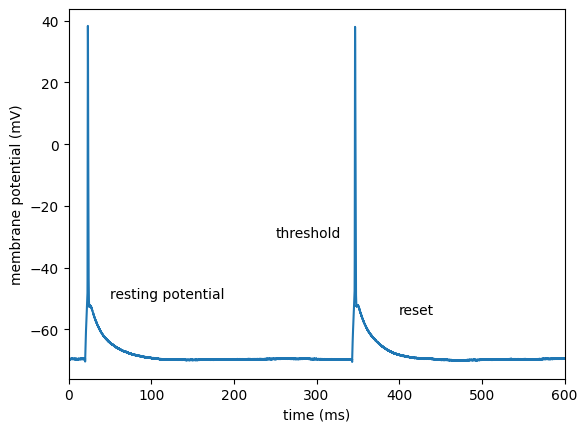

In [187]:
time_step2 = time_steps(sliced_input_amps[0])
plot(time_step2, sliced_output_res[6])
xlim(0, 600)
text(50, -50, 'resting potential')
text(250, -30, 'threshold')
text(400, -55, 'reset')
xlabel('time (ms)')
ylabel('membrane potential (mV)')

***
***

# Run models

***

In [ ]:
hh_sst_starters_0 = run_hh(sliced_input_amps, sliced_output_res, cm_var=200, el=-65, ek=-90, ena=50, vt=-63,\
                           glmin=1, glmax=20, gnamin=0.01, gnamax=150, gkdmin=1, gkdmax=50)

# tt: 3m 54.1s

WARNING    Cannot use Cython, a test compilation failed: Cython is not available (ImportError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]


first fit:
Round 0: Best parameters g_kd=16.79501999 uS, g_na=25.14682066 uS, gl=15.65117361 nS (error: 62.2484266 mV^2)
Round 1: Best parameters g_kd=10.84618089 uS, g_na=18.32921127 uS, gl=17.21960373 nS (error: 54.16486421 mV^2)
Round 2: Best parameters g_kd=6.73416923 uS, g_na=19.84999446 uS, gl=17.42195558 nS (error: 51.78728842 mV^2)
Round 3: Best parameters g_kd=5.20404696 uS, g_na=18.91354141 uS, gl=17.99461885 nS (error: 49.62981692 mV^2)
Round 4: Best parameters g_kd=3.55362354 uS, g_na=18.50679762 uS, gl=16.53990834 nS (error: 47.9108033 mV^2)
Round 5: Best parameters g_kd=3.02216333 uS, g_na=20.7662626 uS, gl=18.30200421 nS (error: 46.28474739 mV^2)
Round 6: Best parameters g_kd=2.44031778 uS, g_na=23.85294363 uS, gl=18.75768357 nS (error: 44.514626 mV^2)
Round 7: Best parameters g_kd=2.01896861 uS, g_na=22.86352694 uS, gl=19.01532775 nS (error: 42.31516173 mV^2)
Round 8: Best parameters g_kd=1.74415831 uS, g_na=23.43342621 uS, gl=18.59157823 nS (error: 40.96687398 mV^2)
Ro

Text(0.5, 1.0, 'SST sweep 0: initial')

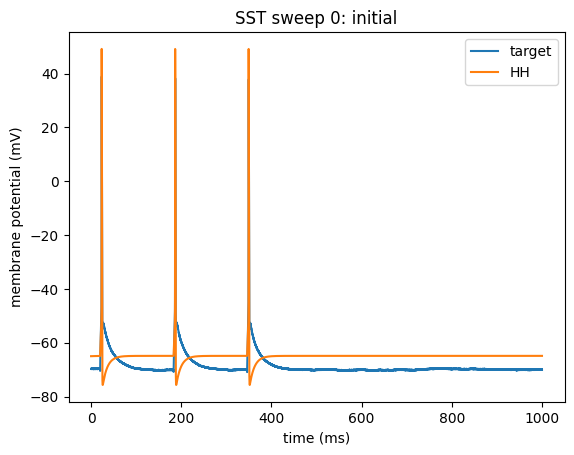

In [5]:
create_comparison_together(sliced_output_res[0], hh_sst_starters_0[0]*1000, d2_title='HH')
title('SST sweep 0: initial')

Text(0.5, 1.0, 'SST sweep 4: initial')

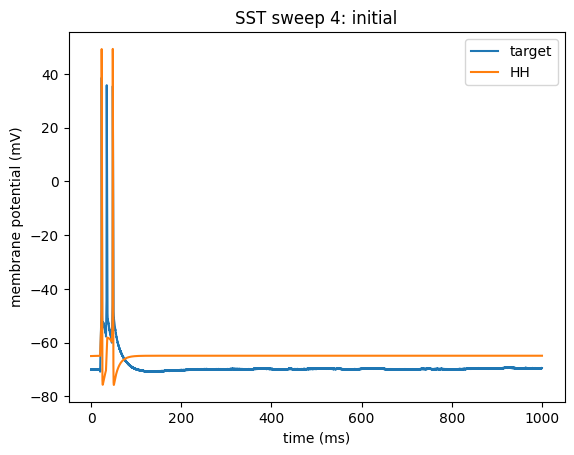

In [6]:
create_comparison_together(sliced_output_res[4], hh_sst_starters_0[4]*1000, d2_title='HH')
title('SST sweep 4: initial')

Text(0.5, 1.0, 'SST sweep 5: initial')

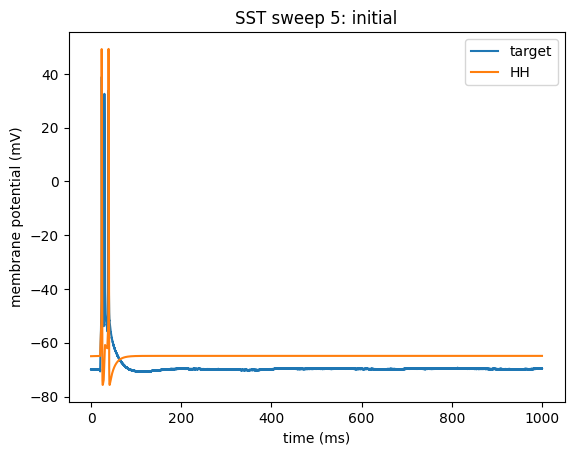

In [8]:
create_comparison_together(sliced_output_res[5], hh_sst_starters_0[5]*1000, d2_title='HH')
title('SST sweep 5: initial')

Text(0.5, 1.0, 'SST sweep 6: initial')

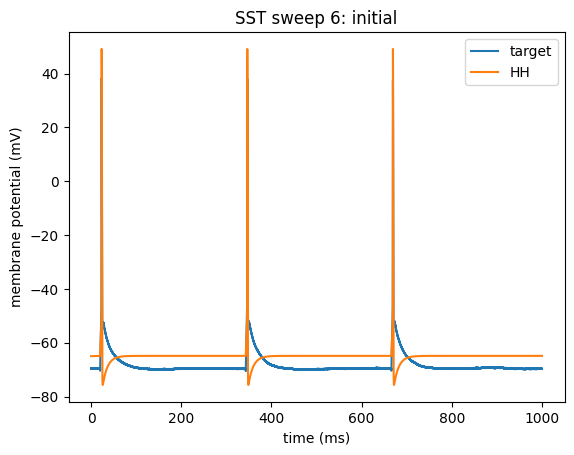

In [7]:
create_comparison_together(sliced_output_res[6], hh_sst_starters_0[6]*1000, d2_title='HH')
title('SST sweep 6: initial')

In [ ]:
hh_sst_starters_1 = run_hh(sliced_input_amps, sliced_output_res, cm_var=120, el=-70, ek=-78, ena=40, vt=-50,\
                           glmin=1, glmax=20, gnamin=1, gnamax=50, gkdmin=0.01, gkdmax=4)

# tt: 7m 18.5s

first fit:
Round 0: Best parameters g_kd=2.17841955 uS, g_na=8.69264834 uS, gl=6.13881191 nS (error: 14.40265296 mV^2)
Round 1: Best parameters g_kd=3.24621323 uS, g_na=7.57745395 uS, gl=7.26107923 nS (error: 14.31402712 mV^2)
Round 2: Best parameters g_kd=3.51562756 uS, g_na=3.67993079 uS, gl=6.05897672 nS (error: 13.62523257 mV^2)
Round 3: Best parameters g_kd=3.51562756 uS, g_na=3.67993079 uS, gl=6.05897672 nS (error: 13.62523257 mV^2)
Round 4: Best parameters g_kd=0.97031705 uS, g_na=2.60516581 uS, gl=5.78769763 nS (error: 13.41109202 mV^2)
Round 5: Best parameters g_kd=1.18206077 uS, g_na=2.66920411 uS, gl=5.70042448 nS (error: 13.29723286 mV^2)
Round 6: Best parameters g_kd=0.94055985 uS, g_na=2.619996 uS, gl=5.67471122 nS (error: 13.27805425 mV^2)
Round 7: Best parameters g_kd=0.94055985 uS, g_na=2.65887203 uS, gl=5.67471122 nS (error: 13.25435952 mV^2)
Round 8: Best parameters g_kd=0.94055985 uS, g_na=2.65887203 uS, gl=5.67471122 nS (error: 13.25435952 mV^2)
Round 9: Best param

Text(0.5, 1.0, 'SST Collection, Sweep 0: c=120, el=-70, ek=-78, ena=40, vt=-50, gl=(1-20), gna=(1-50), gkd=(0.01-4)')

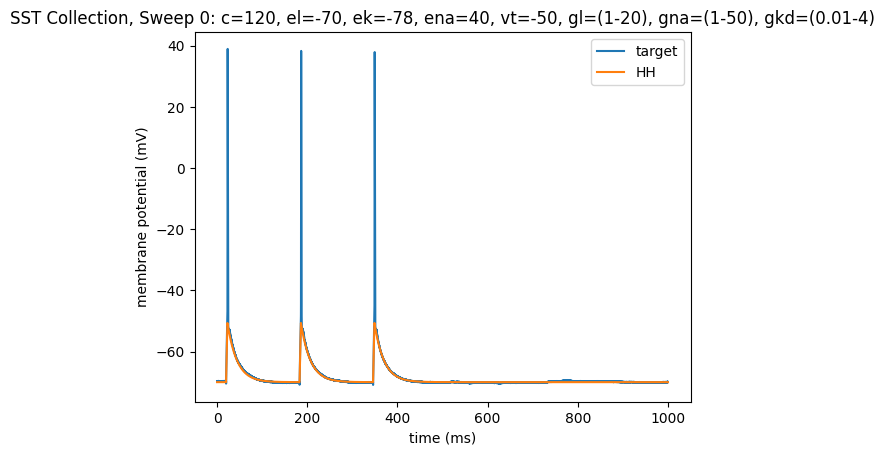

In [16]:
create_comparison_together(sliced_output_res[0], hh_sst_starters_1[0]*1000, d2_title='HH')
title('SST Collection, Sweep 0: c=120, el=-70, ek=-78, ena=40, vt=-50, gl=(1-20), gna=(1-50), gkd=(0.01-4)')

Text(0.5, 1.0, 'SST Collection Sweep 2: c=120, el=-70, ek=-78, ena=40, vt=-50, gl=(1-20), gna=(1-50), gkd=(0.01-4)')

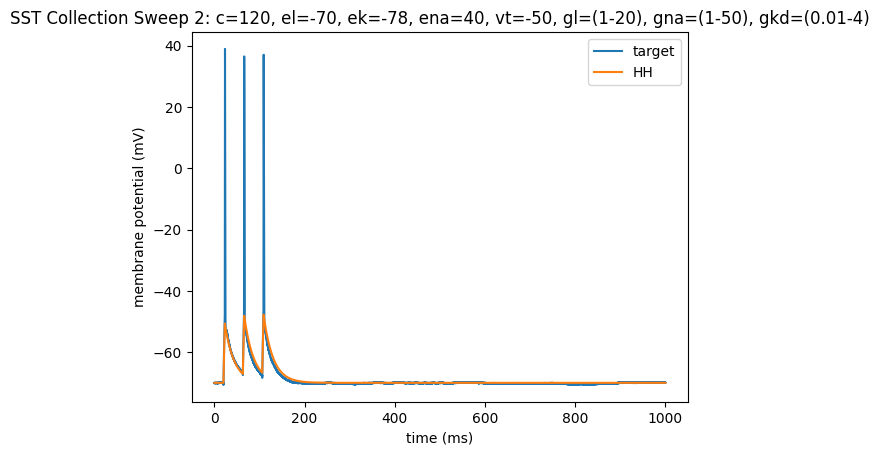

In [14]:
create_comparison_together(sliced_output_res[2], hh_sst_starters_1[2]*1000, d2_title='HH')
title('SST Collection Sweep 2: c=120, el=-70, ek=-78, ena=40, vt=-50, gl=(1-20), gna=(1-50), gkd=(0.01-4)')

Text(0.5, 1.0, 'SST Collection Sweep 3: c=120, el=-70, ek=-78, ena=40, vt=-50, gl=(1-20), gna=(1-50), gkd=(0.01-4)')

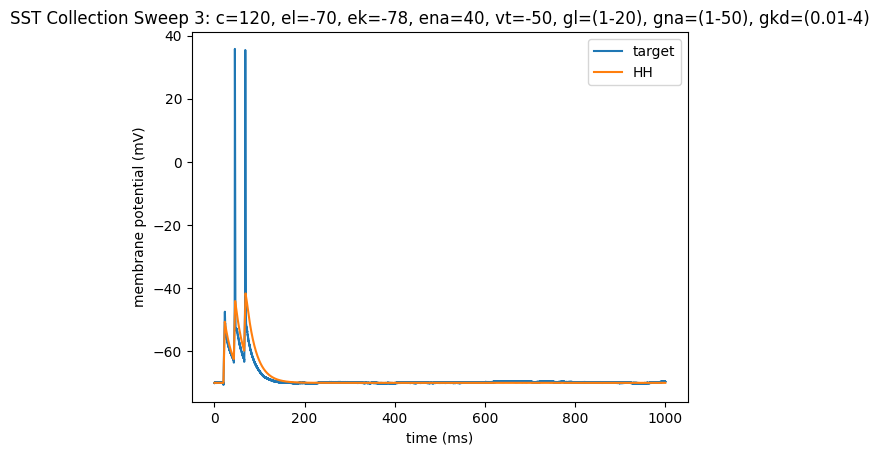

In [13]:
create_comparison_together(sliced_output_res[3], hh_sst_starters_1[3]*1000, d2_title='HH')
title('SST Collection Sweep 3: c=120, el=-70, ek=-78, ena=40, vt=-50, gl=(1-20), gna=(1-50), gkd=(0.01-4)')

Text(0.5, 1.0, 'SST Collection Sweep 4: c=120, el=-70, ek=-78, ena=40, vt=-50, gl=(1-20), gna=(1-50), gkd=(0.01-4)')

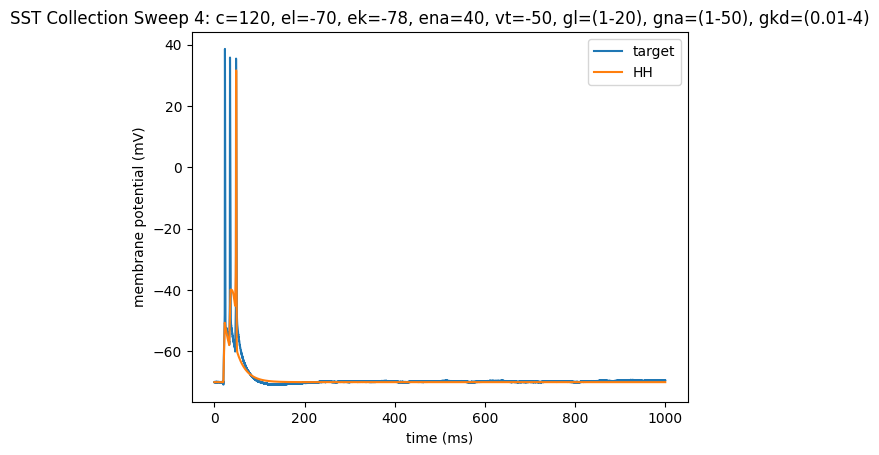

In [12]:
create_comparison_together(sliced_output_res[4], hh_sst_starters_1[4]*1000, d2_title='HH')
title('SST Collection Sweep 4: c=120, el=-70, ek=-78, ena=40, vt=-50, gl=(1-20), gna=(1-50), gkd=(0.01-4)')

Text(0.5, 1.0, 'SST Collection Sweep 5: c=120, el=-70, ek=-78, ena=40, vt=-50, gl=(1-20), gna=(1-50), gkd=(0.01-4)')

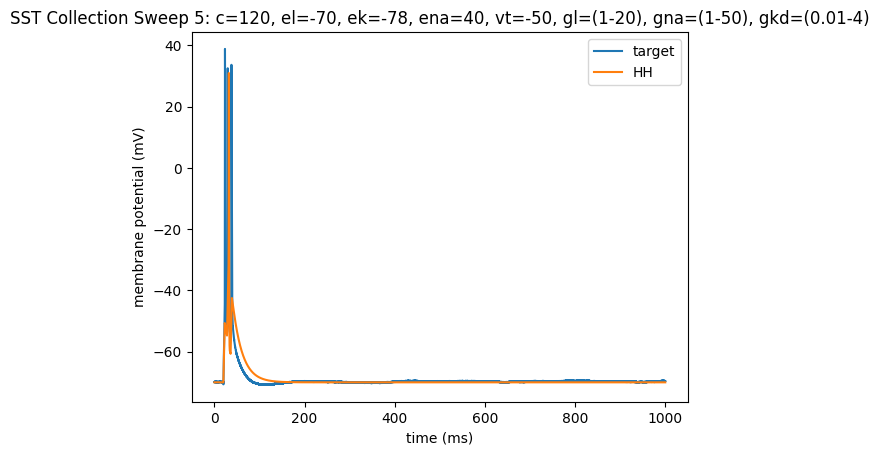

In [11]:
create_comparison_together(sliced_output_res[5], hh_sst_starters_1[5]*1000, d2_title='HH')
title('SST Collection Sweep 5: c=120, el=-70, ek=-78, ena=40, vt=-50, gl=(1-20), gna=(1-50), gkd=(0.01-4)')

Text(0.5, 1.0, 'SST Collection Sweep 6: c=120, el=-70, ek=-78, ena=40, vt=-50, gl=(1-20), gna=(1-50), gkd=(0.01-4)')

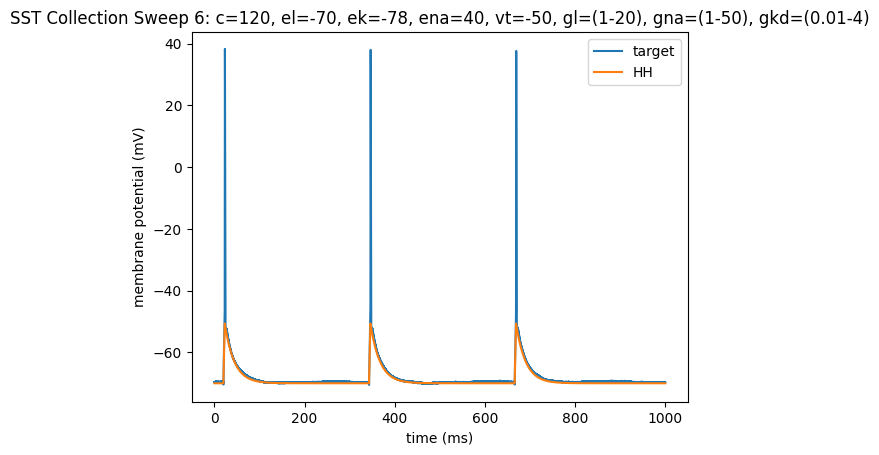

In [10]:
create_comparison_together(sliced_output_res[6], hh_sst_starters_1[6]*1000, d2_title='HH')
title('SST Collection Sweep 6: c=120, el=-70, ek=-78, ena=40, vt=-50, gl=(1-20), gna=(1-50), gkd=(0.01-4)')

([], [])

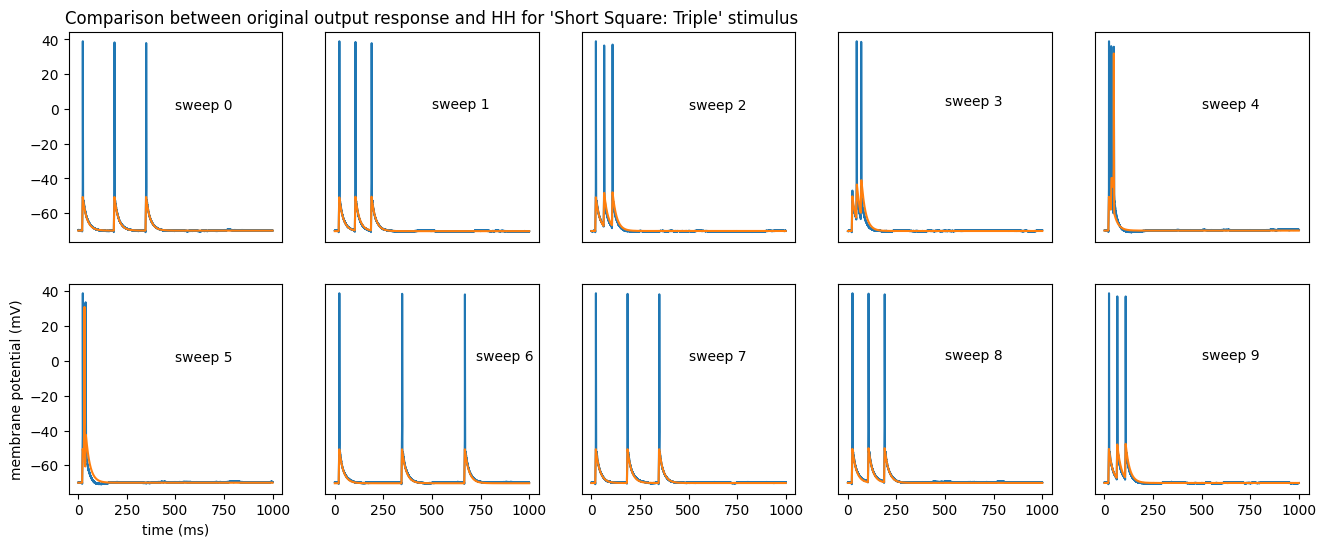

In [25]:
figure(figsize=(16,6))

ts = (np.arange(0, len(sliced_output_res[0]))) * (1/50)

subplot(2,5,1)
plot(ts, sliced_output_res[0])
plot(ts, hh_sst_starters_1[0]*1000)
text(500, 0, 'sweep 0')
tick_params(
axis='x',          
which='both',      
bottom=False,      
top=False,         
labelbottom=False)
# xlabel('time (ms)')
# ylabel('membrane potential (mV)')
# ylabel('input current (pA)')


subplot(2,5,2)
plot(ts, sliced_output_res[1])
plot(ts, hh_sst_starters_1[1]*1000)
text(500, 0, 'sweep 1')
tick_params(
axis='x',          
which='both',     
bottom=False,      
top=False,         
labelbottom=False)
yticks([])
title(f"Comparison between original output response and HH for 'Short Square: Triple' stimulus")

subplot(2,5,3)
plot(ts, sliced_output_res[2])
plot(ts, hh_sst_starters_1[2]*1000)
text(500, 0, 'sweep 2')
tick_params(
axis='x',          
which='both',      
bottom=False,      
top=False,         
labelbottom=False)
yticks([])

subplot(2,5,4)
plot(ts, sliced_output_res[3])
plot(ts, hh_sst_starters_1[3]*1000)
text(500, 0, 'sweep 3')
tick_params(
axis='x',          
which='both',      
bottom=False,      
top=False,         
labelbottom=False)
yticks([])

subplot(2,5,5)
plot(ts, sliced_output_res[4])
plot(ts, hh_sst_starters_1[4]*1000)
text(500, 0, 'sweep 4')
tick_params(
axis='x',          
which='both',      
bottom=False,      
top=False,         
labelbottom=False)
yticks([])

subplot(2,5,6)
plot(ts, sliced_output_res[5])
plot(ts, hh_sst_starters_1[5]*1000)
text(500, 0, 'sweep 5')
xlabel('time (ms)')
# ylabel('input current (pA)')
ylabel('membrane potential (mV)')

subplot(2,5,7)
plot(ts, sliced_output_res[6])
plot(ts, hh_sst_starters_1[6]*1000)
text(725, 0, 'sweep 6')
yticks([])

subplot(2,5,8)
plot(ts, sliced_output_res[7])
plot(ts, hh_sst_starters_1[7]*1000)
text(500, 0, 'sweep 7')
yticks([])

subplot(2,5,9)
plot(ts, sliced_output_res[8])
plot(ts, hh_sst_starters_1[8]*1000)
text(500, 0, 'sweep 8')
yticks([])

subplot(2,5,10)
plot(ts, sliced_output_res[9])
plot(ts, hh_sst_starters_1[9]*1000)
text(500, 0, 'sweep 9')
yticks([])

Text(0.5, 1.0, 'Sweep 5')

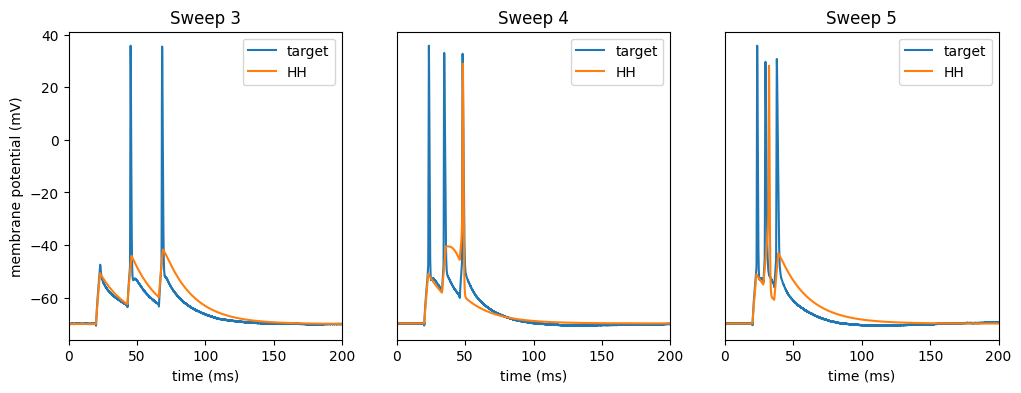

In [28]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(sliced_output_res[3], hh_sst_starters_1[3]*1000, d2_title='HH')
xlim(0, 200)
ylabel('membrane potential (mV)')
title('Sweep 3')

subplot(1,3,2)
create_comparison_together(sliced_output_res[4], hh_sst_starters_1[4]*1000, d2_title='HH')
xlim(0, 200)
ax = plt.gca()
ax.yaxis.set_visible(False)
title('Sweep 4')

subplot(1,3,3)
create_comparison_together(sliced_output_res[5], hh_sst_starters_1[5]*1000, d2_title='HH')
xlim(0, 200)
ax = plt.gca()
ax.yaxis.set_visible(False)
title('Sweep 5')

In [ ]:
hh_sst_starters_2 = run_hh(sliced_input_amps, sliced_output_res,\
                           glmin=10, glmax=40, gnamin=1, gnamax=20, gkdmin=0.01, gkdmax=4)

# tt: 12 56s

first fit:
Round 0: Best parameters g_kd=2.21488205 uS, g_na=16.6994708 uS, gl=14.35655689 nS (error: 17.19356312 mV^2)
Round 1: Best parameters g_kd=2.9820072 uS, g_na=17.87994531 uS, gl=11.99661066 nS (error: 16.30738734 mV^2)
Round 2: Best parameters g_kd=0.79427634 uS, g_na=17.6495692 uS, gl=11.44716286 nS (error: 15.64524757 mV^2)
Round 3: Best parameters g_kd=0.82651134 uS, g_na=18.59179217 uS, gl=11.25596003 nS (error: 15.15261722 mV^2)
Round 4: Best parameters g_kd=0.5704448 uS, g_na=18.43691248 uS, gl=11.23836281 nS (error: 15.0561366 mV^2)
Round 5: Best parameters g_kd=0.5704448 uS, g_na=18.43691248 uS, gl=11.23836281 nS (error: 15.0561366 mV^2)
Round 6: Best parameters g_kd=0.68656477 uS, g_na=17.18629898 uS, gl=11.11248044 nS (error: 15.02399608 mV^2)
Round 7: Best parameters g_kd=0.68656477 uS, g_na=17.18629898 uS, gl=11.11248044 nS (error: 15.02399608 mV^2)
Round 8: Best parameters g_kd=0.53089921 uS, g_na=17.62649099 uS, gl=11.14087787 nS (error: 15.01813913 mV^2)
Round 

# BEST HH COLLECTION SST

In [ ]:
hh_sst_starters_3 = run_hh(sliced_input_amps, sliced_output_res, cm_var=200, vt=-70,\
                           glmin=10, glmax=40, gnamin=1, gnamax=20, gkdmin=0.01, gkdmax=4)

# 5m 19

first fit:
Round 0: Best parameters g_kd=0.81555641 uS, g_na=12.49094079 uS, gl=21.80037629 nS (error: 11.74280469 mV^2)
Round 1: Best parameters g_kd=0.67662707 uS, g_na=10.02330313 uS, gl=18.68891618 nS (error: 6.42113031 mV^2)
Round 2: Best parameters g_kd=0.67662707 uS, g_na=10.02330313 uS, gl=18.68891618 nS (error: 6.42113031 mV^2)
Round 3: Best parameters g_kd=0.60960506 uS, g_na=9.01908293 uS, gl=20.531778 nS (error: 5.48864865 mV^2)
Round 4: Best parameters g_kd=0.60960506 uS, g_na=9.01908293 uS, gl=20.531778 nS (error: 5.48864865 mV^2)
Round 5: Best parameters g_kd=0.60960506 uS, g_na=9.01908293 uS, gl=20.531778 nS (error: 5.48864865 mV^2)
Round 6: Best parameters g_kd=0.60960506 uS, g_na=9.01908293 uS, gl=20.531778 nS (error: 5.48864865 mV^2)
Round 7: Best parameters g_kd=0.60960506 uS, g_na=9.01908293 uS, gl=20.531778 nS (error: 5.48864865 mV^2)
Round 8: Best parameters g_kd=0.60960506 uS, g_na=9.01908293 uS, gl=20.531778 nS (error: 5.48864865 mV^2)
Round 9: Best parameters 

WARNING    c:\Users\yjk16\OneDrive\Desktop\CS Master's\Dissertation\diss files\general_functions.py:485: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ylabel('membrane potential (mV)')
 [py.warnings]


Text(0.5, 1.0, 'Sweep 9')

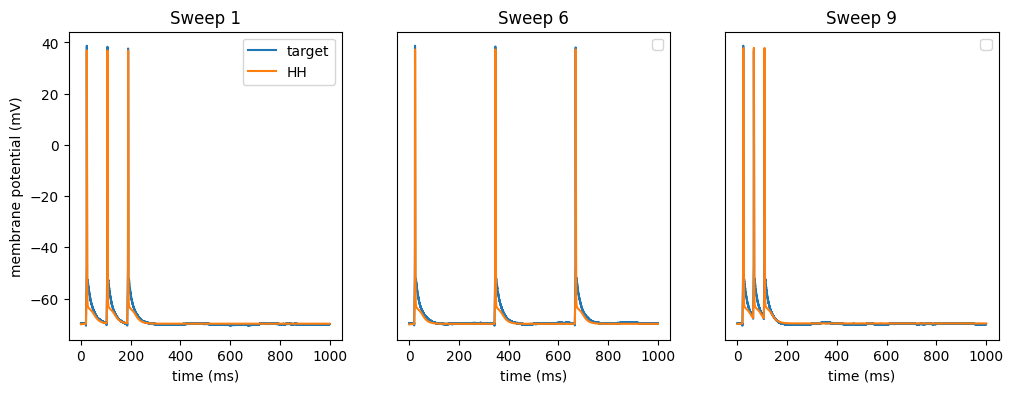

In [31]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(sliced_output_res[1], hh_sst_starters_3[1]*1000, d2_title='HH')
# xlim(0, 0.1)
ylabel('membrane potential (mV)')
title('Sweep 1')

subplot(1,3,2)
create_comparison_together(sliced_output_res[6], hh_sst_starters_3[6]*1000, d1_title='', d2_title='')
ax = plt.gca()
ax.yaxis.set_visible(False)
title('Sweep 6')

subplot(1,3,3)
create_comparison_together(sliced_output_res[9], hh_sst_starters_3[9]*1000, d1_title='', d2_title='')
ax = plt.gca()
ax.yaxis.set_visible(False)
title('Sweep 9')

Text(0.5, 1.0, 'Sweep 5')

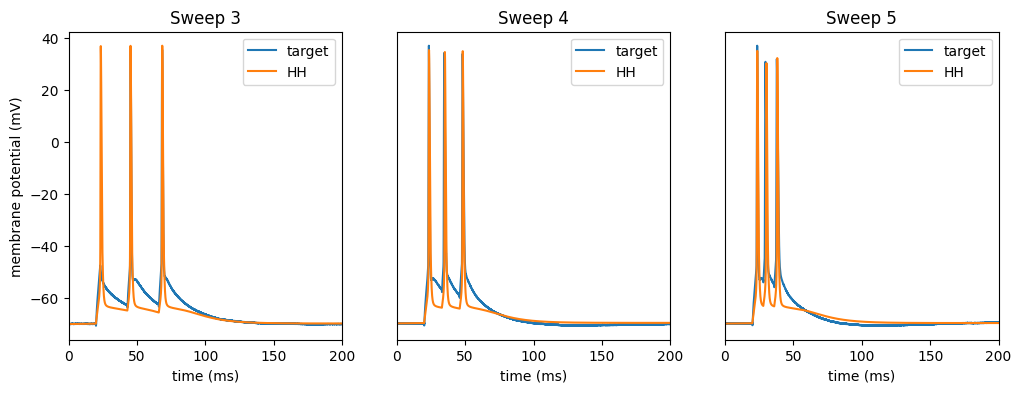

In [33]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(sliced_output_res[3], hh_sst_starters_3[3]*1000, d2_title='HH')
# xlim(0, 0.1)
ylabel('membrane potential (mV)')
xlim(0, 200)
title('Sweep 3')

subplot(1,3,2)
create_comparison_together(sliced_output_res[4], hh_sst_starters_3[4]*1000, d2_title='HH')
ax = plt.gca()
ax.yaxis.set_visible(False)
xlim(0, 200)
title('Sweep 4')

subplot(1,3,3)
create_comparison_together(sliced_output_res[5], hh_sst_starters_3[5]*1000, d2_title='HH')
ax = plt.gca()
ax.yaxis.set_visible(False)
xlim(0, 200)
title('Sweep 5')

# LIF

In [ ]:
lif_sst_starters_0 = run_lif(sliced_input_amps, sliced_output_res, cm_var=200, reset_var='v=-70*mV', thresh_var='v>-50*mV')

# tt: 44.2s

first fit:
Round 0: Best parameters R=156.31336605 Mohm, tau=20.77783399 ms (error: 15.80123116 mV^2)
Round 1: Best parameters R=156.31336605 Mohm, tau=20.77783399 ms (error: 15.80123116 mV^2)
Round 2: Best parameters R=156.31336605 Mohm, tau=20.77783399 ms (error: 15.80123116 mV^2)
Round 3: Best parameters R=134.22817814 Mohm, tau=16.56164396 ms (error: 15.7606888 mV^2)
Round 4: Best parameters R=142.93106195 Mohm, tau=18.05515362 ms (error: 15.706826 mV^2)
Round 5: Best parameters R=142.93106195 Mohm, tau=18.05515362 ms (error: 15.706826 mV^2)
Round 6: Best parameters R=142.93106195 Mohm, tau=18.05515362 ms (error: 15.706826 mV^2)
Round 7: Best parameters R=142.93106195 Mohm, tau=18.05515362 ms (error: 15.706826 mV^2)
Round 8: Best parameters R=142.93106195 Mohm, tau=18.05515362 ms (error: 15.706826 mV^2)
Round 9: Best parameters R=142.93106195 Mohm, tau=18.05515362 ms (error: 15.706826 mV^2)


WARNING    c:\Users\yjk16\OneDrive\Desktop\CS Master's\Dissertation\diss files\general_functions.py:485: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ylabel('membrane potential (mV)')
 [py.warnings]


Text(0.5, 1.0, 'Sweep 9')

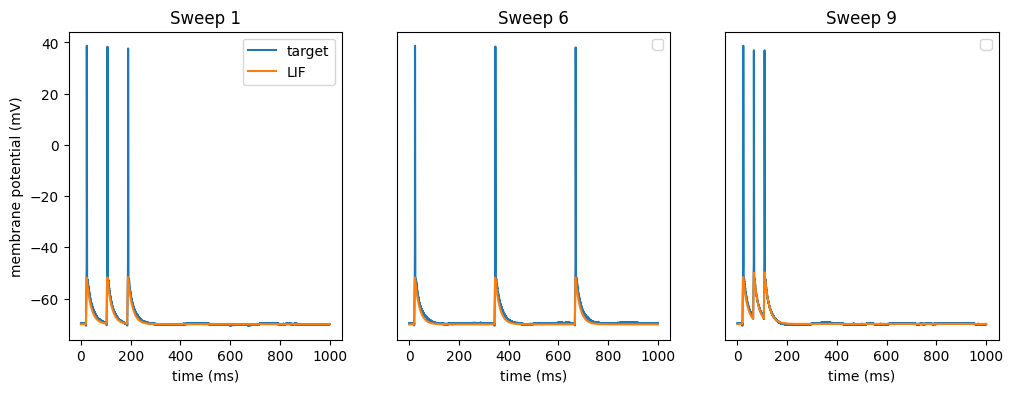

In [35]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(sliced_output_res[1], lif_sst_starters_0[1]*1000, d2_title='LIF')
# xlim(0, 0.1)
ylabel('membrane potential (mV)')
title('Sweep 1')

subplot(1,3,2)
create_comparison_together(sliced_output_res[6], lif_sst_starters_0[6]*1000, d1_title='', d2_title='')
ax = plt.gca()
ax.yaxis.set_visible(False)
title('Sweep 6')

subplot(1,3,3)
create_comparison_together(sliced_output_res[9], lif_sst_starters_0[9]*1000, d1_title='', d2_title='')
ax = plt.gca()
ax.yaxis.set_visible(False)
title('Sweep 9')

WARNING    c:\Users\yjk16\OneDrive\Desktop\CS Master's\Dissertation\diss files\general_functions.py:485: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ylabel('membrane potential (mV)')
 [py.warnings]


Text(0.5, 1.0, 'Sweep 5')

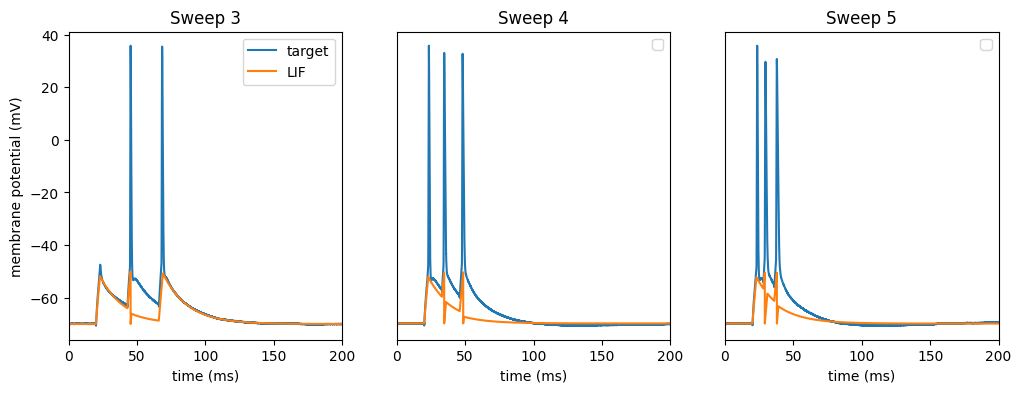

In [37]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(sliced_output_res[3], lif_sst_starters_0[3]*1000, d2_title='LIF')
# xlim(0, 0.1)
ylabel('membrane potential (mV)')
xlim(0, 200)
title('Sweep 3')

subplot(1,3,2)
create_comparison_together(sliced_output_res[4], lif_sst_starters_0[4]*1000, d1_title='', d2_title='')
ax = plt.gca()
ax.yaxis.set_visible(False)
xlim(0, 200)
title('Sweep 4')

subplot(1,3,3)
create_comparison_together(sliced_output_res[5], lif_sst_starters_0[5]*1000, d1_title='', d2_title='')
ax = plt.gca()
ax.yaxis.set_visible(False)
xlim(0, 200)
title('Sweep 5')

In [ ]:
lif_sst_starters_1 = run_lif(sliced_input_amps, sliced_output_res, cm_var=120, reset_var='v=-70*mV', thresh_var='v>-50*mV')

# 45.4s

first fit:
Round 0: Best parameters R=147.52017232 Mohm, tau=18.96619485 ms (error: 15.72752095 mV^2)
Round 1: Best parameters R=147.52017232 Mohm, tau=18.96619485 ms (error: 15.72752095 mV^2)
Round 2: Best parameters R=147.52017232 Mohm, tau=18.96619485 ms (error: 15.72752095 mV^2)
Round 3: Best parameters R=147.52017232 Mohm, tau=18.96619485 ms (error: 15.72752095 mV^2)
Round 4: Best parameters R=147.52017232 Mohm, tau=18.96619485 ms (error: 15.72752095 mV^2)
Round 5: Best parameters R=147.52017232 Mohm, tau=18.96619485 ms (error: 15.72752095 mV^2)
Round 6: Best parameters R=146.30955303 Mohm, tau=18.68661237 ms (error: 15.70631744 mV^2)
Round 7: Best parameters R=146.30955303 Mohm, tau=18.68661237 ms (error: 15.70631744 mV^2)
Round 8: Best parameters R=146.30955303 Mohm, tau=18.68661237 ms (error: 15.70631744 mV^2)
Round 9: Best parameters R=146.30955303 Mohm, tau=18.68661237 ms (error: 15.70631744 mV^2)


# ADEX

In [ ]:
adex_sst_starters_0 = run_adex(sliced_input_amps, sliced_output_res, c_var=200, gl_var=10)

# 50.4s

first fit:
Round 0: Best parameters a=1.73496377 nS, b=66.66593115 pA, tauw=137.69877326 ms (error: 18.60952429 mV^2)
Round 1: Best parameters a=1.3313677 nS, b=41.77389934 pA, tauw=126.63080806 ms (error: 18.38071625 mV^2)
Round 2: Best parameters a=1.23359436 nS, b=25.27408977 pA, tauw=124.91188906 ms (error: 18.29094521 mV^2)
Round 3: Best parameters a=1.12340378 nS, b=17.44211885 pA, tauw=135.9992988 ms (error: 18.24660993 mV^2)
Round 4: Best parameters a=1.09619459 nS, b=14.15222936 pA, tauw=155.02883635 ms (error: 18.22793243 mV^2)
Round 5: Best parameters a=1.09777885 nS, b=11.29434692 pA, tauw=157.85628868 ms (error: 18.21856649 mV^2)
Round 6: Best parameters a=1.09921234 nS, b=7.20962998 pA, tauw=156.62149249 ms (error: 18.20809875 mV^2)
Round 7: Best parameters a=1.05454244 nS, b=5.46505458 pA, tauw=156.41325981 ms (error: 18.19910888 mV^2)
Round 8: Best parameters a=1.04055702 nS, b=4.56268007 pA, tauw=157.10264067 ms (error: 18.19533829 mV^2)
Round 9: Best parameters a=1.03

# BEST ADEX 1

In [ ]:
adex_sst_starters_1 = run_adex(sliced_input_amps, sliced_output_res)

# tt: 50.9s

first fit:
Round 0: Best parameters a=2.43116267 nS, b=68.60020537 pA, tauw=138.34765963 ms (error: 16.71776624 mV^2)
Round 1: Best parameters a=2.0936363 nS, b=39.32958362 pA, tauw=130.21713342 ms (error: 14.96282266 mV^2)
Round 2: Best parameters a=1.55898876 nS, b=22.46427826 pA, tauw=124.42838492 ms (error: 14.3092257 mV^2)
Round 3: Best parameters a=1.32154436 nS, b=14.32444127 pA, tauw=126.63335332 ms (error: 14.1410965 mV^2)
Round 4: Best parameters a=1.20595001 nS, b=10.62714005 pA, tauw=123.56330242 ms (error: 14.08659585 mV^2)
Round 5: Best parameters a=1.13357359 nS, b=8.98736333 pA, tauw=122.00591798 ms (error: 14.06852067 mV^2)
Round 6: Best parameters a=1.07197986 nS, b=6.01277769 pA, tauw=126.12236876 ms (error: 14.06096496 mV^2)
Round 7: Best parameters a=1.05184511 nS, b=5.46059297 pA, tauw=121.98519111 ms (error: 14.05701128 mV^2)
Round 8: Best parameters a=1.04253141 nS, b=6.23803477 pA, tauw=121.30955362 ms (error: 14.05524856 mV^2)
Round 9: Best parameters a=1.0398

WARNING    c:\Users\yjk16\OneDrive\Desktop\CS Master's\Dissertation\diss files\general_functions.py:485: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ylabel('membrane potential (mV)')
 [py.warnings]


Text(0.5, 1.0, 'Sweep 9')

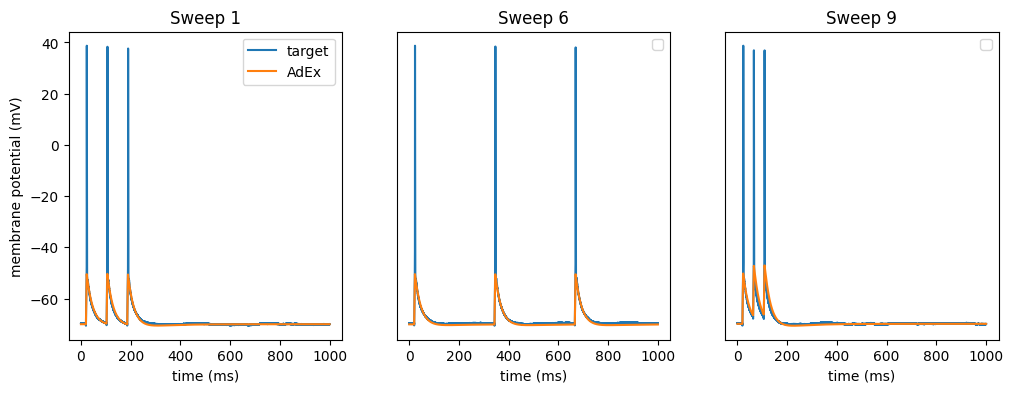

In [41]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(sliced_output_res[1], adex_sst_starters_1[1]*1000, d2_title='AdEx')
# xlim(0, 0.1)
ylabel('membrane potential (mV)')
title('Sweep 1')

subplot(1,3,2)
create_comparison_together(sliced_output_res[6], adex_sst_starters_1[6]*1000, d1_title='', d2_title='')
ax = plt.gca()
ax.yaxis.set_visible(False)
title('Sweep 6')

subplot(1,3,3)
create_comparison_together(sliced_output_res[9], adex_sst_starters_1[9]*1000, d1_title='', d2_title='')
ax = plt.gca()
ax.yaxis.set_visible(False)
title('Sweep 9')

WARNING    c:\Users\yjk16\OneDrive\Desktop\CS Master's\Dissertation\diss files\general_functions.py:485: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ylabel('membrane potential (mV)')
 [py.warnings]


Text(0.5, 1.0, 'Sweep 5')

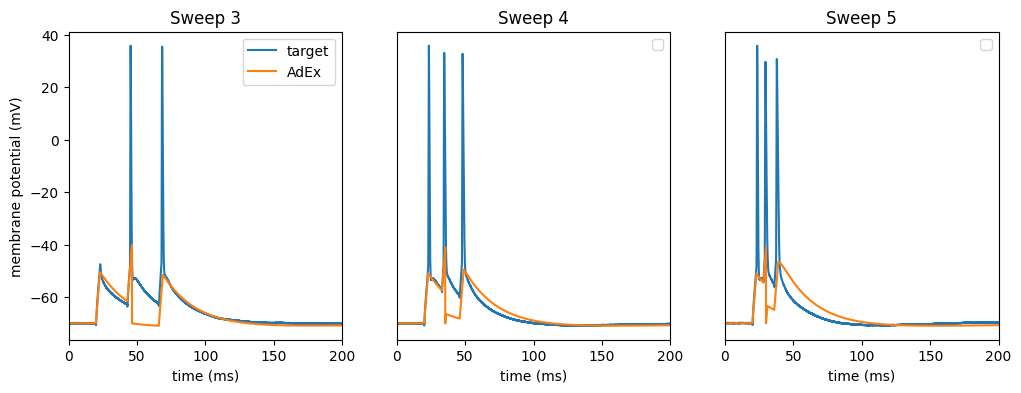

In [43]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(sliced_output_res[3], adex_sst_starters_1[3]*1000, d2_title='AdEx')
xlim(0, 200)
ylabel('membrane potential (mV)')
title('Sweep 3')

subplot(1,3,2)
create_comparison_together(sliced_output_res[4], adex_sst_starters_1[4]*1000, d1_title='', d2_title='')
xlim(0, 200)
ax = plt.gca()
ax.yaxis.set_visible(False)
title('Sweep 4')

subplot(1,3,3)
create_comparison_together(sliced_output_res[5], adex_sst_starters_1[5]*1000, d1_title='', d2_title='')
xlim(0, 200)
ax = plt.gca()
ax.yaxis.set_visible(False)
title('Sweep 5')

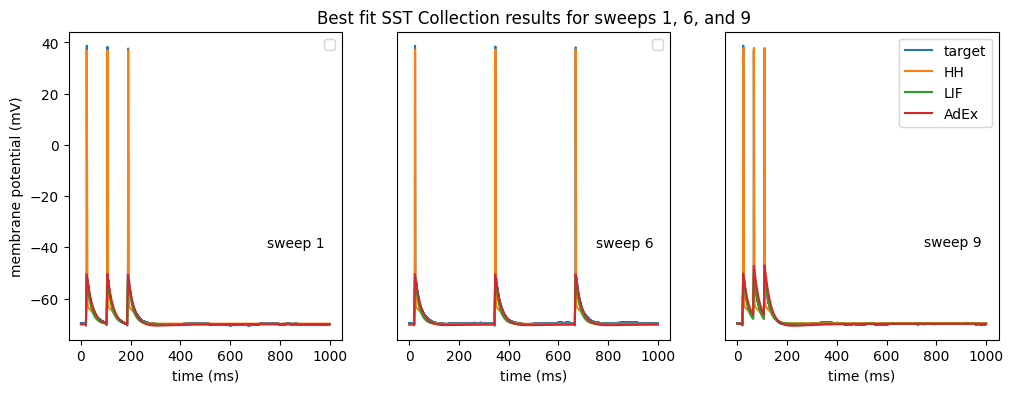

In [53]:
# closer look at sweeps 3, 4, 5:

figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together_four(sliced_output_res[1], hh_sst_starters_3[1]*1000, lif_sst_starters_0[1]*1000, adex_sst_starters_1[1]*1000,\
                                d1_title='', d2_title='', d3_title='', d4_title='')
text(750, -40, 'sweep 1')
# xlim(0, 200)
ylabel('membrane potential (mV)')

subplot(1,3,2)
create_comparison_together_four(sliced_output_res[6], hh_sst_starters_3[6]*1000, lif_sst_starters_0[6]*1000, adex_sst_starters_1[6]*1000,\
                                d1_title='', d2_title='', d3_title='', d4_title='')
text(750, -40, 'sweep 6')
# xlim(0, 200)
ax = plt.gca()
ax.yaxis.set_visible(False)
title('Best fit SST Collection results for sweeps 1, 6, and 9')

subplot(1,3,3)
create_comparison_together_four(sliced_output_res[9], hh_sst_starters_3[9]*1000, lif_sst_starters_0[9]*1000, adex_sst_starters_1[9]*1000,\
                                d2_title='HH', d3_title='LIF', d4_title='AdEx')
text(750, -40, 'sweep 9')
# xlim(0, 200)
ax = plt.gca()
ax.yaxis.set_visible(False)

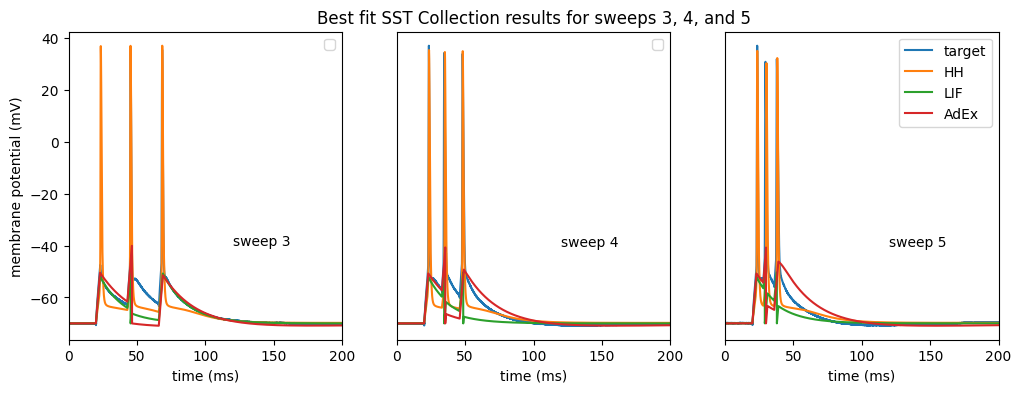

In [55]:
# closer look at sweeps 3, 4, 5:

figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together_four(sliced_output_res[3], hh_sst_starters_3[3]*1000, lif_sst_starters_0[3]*1000, adex_sst_starters_1[3]*1000,\
                                d1_title='', d2_title='', d3_title='', d4_title='')
text(120, -40, 'sweep 3')
xlim(0, 200)
ylabel('membrane potential (mV)')

subplot(1,3,2)
create_comparison_together_four(sliced_output_res[4], hh_sst_starters_3[4]*1000, lif_sst_starters_0[4]*1000, adex_sst_starters_1[4]*1000,\
                                d1_title='', d2_title='', d3_title='', d4_title='')
text(120, -40, 'sweep 4')
xlim(0, 200)
ax = plt.gca()
ax.yaxis.set_visible(False)
title('Best fit SST Collection results for sweeps 3, 4, and 5')

subplot(1,3,3)
create_comparison_together_four(sliced_output_res[5], hh_sst_starters_3[5]*1000, lif_sst_starters_0[5]*1000, adex_sst_starters_1[5]*1000,\
                                d2_title='HH', d3_title='LIF', d4_title='AdEx')
text(120, -40, 'sweep 5')
xlim(0, 200)
ax = plt.gca()
ax.yaxis.set_visible(False)

***
***

# LIF FAST SPIKE GROUP

In [ ]:
lif_sst_fast_1 = run_lif(fastspikes_input_sliced, fastspikes_output_sliced, cm_var=120, reset_var='v=-70*mV', thresh_var='v>-50*mV')

# tt: 5.4s

first fit:
Round 0: Best parameters R=131.18076199 Mohm, tau=23.75610331 ms (error: 177.11636871 mV^2)
Round 1: Best parameters R=127.7606893 Mohm, tau=22.28038476 ms (error: 174.5960042 mV^2)
Round 2: Best parameters R=114.50315156 Mohm, tau=17.68716043 ms (error: 168.51585491 mV^2)
Round 3: Best parameters R=114.50315156 Mohm, tau=17.68716043 ms (error: 168.51585491 mV^2)
Round 4: Best parameters R=114.50315156 Mohm, tau=17.68716043 ms (error: 168.51585491 mV^2)
Round 5: Best parameters R=114.11248712 Mohm, tau=17.58055345 ms (error: 168.42296212 mV^2)
Round 6: Best parameters R=110.82111978 Mohm, tau=16.70045338 ms (error: 167.81029998 mV^2)
Round 7: Best parameters R=109.57293492 Mohm, tau=16.30099353 ms (error: 167.39131854 mV^2)
Round 8: Best parameters R=107.5814079 Mohm, tau=15.75710322 ms (error: 166.9598841 mV^2)
Round 9: Best parameters R=107.7966725 Mohm, tau=15.68441926 ms (error: 166.53789369 mV^2)


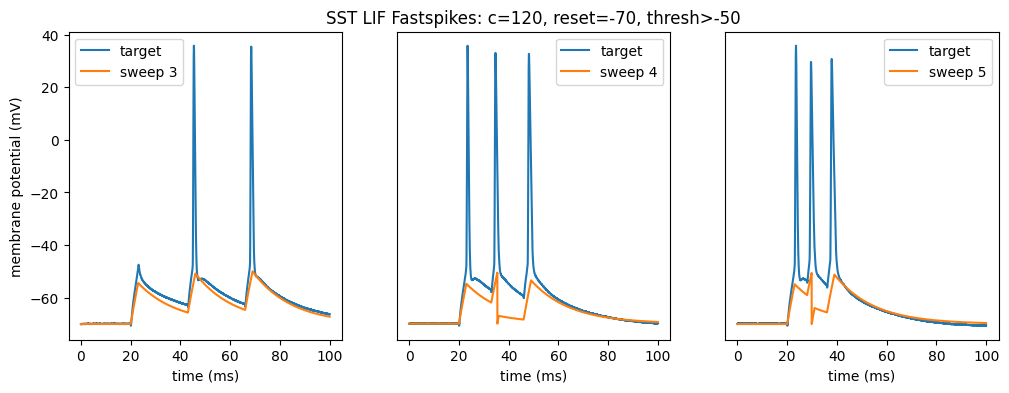

In [65]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(fastspikes_output_sliced[0], lif_sst_fast_1[0]*1000, d2_title='sweep 3')
ylabel('membrane potential (mV)')

subplot(1,3,2)
create_comparison_together(fastspikes_output_sliced[1], lif_sst_fast_1[1]*1000, d2_title='sweep 4')
ax = plt.gca()
ax.yaxis.set_visible(False)
title('SST LIF Fastspikes: c=120, reset=-70, thresh>-50')

subplot(1,3,3)
create_comparison_together(fastspikes_output_sliced[2], lif_sst_fast_1[2]*1000, d2_title='sweep 5')
ax = plt.gca()
ax.yaxis.set_visible(False)

In [ ]:
lif_sst_fast_5 = run_lif(fastspikes_input_sliced, fastspikes_output_sliced, cm_var=120, reset_var='v=-70*mV', thresh_var='v>-20*mV')

# tt: 5.3s

first fit:
Round 0: Best parameters R=147.24030561 Mohm, tau=13.15634636 ms (error: 119.79196765 mV^2)
Round 1: Best parameters R=145.05318805 Mohm, tau=11.64271596 ms (error: 115.20941999 mV^2)
Round 2: Best parameters R=141.63618782 Mohm, tau=10.90219941 ms (error: 112.53319498 mV^2)
Round 3: Best parameters R=133.50276533 Mohm, tau=10.79971287 ms (error: 111.37701524 mV^2)
Round 4: Best parameters R=131.3233916 Mohm, tau=10.56129889 ms (error: 110.65171279 mV^2)
Round 5: Best parameters R=128.15884663 Mohm, tau=10.40665354 ms (error: 110.34722543 mV^2)
Round 6: Best parameters R=133.2361853 Mohm, tau=10.32866282 ms (error: 109.94731647 mV^2)
Round 7: Best parameters R=129.16208886 Mohm, tau=10.22041951 ms (error: 109.66754305 mV^2)
Round 8: Best parameters R=131.61231235 Mohm, tau=10.18494213 ms (error: 109.48735564 mV^2)
Round 9: Best parameters R=130.36057464 Mohm, tau=10.14107313 ms (error: 109.36759239 mV^2)


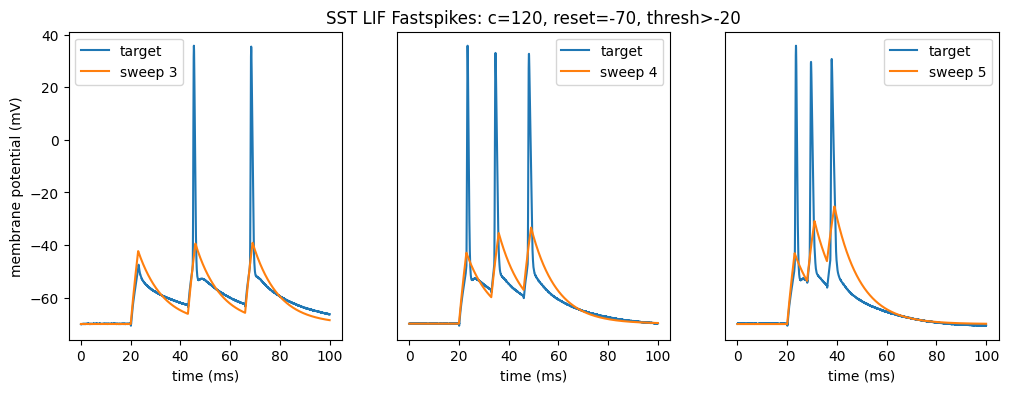

In [66]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(fastspikes_output_sliced[0], lif_sst_fast_5[0]*1000, d2_title='sweep 3')
ylabel('membrane potential (mV)')

subplot(1,3,2)
create_comparison_together(fastspikes_output_sliced[1], lif_sst_fast_5[1]*1000, d2_title='sweep 4')
ax = plt.gca()
ax.yaxis.set_visible(False)
title('SST LIF Fastspikes: c=120, reset=-70, thresh>-20')

subplot(1,3,3)
create_comparison_together(fastspikes_output_sliced[2], lif_sst_fast_5[2]*1000, d2_title='sweep 5')
ax = plt.gca()
ax.yaxis.set_visible(False)

***
***

# ADEX FAST SPIKE GROUP

In [ ]:
adex_sst_fast_0 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced)

# 5.6s

first fit:
Round 0: Best parameters a=2.23462902 nS, b=55.80082115 pA, tauw=133.17091336 ms (error: 184.54371238 mV^2)
Round 1: Best parameters a=3.10525235 nS, b=28.68778528 pA, tauw=149.75867966 ms (error: 167.46557437 mV^2)
Round 2: Best parameters a=2.22070969 nS, b=19.44257859 pA, tauw=135.15041866 ms (error: 163.2348401 mV^2)
Round 3: Best parameters a=2.81206857 nS, b=11.91323275 pA, tauw=135.47139332 ms (error: 161.70914471 mV^2)
Round 4: Best parameters a=2.24302788 nS, b=8.1103399 pA, tauw=135.64667632 ms (error: 161.22599054 mV^2)
Round 5: Best parameters a=3.718285 nS, b=5.72132209 pA, tauw=138.31316294 ms (error: 160.9949712 mV^2)
Round 6: Best parameters a=3.84701173 nS, b=4.20720536 pA, tauw=146.30447754 ms (error: 160.88018569 mV^2)
Round 7: Best parameters a=3.91431175 nS, b=3.14754032 pA, tauw=129.50744761 ms (error: 160.80613565 mV^2)
Round 8: Best parameters a=3.9525384 nS, b=2.13315474 pA, tauw=124.02062702 ms (error: 160.73022032 mV^2)
Round 9: Best parameters a=3

In [ ]:
adex_sst_fast_6 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced, c_var=60, gl_var=20, vt_var=-50,\
                                     delt_var=3, vc_var=15, vr=-53, tauw_min=40, a_max=5, b_max=1)

# tt: 5.9s

first fit:
Round 0: Best parameters a=3.86418251 nS, b=171.31653717 pA, tauw=55.64280363 ms (error: 247.72766129 mV^2)
Round 1: Best parameters a=4.52307164 nS, b=88.72299569 pA, tauw=84.36630726 ms (error: 218.67223785 mV^2)
Round 2: Best parameters a=4.26857196 nS, b=58.40821911 pA, tauw=107.22784023 ms (error: 200.72468344 mV^2)
Round 3: Best parameters a=4.62213869 nS, b=54.76696683 pA, tauw=113.23521478 ms (error: 197.96547157 mV^2)
Round 4: Best parameters a=4.26009064 nS, b=37.04408449 pA, tauw=51.11936663 ms (error: 194.66439678 mV^2)
Round 5: Best parameters a=2.11120609 nS, b=25.24345561 pA, tauw=126.19458032 ms (error: 189.30841074 mV^2)
Round 6: Best parameters a=2.11120609 nS, b=25.24345561 pA, tauw=126.19458032 ms (error: 189.30841074 mV^2)
Round 7: Best parameters a=2.58544871 nS, b=16.57463866 pA, tauw=86.20799685 ms (error: 188.56575231 mV^2)
Round 8: Best parameters a=1.46048365 nS, b=12.1396523 pA, tauw=89.83773471 ms (error: 183.35019967 mV^2)
Round 9: Best paramete

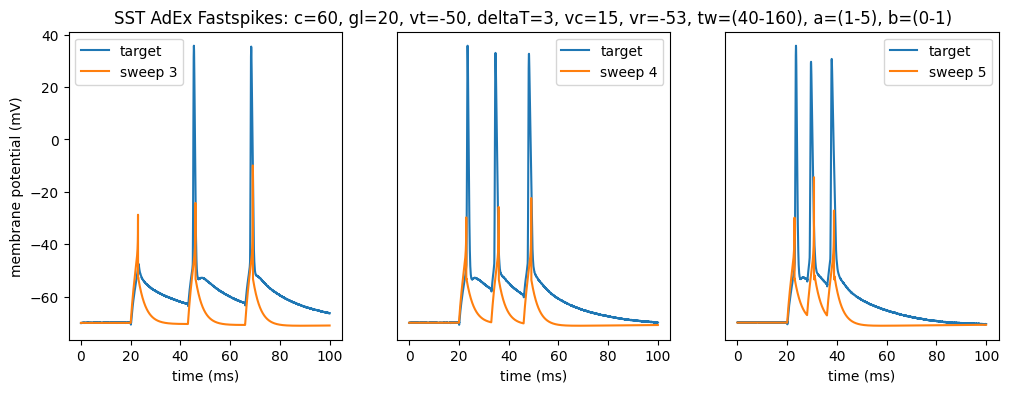

In [69]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(fastspikes_output_sliced[0], adex_sst_fast_6[0]*1000, d2_title='sweep 3')
ylabel('membrane potential (mV)')

subplot(1,3,2)
create_comparison_together(fastspikes_output_sliced[1], adex_sst_fast_6[1]*1000, d2_title='sweep 4')
ax = plt.gca()
ax.yaxis.set_visible(False)
title('SST AdEx Fastspikes: c=60, gl=20, vt=-50, deltaT=3, vc=15, vr=-53, tw=(40-160), a=(1-5), b=(0-1)')

subplot(1,3,3)
create_comparison_together(fastspikes_output_sliced[2], adex_sst_fast_6[2]*1000, d2_title='sweep 5')
ax = plt.gca()
ax.yaxis.set_visible(False)

In [ ]:
adex_sst_fast_7 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced, c_var=60, gl_var=10, vt_var=-50,\
                                     delt_var=3, vc_var=15, vr=-53, tauw_min=40, a_max=5, b_max=1)

# tt: 5.4s

first fit:
Round 0: Best parameters a=2.95466694 nS, b=86.634988 pA, tauw=122.67428969 ms (error: 269.39831172 mV^2)
Round 1: Best parameters a=2.28242916 nS, b=64.35501226 pA, tauw=58.66615186 ms (error: 219.7470621 mV^2)
Round 2: Best parameters a=2.24136873 nS, b=42.03837187 pA, tauw=57.19996546 ms (error: 197.40751348 mV^2)
Round 3: Best parameters a=4.20757448 nS, b=27.48630704 pA, tauw=64.46684534 ms (error: 177.02227661 mV^2)
Round 4: Best parameters a=1.79152878 nS, b=20.70900335 pA, tauw=51.10259574 ms (error: 163.72092665 mV^2)
Round 5: Best parameters a=2.17729527 nS, b=14.03424505 pA, tauw=55.27751819 ms (error: 151.70276095 mV^2)
Round 6: Best parameters a=1.87974443 nS, b=10.90755647 pA, tauw=52.56698964 ms (error: 146.61404453 mV^2)
Round 7: Best parameters a=1.52815077 nS, b=7.34869553 pA, tauw=49.15749384 ms (error: 140.27440924 mV^2)
Round 8: Best parameters a=1.36906137 nS, b=5.46326448 pA, tauw=56.40292053 ms (error: 137.73583555 mV^2)
Round 9: Best parameters a=1.2

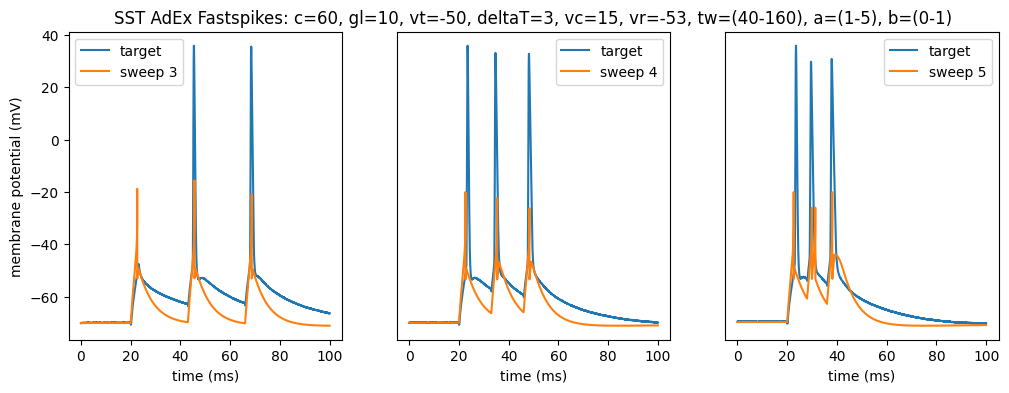

In [71]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(fastspikes_output_sliced[0], adex_sst_fast_7[0]*1000, d2_title='sweep 3')
ylabel('membrane potential (mV)')

subplot(1,3,2)
create_comparison_together(fastspikes_output_sliced[1], adex_sst_fast_7[1]*1000, d2_title='sweep 4')
ax = plt.gca()
ax.yaxis.set_visible(False)
title('SST AdEx Fastspikes: c=60, gl=10, vt=-50, deltaT=3, vc=15, vr=-53, tw=(40-160), a=(1-5), b=(0-1)')

subplot(1,3,3)
create_comparison_together(fastspikes_output_sliced[2], adex_sst_fast_7[2]*1000, d2_title='sweep 5')
ax = plt.gca()
ax.yaxis.set_visible(False)

In [ ]:
adex_sst_fast_8 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced, c_var=80, gl_var=5, vt_var=-50,\
                                     delt_var=3, vc_var=15, vr=-53, tauw_min=40, a_max=5, b_max=1)

# tt: 5.6s

first fit:
Round 0: Best parameters a=2.6144021 nS, b=129.67696342 pA, tauw=103.15501441 ms (error: 348.30085163 mV^2)
Round 1: Best parameters a=1.98061908 nS, b=80.53128424 pA, tauw=56.40648138 ms (error: 245.407515 mV^2)
Round 2: Best parameters a=2.92979059 nS, b=52.49717054 pA, tauw=56.00803155 ms (error: 181.98282408 mV^2)
Round 3: Best parameters a=1.42615079 nS, b=39.74656324 pA, tauw=52.55092072 ms (error: 157.18815309 mV^2)
Round 4: Best parameters a=2.00278478 nS, b=21.73279361 pA, tauw=62.69578835 ms (error: 131.37691883 mV^2)
Round 5: Best parameters a=1.49833782 nS, b=16.10824737 pA, tauw=45.59888313 ms (error: 121.70191546 mV^2)
Round 6: Best parameters a=1.36775003 nS, b=11.65234169 pA, tauw=47.96074802 ms (error: 115.58874604 mV^2)
Round 7: Best parameters a=1.20709524 nS, b=9.65787156 pA, tauw=47.75367943 ms (error: 112.84044495 mV^2)
Round 8: Best parameters a=1.19001192 nS, b=6.90825256 pA, tauw=48.07925143 ms (error: 110.33603366 mV^2)
Round 9: Best parameters a=1.

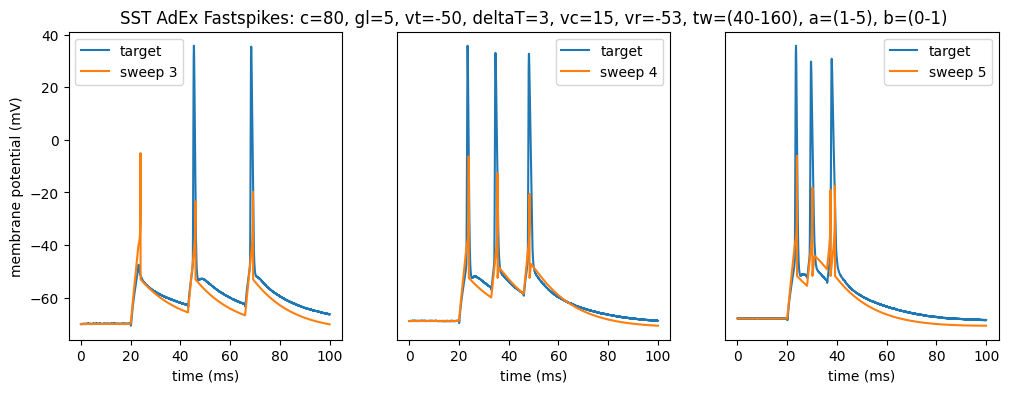

In [73]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(fastspikes_output_sliced[0], adex_sst_fast_8[0]*1000, d2_title='sweep 3')
ylabel('membrane potential (mV)')

subplot(1,3,2)
create_comparison_together(fastspikes_output_sliced[1], adex_sst_fast_8[1]*1000, d2_title='sweep 4')
ax = plt.gca()
ax.yaxis.set_visible(False)
title('SST AdEx Fastspikes: c=80, gl=5, vt=-50, deltaT=3, vc=15, vr=-53, tw=(40-160), a=(1-5), b=(0-1)')

subplot(1,3,3)
create_comparison_together(fastspikes_output_sliced[2], adex_sst_fast_8[2]*1000, d2_title='sweep 5')
ax = plt.gca()
ax.yaxis.set_visible(False)

In [ ]:
adex_sst_fast_9 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced, c_var=120, gl_var=5, vt_var=-50,\
                                     delt_var=3, vc_var=15, vr=-53, tauw_min=40, a_max=5, b_max=1)

# tt: 5.6s


first fit:
Round 0: Best parameters a=3.65724695 nS, b=120.37314566 pA, tauw=76.0103899 ms (error: 169.08401033 mV^2)
Round 1: Best parameters a=3.85781793 nS, b=97.07308475 pA, tauw=55.09545666 ms (error: 147.77132188 mV^2)
Round 2: Best parameters a=1.63393568 nS, b=60.53054408 pA, tauw=56.11812473 ms (error: 139.35675724 mV^2)
Round 3: Best parameters a=1.25382373 nS, b=38.74977386 pA, tauw=54.8503725 ms (error: 128.94887476 mV^2)
Round 4: Best parameters a=1.16082108 nS, b=28.05166195 pA, tauw=57.11112736 ms (error: 123.81740871 mV^2)
Round 5: Best parameters a=1.39836278 nS, b=15.40103434 pA, tauw=58.81845619 ms (error: 120.27859462 mV^2)
Round 6: Best parameters a=1.12791656 nS, b=12.19175412 pA, tauw=106.43691463 ms (error: 119.38999586 mV^2)
Round 7: Best parameters a=1.12791656 nS, b=12.19175412 pA, tauw=106.43691463 ms (error: 119.38999586 mV^2)
Round 8: Best parameters a=1.12597477 nS, b=12.90004303 pA, tauw=115.95009749 ms (error: 119.34053385 mV^2)
Round 9: Best parameters

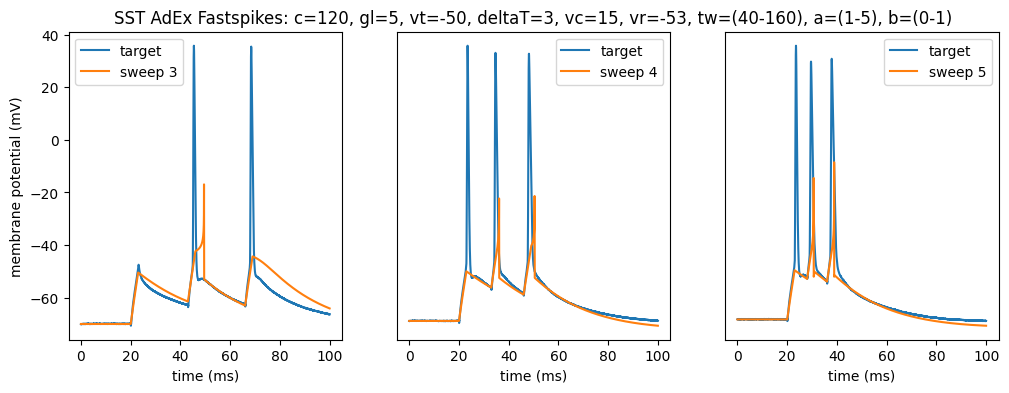

In [75]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(fastspikes_output_sliced[0], adex_sst_fast_9[0]*1000, d2_title='sweep 3')
ylabel('membrane potential (mV)')

subplot(1,3,2)
create_comparison_together(fastspikes_output_sliced[1], adex_sst_fast_9[1]*1000, d2_title='sweep 4')
ax = plt.gca()
ax.yaxis.set_visible(False)
title('SST AdEx Fastspikes: c=120, gl=5, vt=-50, deltaT=3, vc=15, vr=-53, tw=(40-160), a=(1-5), b=(0-1)')

subplot(1,3,3)
create_comparison_together(fastspikes_output_sliced[2], adex_sst_fast_9[2]*1000, d2_title='sweep 5')
ax = plt.gca()
ax.yaxis.set_visible(False)

In [ ]:
adex_sst_fast_9_1 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced, c_var=120, gl_var=5, vt_var=-50,\
                                     delt_var=3, vc_var=15, vr=-53, tauw_min=40, a_max=5, b_max=1)

# tt: 5.6s

first fit:
Round 0: Best parameters a=4.18641192 nS, b=130.1240261 pA, tauw=133.76784373 ms (error: 198.89421619 mV^2)
Round 1: Best parameters a=1.87224975 nS, b=100.80447765 pA, tauw=124.25964451 ms (error: 158.00083963 mV^2)
Round 2: Best parameters a=1.44882425 nS, b=105.48609655 pA, tauw=60.25723922 ms (error: 146.58207124 mV^2)
Round 3: Best parameters a=1.440028 nS, b=58.43216511 pA, tauw=57.22551389 ms (error: 137.3850194 mV^2)
Round 4: Best parameters a=1.23840218 nS, b=37.32264493 pA, tauw=50.69747738 ms (error: 128.95785594 mV^2)
Round 5: Best parameters a=1.53641367 nS, b=21.75082463 pA, tauw=83.89930542 ms (error: 122.11112747 mV^2)
Round 6: Best parameters a=1.1314767 nS, b=16.56695831 pA, tauw=52.336738 ms (error: 120.03315435 mV^2)
Round 7: Best parameters a=1.46938599 nS, b=12.54404356 pA, tauw=132.45233687 ms (error: 119.30499183 mV^2)
Round 8: Best parameters a=1.46938599 nS, b=12.54404356 pA, tauw=132.45233687 ms (error: 119.30499183 mV^2)
Round 9: Best parameters a

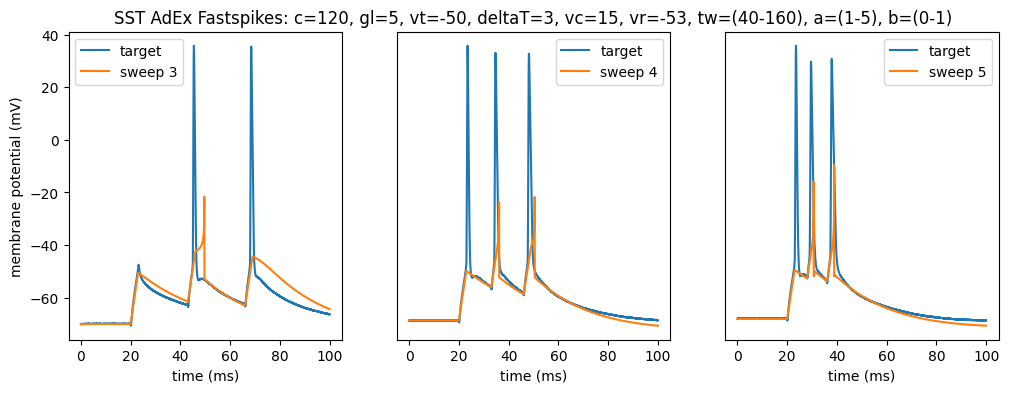

In [85]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(fastspikes_output_sliced[0], adex_sst_fast_9_1[0]*1000, d2_title='sweep 3')
ylabel('membrane potential (mV)')

subplot(1,3,2)
create_comparison_together(fastspikes_output_sliced[1], adex_sst_fast_9_1[1]*1000, d2_title='sweep 4')
ax = plt.gca()
ax.yaxis.set_visible(False)
title('SST AdEx Fastspikes: c=120, gl=5, vt=-50, deltaT=3, vc=15, vr=-53, tw=(40-160), a=(1-5), b=(0-1)')

subplot(1,3,3)
create_comparison_together(fastspikes_output_sliced[2], adex_sst_fast_9_1[2]*1000, d2_title='sweep 5')
ax = plt.gca()
ax.yaxis.set_visible(False)

In [ ]:
adex_sst_fast_9_2 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced, c_var=120, gl_var=5, vt_var=-50,\
                                     delt_var=3, vc_var=15, vr=-53, tauw_min=40, a_max=5, b_max=1)

# tt: 6s

first fit:
Round 0: Best parameters a=2.87281996 nS, b=122.31208182 pA, tauw=86.89775551 ms (error: 172.93512155 mV^2)
Round 1: Best parameters a=1.820445 nS, b=105.09557646 pA, tauw=62.55195218 ms (error: 147.81970913 mV^2)
Round 2: Best parameters a=1.65735528 nS, b=62.97573295 pA, tauw=71.07898218 ms (error: 144.9047424 mV^2)
Round 3: Best parameters a=1.52240702 nS, b=53.63805971 pA, tauw=76.69242445 ms (error: 137.81504951 mV^2)
Round 4: Best parameters a=1.52240702 nS, b=53.63805971 pA, tauw=76.69242445 ms (error: 137.81504951 mV^2)
Round 5: Best parameters a=1.59403637 nS, b=44.51899288 pA, tauw=55.77351219 ms (error: 130.67034276 mV^2)
Round 6: Best parameters a=1.59403637 nS, b=44.51899288 pA, tauw=55.77351219 ms (error: 130.67034276 mV^2)
Round 7: Best parameters a=1.59403637 nS, b=44.51899288 pA, tauw=55.77351219 ms (error: 130.67034276 mV^2)
Round 8: Best parameters a=1.59403637 nS, b=44.51899288 pA, tauw=55.77351219 ms (error: 130.67034276 mV^2)
Round 9: Best parameters a=

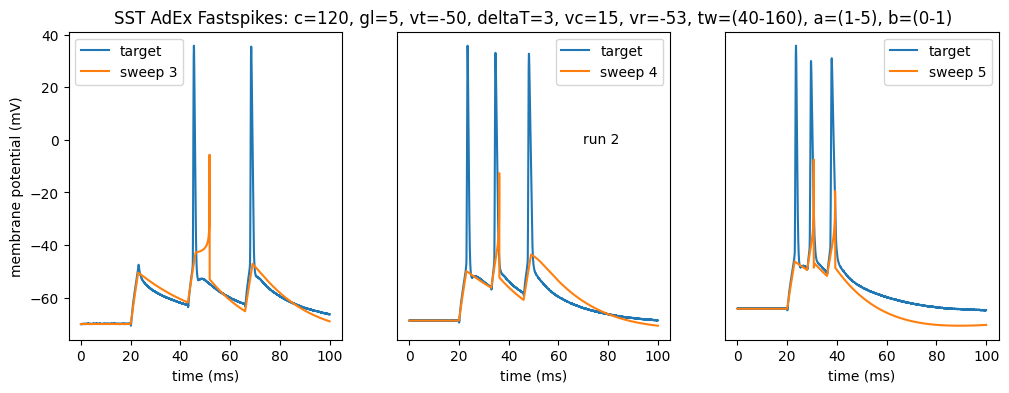

In [110]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(fastspikes_output_sliced[0], adex_sst_fast_9_2[0]*1000, d2_title='sweep 3')
ylabel('membrane potential (mV)')

subplot(1,3,2)
create_comparison_together(fastspikes_output_sliced[1], adex_sst_fast_9_2[1]*1000, d2_title='sweep 4')
text(70, 0, 'run 2')
ax = plt.gca()
ax.yaxis.set_visible(False)
title('SST AdEx Fastspikes: c=120, gl=5, vt=-50, deltaT=3, vc=15, vr=-53, tw=(40-160), a=(1-5), b=(0-1)')

subplot(1,3,3)
create_comparison_together(fastspikes_output_sliced[2], adex_sst_fast_9_2[2]*1000, d2_title='sweep 5')
ax = plt.gca()
ax.yaxis.set_visible(False)

In [ ]:
adex_sst_fast_9_3 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced, c_var=120, gl_var=5, vt_var=-50,\
                                     delt_var=3, vc_var=15, vr=-53, tauw_min=40, a_max=5, b_max=1)

# tt: 5.5s

first fit:
Round 0: Best parameters a=3.19995392 nS, b=124.25628729 pA, tauw=126.27560876 ms (error: 186.80481034 mV^2)
Round 1: Best parameters a=2.76729533 nS, b=63.68498804 pA, tauw=92.86199714 ms (error: 153.72325823 mV^2)
Round 2: Best parameters a=1.71454976 nS, b=43.43655682 pA, tauw=136.00779447 ms (error: 135.2115242 mV^2)
Round 3: Best parameters a=1.4212099 nS, b=26.07979887 pA, tauw=149.18314888 ms (error: 124.77722876 mV^2)
Round 4: Best parameters a=1.57446703 nS, b=18.0455096 pA, tauw=149.18314888 ms (error: 120.48411246 mV^2)
Round 5: Best parameters a=1.33126527 nS, b=15.26282087 pA, tauw=149.74636976 ms (error: 119.57764379 mV^2)
Round 6: Best parameters a=1.39030554 nS, b=13.12650022 pA, tauw=153.30608552 ms (error: 119.34909389 mV^2)
Round 7: Best parameters a=1.26571785 nS, b=13.48452746 pA, tauw=155.56206152 ms (error: 119.32449662 mV^2)
Round 8: Best parameters a=1.49605214 nS, b=12.98325057 pA, tauw=155.42612336 ms (error: 119.29462648 mV^2)
Round 9: Best parame

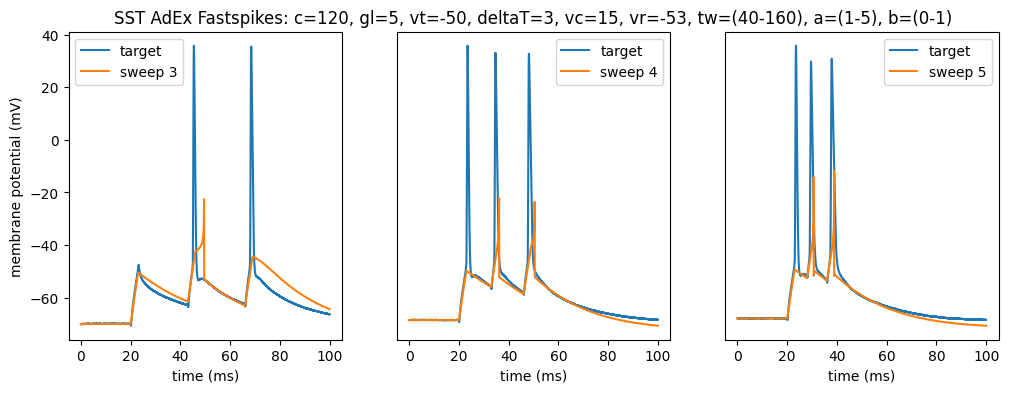

In [89]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(fastspikes_output_sliced[0], adex_sst_fast_9_3[0]*1000, d2_title='sweep 3')
ylabel('membrane potential (mV)')

subplot(1,3,2)
create_comparison_together(fastspikes_output_sliced[1], adex_sst_fast_9_3[1]*1000, d2_title='sweep 4')
ax = plt.gca()
ax.yaxis.set_visible(False)
title('SST AdEx Fastspikes: c=120, gl=5, vt=-50, deltaT=3, vc=15, vr=-53, tw=(40-160), a=(1-5), b=(0-1)')

subplot(1,3,3)
create_comparison_together(fastspikes_output_sliced[2], adex_sst_fast_9_3[2]*1000, d2_title='sweep 5')
ax = plt.gca()
ax.yaxis.set_visible(False)

In [ ]:
adex_sst_fast_9_4 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced, c_var=120, gl_var=5, vt_var=-50,\
                                     delt_var=3, vc_var=15, vr=-53, tauw_min=40, a_max=5, b_max=1)

# tt: 5.4s

first fit:
Round 0: Best parameters a=2.56611185 nS, b=145.73437026 pA, tauw=68.78085508 ms (error: 186.70366509 mV^2)
Round 1: Best parameters a=1.98639608 nS, b=108.03924288 pA, tauw=59.45683661 ms (error: 148.91534763 mV^2)
Round 2: Best parameters a=1.33419253 nS, b=64.49175482 pA, tauw=48.51067578 ms (error: 138.44163146 mV^2)
Round 3: Best parameters a=2.52668787 nS, b=39.61937682 pA, tauw=46.17791656 ms (error: 128.98803359 mV^2)
Round 4: Best parameters a=1.53493311 nS, b=41.30294992 pA, tauw=44.29410531 ms (error: 128.78668299 mV^2)
Round 5: Best parameters a=1.38721969 nS, b=20.72285156 pA, tauw=48.61918726 ms (error: 121.79079637 mV^2)
Round 6: Best parameters a=1.21270957 nS, b=16.33224139 pA, tauw=60.14667652 ms (error: 120.03851361 mV^2)
Round 7: Best parameters a=1.18453451 nS, b=13.04254794 pA, tauw=121.41332594 ms (error: 119.32435178 mV^2)
Round 8: Best parameters a=1.18453451 nS, b=13.04254794 pA, tauw=121.41332594 ms (error: 119.32435178 mV^2)
Round 9: Best paramete

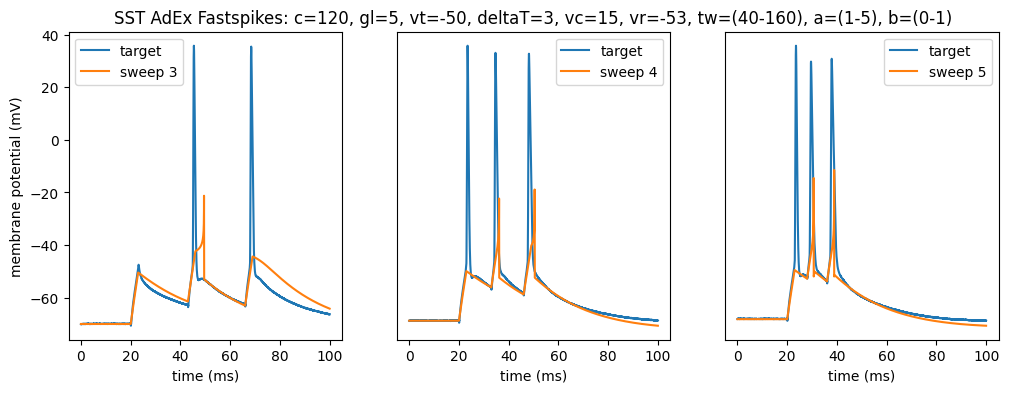

In [105]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(fastspikes_output_sliced[0], adex_sst_fast_9_4[0]*1000, d2_title='sweep 3')
ylabel('membrane potential (mV)')

subplot(1,3,2)
create_comparison_together(fastspikes_output_sliced[1], adex_sst_fast_9_4[1]*1000, d2_title='sweep 4')
ax = plt.gca()
ax.yaxis.set_visible(False)
title('SST AdEx Fastspikes: c=120, gl=5, vt=-50, deltaT=3, vc=15, vr=-53, tw=(40-160), a=(1-5), b=(0-1)')

subplot(1,3,3)
create_comparison_together(fastspikes_output_sliced[2], adex_sst_fast_9_4[2]*1000, d2_title='sweep 5')
ax = plt.gca()
ax.yaxis.set_visible(False)

In [ ]:
adex_sst_fast_9_5 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced, c_var=120, gl_var=5, vt_var=-50,\
                                     delt_var=3, vc_var=15, vr=-53, tauw_min=40, a_max=5, b_max=1)

# tt: 5.7s

first fit:
Round 0: Best parameters a=3.90116943 nS, b=108.51835425 pA, tauw=63.73675895 ms (error: 156.71310002 mV^2)
Round 1: Best parameters a=4.4214577 nS, b=88.22142788 pA, tauw=56.29378482 ms (error: 146.15802809 mV^2)
Round 2: Best parameters a=1.99134914 nS, b=38.8310998 pA, tauw=53.61840888 ms (error: 130.94313679 mV^2)
Round 3: Best parameters a=1.99134914 nS, b=38.8310998 pA, tauw=53.61840888 ms (error: 130.94313679 mV^2)
Round 4: Best parameters a=1.53948707 nS, b=29.62673363 pA, tauw=107.59427445 ms (error: 127.43247913 mV^2)
Round 5: Best parameters a=1.53948707 nS, b=29.62673363 pA, tauw=107.59427445 ms (error: 127.43247913 mV^2)
Round 6: Best parameters a=1.53948707 nS, b=29.62673363 pA, tauw=107.59427445 ms (error: 127.43247913 mV^2)
Round 7: Best parameters a=1.53948707 nS, b=29.62673363 pA, tauw=107.59427445 ms (error: 127.43247913 mV^2)
Round 8: Best parameters a=1.53948707 nS, b=29.62673363 pA, tauw=107.59427445 ms (error: 127.43247913 mV^2)
Round 9: Best parameter

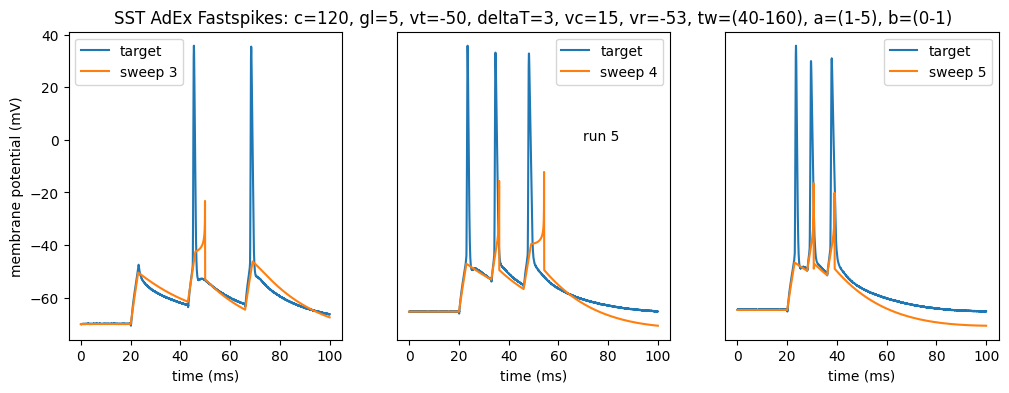

In [109]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(fastspikes_output_sliced[0], adex_sst_fast_9_5[0]*1000, d2_title='sweep 3')
ylabel('membrane potential (mV)')

subplot(1,3,2)
create_comparison_together(fastspikes_output_sliced[1], adex_sst_fast_9_5[1]*1000, d2_title='sweep 4')
text(70, 0, 'run 5')
ax = plt.gca()
ax.yaxis.set_visible(False)
title('SST AdEx Fastspikes: c=120, gl=5, vt=-50, deltaT=3, vc=15, vr=-53, tw=(40-160), a=(1-5), b=(0-1)')

subplot(1,3,3)
create_comparison_together(fastspikes_output_sliced[2], adex_sst_fast_9_5[2]*1000, d2_title='sweep 5')
ax = plt.gca()
ax.yaxis.set_visible(False)

In [ ]:
adex_sst_fast_9_6 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced, c_var=120, gl_var=5, vt_var=-50,\
                                     delt_var=3, vc_var=15, vr=-53, tauw_min=40, a_max=5, b_max=1)

# tt: 5.3s

first fit:
Round 0: Best parameters a=4.17332435 nS, b=128.20726109 pA, tauw=138.47844808 ms (error: 197.24678254 mV^2)
Round 1: Best parameters a=2.96852696 nS, b=99.98668626 pA, tauw=81.3532792 ms (error: 153.36906351 mV^2)
Round 2: Best parameters a=2.07847217 nS, b=47.4022359 pA, tauw=117.80248479 ms (error: 137.89036137 mV^2)
Round 3: Best parameters a=1.40216842 nS, b=40.94048587 pA, tauw=62.0959254 ms (error: 129.80152785 mV^2)
Round 4: Best parameters a=1.21535689 nS, b=24.4285918 pA, tauw=127.4553077 ms (error: 123.0588079 mV^2)
Round 5: Best parameters a=1.21427396 nS, b=15.90402263 pA, tauw=71.04125834 ms (error: 119.70180681 mV^2)
Round 6: Best parameters a=1.14794752 nS, b=13.78511761 pA, tauw=144.16014555 ms (error: 119.34415307 mV^2)
Round 7: Best parameters a=1.14794752 nS, b=13.78511761 pA, tauw=144.16014555 ms (error: 119.34415307 mV^2)
Round 8: Best parameters a=1.1115063 nS, b=13.50473744 pA, tauw=119.88310291 ms (error: 119.33586287 mV^2)
Round 9: Best parameters a

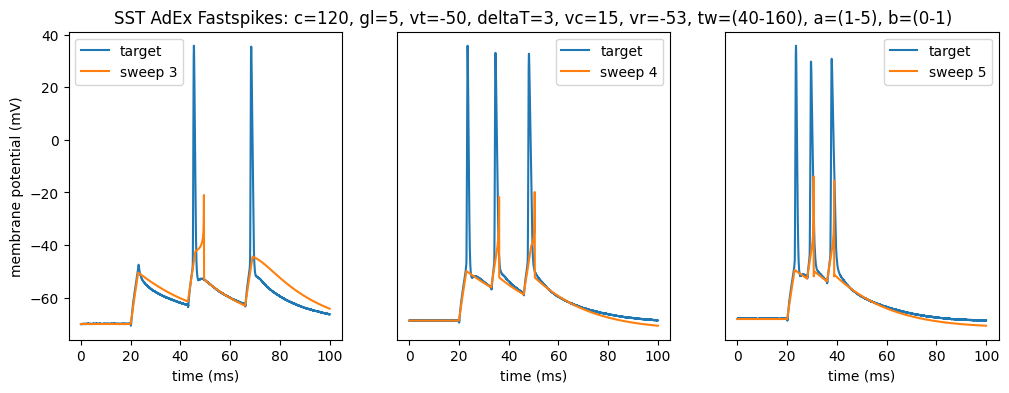

In [106]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(fastspikes_output_sliced[0], adex_sst_fast_9_6[0]*1000, d2_title='sweep 3')
ylabel('membrane potential (mV)')

subplot(1,3,2)
create_comparison_together(fastspikes_output_sliced[1], adex_sst_fast_9_6[1]*1000, d2_title='sweep 4')
ax = plt.gca()
ax.yaxis.set_visible(False)
title('SST AdEx Fastspikes: c=120, gl=5, vt=-50, deltaT=3, vc=15, vr=-53, tw=(40-160), a=(1-5), b=(0-1)')

subplot(1,3,3)
create_comparison_together(fastspikes_output_sliced[2], adex_sst_fast_9_6[2]*1000, d2_title='sweep 5')
ax = plt.gca()
ax.yaxis.set_visible(False)

In [ ]:
adex_sst_fast_9_7 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced, c_var=120, gl_var=5, vt_var=-50,\
                                     delt_var=3, vc_var=15, vr=-53, tauw_min=40, a_max=5, b_max=1)

# tt: 5.8s

first fit:
Round 0: Best parameters a=4.03319193 nS, b=133.23808278 pA, tauw=78.18393596 ms (error: 182.97446165 mV^2)
Round 1: Best parameters a=4.51903899 nS, b=89.36826318 pA, tauw=64.03374945 ms (error: 149.02227747 mV^2)
Round 2: Best parameters a=3.97511372 nS, b=52.74447197 pA, tauw=62.68669667 ms (error: 142.07553066 mV^2)
Round 3: Best parameters a=4.16581978 nS, b=31.05587194 pA, tauw=67.26891229 ms (error: 129.97690485 mV^2)
Round 4: Best parameters a=1.9080436 nS, b=23.39960641 pA, tauw=93.30679485 ms (error: 123.72718038 mV^2)
Round 5: Best parameters a=1.49014643 nS, b=17.27475333 pA, tauw=85.06263205 ms (error: 120.44335335 mV^2)
Round 6: Best parameters a=1.50036725 nS, b=14.04074959 pA, tauw=105.88700691 ms (error: 119.59002449 mV^2)
Round 7: Best parameters a=1.1871912 nS, b=13.52587661 pA, tauw=150.73500994 ms (error: 119.35319959 mV^2)
Round 8: Best parameters a=1.33781902 nS, b=12.26470246 pA, tauw=154.01996767 ms (error: 119.35235333 mV^2)
Round 9: Best parameters

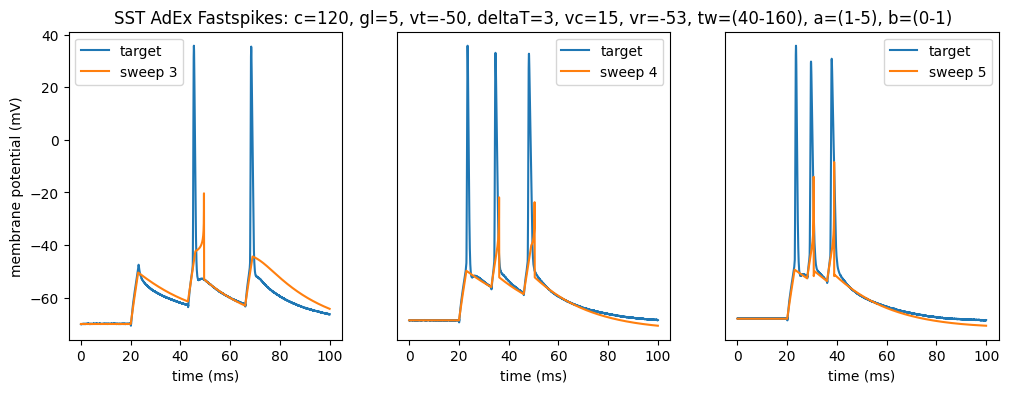

In [107]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(fastspikes_output_sliced[0], adex_sst_fast_9_7[0]*1000, d2_title='sweep 3')
ylabel('membrane potential (mV)')

subplot(1,3,2)
create_comparison_together(fastspikes_output_sliced[1], adex_sst_fast_9_7[1]*1000, d2_title='sweep 4')
ax = plt.gca()
ax.yaxis.set_visible(False)
title('SST AdEx Fastspikes: c=120, gl=5, vt=-50, deltaT=3, vc=15, vr=-53, tw=(40-160), a=(1-5), b=(0-1)')

subplot(1,3,3)
create_comparison_together(fastspikes_output_sliced[2], adex_sst_fast_9_7[2]*1000, d2_title='sweep 5')
ax = plt.gca()
ax.yaxis.set_visible(False)

In [ ]:
adex_sst_fast_9_8 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced, c_var=120, gl_var=5, vt_var=-50,\
                                     delt_var=3, vc_var=15, vr=-53, tauw_min=40, a_max=5, b_max=1)

# tt: 5.9s

first fit:
Round 0: Best parameters a=3.77670291 nS, b=146.15564606 pA, tauw=70.13286409 ms (error: 191.09168327 mV^2)
Round 1: Best parameters a=2.62749932 nS, b=100.14800971 pA, tauw=56.52458475 ms (error: 147.72394695 mV^2)
Round 2: Best parameters a=2.00353558 nS, b=54.6076148 pA, tauw=59.1592624 ms (error: 137.54321873 mV^2)
Round 3: Best parameters a=1.62237867 nS, b=36.43333311 pA, tauw=53.89136467 ms (error: 129.10629048 mV^2)
Round 4: Best parameters a=1.63185884 nS, b=26.76730707 pA, tauw=94.09562611 ms (error: 125.27808191 mV^2)
Round 5: Best parameters a=1.49064664 nS, b=19.96839482 pA, tauw=98.29442776 ms (error: 121.13959569 mV^2)
Round 6: Best parameters a=1.47608482 nS, b=14.56351164 pA, tauw=135.68472834 ms (error: 119.44194433 mV^2)
Round 7: Best parameters a=1.30499779 nS, b=12.98506806 pA, tauw=129.13223025 ms (error: 119.33332307 mV^2)
Round 8: Best parameters a=1.38543104 nS, b=13.11100355 pA, tauw=150.90637013 ms (error: 119.29994308 mV^2)
Round 9: Best parameter

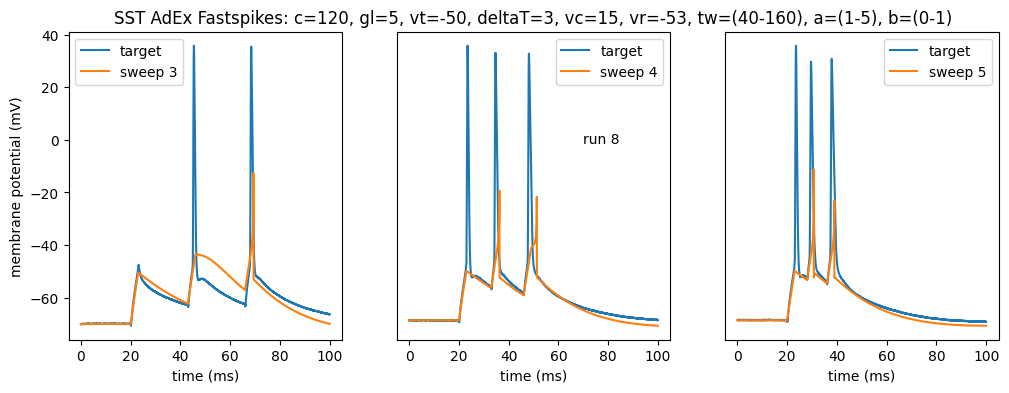

In [108]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(fastspikes_output_sliced[0], adex_sst_fast_9_8[0]*1000, d2_title='sweep 3')
ylabel('membrane potential (mV)')

subplot(1,3,2)
create_comparison_together(fastspikes_output_sliced[1], adex_sst_fast_9_8[1]*1000, d2_title='sweep 4')
text(70, 0, 'run 8')
ax = plt.gca()
ax.yaxis.set_visible(False)
title('SST AdEx Fastspikes: c=120, gl=5, vt=-50, deltaT=3, vc=15, vr=-53, tw=(40-160), a=(1-5), b=(0-1)')

subplot(1,3,3)
create_comparison_together(fastspikes_output_sliced[2], adex_sst_fast_9_8[2]*1000, d2_title='sweep 5')
ax = plt.gca()
ax.yaxis.set_visible(False)

In [ ]:
adex_sst_fast_9_9 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced, c_var=120, gl_var=5, vt_var=-50,\
                                     delt_var=3, vc_var=15, vr=-53, tauw_min=40, a_max=5, b_max=1)

# tt: 5.9s

first fit:
Round 0: Best parameters a=3.83337939 nS, b=128.18837315 pA, tauw=134.2767404 ms (error: 195.68764506 mV^2)
Round 1: Best parameters a=4.21102053 nS, b=95.95148628 pA, tauw=94.19551129 ms (error: 156.3513402 mV^2)
Round 2: Best parameters a=4.22204499 nS, b=46.48555482 pA, tauw=134.2767404 ms (error: 142.53648616 mV^2)
Round 3: Best parameters a=1.97042496 nS, b=42.50981857 pA, tauw=70.0679665 ms (error: 131.81142456 mV^2)
Round 4: Best parameters a=1.56532071 nS, b=24.19137314 pA, tauw=151.27272327 ms (error: 123.67008461 mV^2)
Round 5: Best parameters a=1.58487376 nS, b=16.42022185 pA, tauw=153.99147238 ms (error: 120.01353325 mV^2)
Round 6: Best parameters a=1.1793629 nS, b=13.19128598 pA, tauw=144.60778346 ms (error: 119.33286069 mV^2)
Round 7: Best parameters a=1.19174198 nS, b=13.61367749 pA, tauw=133.03630913 ms (error: 119.32001424 mV^2)
Round 8: Best parameters a=1.12978607 nS, b=13.76880241 pA, tauw=152.33443135 ms (error: 119.31902541 mV^2)
Round 9: Best parameter

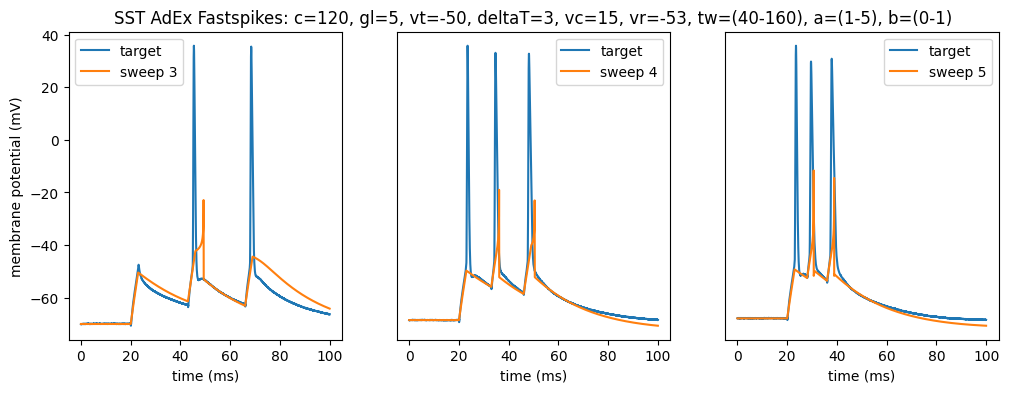

In [91]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(fastspikes_output_sliced[0], adex_sst_fast_9_9[0]*1000, d2_title='sweep 3')
ylabel('membrane potential (mV)')

subplot(1,3,2)
create_comparison_together(fastspikes_output_sliced[1], adex_sst_fast_9_9[1]*1000, d2_title='sweep 4')
ax = plt.gca()
ax.yaxis.set_visible(False)
title('SST AdEx Fastspikes: c=120, gl=5, vt=-50, deltaT=3, vc=15, vr=-53, tw=(40-160), a=(1-5), b=(0-1)')

subplot(1,3,3)
create_comparison_together(fastspikes_output_sliced[2], adex_sst_fast_9_9[2]*1000, d2_title='sweep 5')
ax = plt.gca()
ax.yaxis.set_visible(False)

In [ ]:
adex_sst_fast_10 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced, c_var=120, gl_var=5, vt_var=-50,\
                                     delt_var=3, vc_var=30, vr=-53, tauw_min=40, a_max=5, b_max=0.5)

# tt: 5.3s

first fit:
Round 0: Best parameters a=4.08213179 nS, b=54.28363406 pA, tauw=54.76728794 ms (error: 142.25873269 mV^2)
Round 1: Best parameters a=1.69831969 nS, b=40.48760434 pA, tauw=71.8994734 ms (error: 130.68375153 mV^2)
Round 2: Best parameters a=1.34624603 nS, b=26.61186891 pA, tauw=60.44701213 ms (error: 124.17467618 mV^2)
Round 3: Best parameters a=1.6620048 nS, b=16.6986089 pA, tauw=135.4885713 ms (error: 120.29141985 mV^2)
Round 4: Best parameters a=1.34772535 nS, b=13.71848401 pA, tauw=109.34846229 ms (error: 119.62494802 mV^2)
Round 5: Best parameters a=1.54234035 nS, b=11.99523487 pA, tauw=140.18022612 ms (error: 119.46560297 mV^2)
Round 6: Best parameters a=1.54234035 nS, b=11.99523487 pA, tauw=140.18022612 ms (error: 119.46560297 mV^2)
Round 7: Best parameters a=1.54234035 nS, b=11.99523487 pA, tauw=140.18022612 ms (error: 119.46560297 mV^2)
Round 8: Best parameters a=1.17755239 nS, b=13.28052903 pA, tauw=151.00839337 ms (error: 119.38145844 mV^2)
Round 9: Best parameters

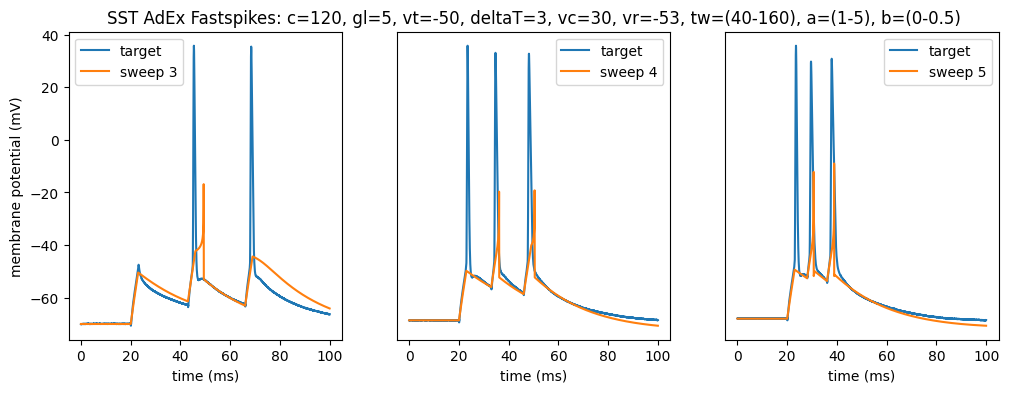

In [ ]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(fastspikes_output_sliced[0], adex_sst_fast_10[0]*1000, d2_title='sweep 3')
ylabel('membrane potential (mV)')

subplot(1,3,2)
create_comparison_together(fastspikes_output_sliced[1], adex_sst_fast_10[1]*1000, d2_title='sweep 4')
ax = plt.gca()
ax.yaxis.set_visible(False)
title('SST AdEx Fastspikes: c=120, gl=5, vt=-50, deltaT=3, vc=30, vr=-53, tw=(40-160), a=(1-5), b=(0-0.5)')

subplot(1,3,3)
create_comparison_together(fastspikes_output_sliced[2], adex_sst_fast_10[2]*1000, d2_title='sweep 5')
ax = plt.gca()
ax.yaxis.set_visible(False)

In [ ]:
adex_sst_fast_10_1 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced, c_var=120, gl_var=5, vt_var=-50,\
                                     delt_var=3, vc_var=30, vr=-53, tauw_min=40, a_max=5, b_max=0.5)

# tt: 6s

first fit:
Round 0: Best parameters a=2.02275204 nS, b=59.82040827 pA, tauw=66.06875612 ms (error: 142.63854543 mV^2)
Round 1: Best parameters a=3.58798529 nS, b=32.21209706 pA, tauw=68.07129585 ms (error: 130.03419335 mV^2)
Round 2: Best parameters a=1.72662154 nS, b=18.63260981 pA, tauw=61.3000845 ms (error: 122.18272144 mV^2)
Round 3: Best parameters a=1.4416562 nS, b=13.03094405 pA, tauw=118.23742359 ms (error: 119.53854834 mV^2)
Round 4: Best parameters a=1.24729432 nS, b=13.02402576 pA, tauw=112.31312978 ms (error: 119.51617623 mV^2)
Round 5: Best parameters a=1.31248846 nS, b=12.36433277 pA, tauw=115.14449329 ms (error: 119.42813054 mV^2)
Round 6: Best parameters a=1.17369937 nS, b=12.60325847 pA, tauw=145.27080954 ms (error: 119.4257935 mV^2)
Round 7: Best parameters a=1.17369937 nS, b=12.60325847 pA, tauw=145.27080954 ms (error: 119.4257935 mV^2)
Round 8: Best parameters a=1.09977039 nS, b=13.06172303 pA, tauw=145.25115131 ms (error: 119.4030325 mV^2)
Round 9: Best parameters 

In [ ]:
adex_sst_fast_10_2 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced, c_var=120, gl_var=5, vt_var=-50,\
                                     delt_var=3, vc_var=30, vr=-53, tauw_min=40, a_max=5, b_max=0.5)

# tt: 6.1s

first fit:
Round 0: Best parameters a=1.73846881 nS, b=63.65675022 pA, tauw=58.69222849 ms (error: 143.15508294 mV^2)
Round 1: Best parameters a=1.39009822 nS, b=39.50233471 pA, tauw=62.65539256 ms (error: 129.60270242 mV^2)
Round 2: Best parameters a=1.33091486 nS, b=23.88412424 pA, tauw=119.0438274 ms (error: 123.43607266 mV^2)
Round 3: Best parameters a=1.30219394 nS, b=14.34661157 pA, tauw=109.96124074 ms (error: 119.69505184 mV^2)
Round 4: Best parameters a=1.24408983 nS, b=13.70123412 pA, tauw=86.06200844 ms (error: 119.53756238 mV^2)
Round 5: Best parameters a=1.76122778 nS, b=11.88902507 pA, tauw=147.20307529 ms (error: 119.5122978 mV^2)
Round 6: Best parameters a=1.76122778 nS, b=11.88902507 pA, tauw=148.90230723 ms (error: 119.46431404 mV^2)
Round 7: Best parameters a=1.49491627 nS, b=11.60502034 pA, tauw=109.96124074 ms (error: 119.44424351 mV^2)
Round 8: Best parameters a=1.19044246 nS, b=12.34990143 pA, tauw=99.17246497 ms (error: 119.42184815 mV^2)
Round 9: Best parameter

In [ ]:
adex_sst_fast_10_3 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced, c_var=120, gl_var=5, vt_var=-50,\
                                     delt_var=3, vc_var=30, vr=-53, tauw_min=40, a_max=5, b_max=0.5)

# tt: 5.6s

first fit:
Round 0: Best parameters a=3.46308115 nS, b=53.9968962 pA, tauw=115.33893836 ms (error: 148.23507103 mV^2)
Round 1: Best parameters a=3.49603287 nS, b=36.96610849 pA, tauw=62.78543586 ms (error: 131.21687801 mV^2)
Round 2: Best parameters a=2.09271534 nS, b=22.38705047 pA, tauw=95.71032967 ms (error: 124.00410433 mV^2)
Round 3: Best parameters a=1.33083162 nS, b=17.7670837 pA, tauw=76.64761423 ms (error: 120.70805375 mV^2)
Round 4: Best parameters a=1.22445527 nS, b=13.52081179 pA, tauw=81.48140442 ms (error: 119.53461713 mV^2)
Round 5: Best parameters a=1.22445527 nS, b=11.31088755 pA, tauw=81.48140442 ms (error: 119.52165306 mV^2)
Round 6: Best parameters a=1.11390675 nS, b=13.13655209 pA, tauw=82.51961932 ms (error: 119.50969169 mV^2)
Round 7: Best parameters a=1.10335645 nS, b=13.00654428 pA, tauw=104.72767542 ms (error: 119.50182202 mV^2)
Round 8: Best parameters a=1.10472386 nS, b=14.00194185 pA, tauw=136.18120548 ms (error: 119.42912403 mV^2)
Round 9: Best parameters 

In [ ]:
adex_sst_fast_10_4 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced, c_var=120, gl_var=5, vt_var=-50,\
                                     delt_var=3, vc_var=30, vr=-53, tauw_min=40, a_max=5, b_max=0.5)

# tt: 5.6s

first fit:
Round 0: Best parameters a=1.99280869 nS, b=104.97400797 pA, tauw=59.31431089 ms (error: 147.61207622 mV^2)
Round 1: Best parameters a=1.65639284 nS, b=36.43564048 pA, tauw=97.56526434 ms (error: 131.53293194 mV^2)
Round 2: Best parameters a=1.46969261 nS, b=26.44868834 pA, tauw=97.02720769 ms (error: 124.99114851 mV^2)
Round 3: Best parameters a=1.39590747 nS, b=15.91072166 pA, tauw=109.23489694 ms (error: 120.2692183 mV^2)
Round 4: Best parameters a=1.35003179 nS, b=11.37035892 pA, tauw=99.12819991 ms (error: 119.65747068 mV^2)
Round 5: Best parameters a=2.01284352 nS, b=11.57727982 pA, tauw=147.2164315 ms (error: 119.44547237 mV^2)
Round 6: Best parameters a=2.01284352 nS, b=11.57727982 pA, tauw=147.2164315 ms (error: 119.44547237 mV^2)
Round 7: Best parameters a=2.01284352 nS, b=11.57727982 pA, tauw=147.2164315 ms (error: 119.44547237 mV^2)
Round 8: Best parameters a=2.01284352 nS, b=11.57727982 pA, tauw=147.2164315 ms (error: 119.44547237 mV^2)
Round 9: Best parameters 

In [ ]:
adex_sst_fast_10_5 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced, c_var=120, gl_var=5, vt_var=-50,\
                                     delt_var=3, vc_var=30, vr=-53, tauw_min=40, a_max=5, b_max=0.5)

# tt: 6s

first fit:
Round 0: Best parameters a=1.84023815 nS, b=72.02834843 pA, tauw=71.36579956 ms (error: 154.97587462 mV^2)
Round 1: Best parameters a=1.60973758 nS, b=42.77557563 pA, tauw=104.05467959 ms (error: 133.55642833 mV^2)
Round 2: Best parameters a=1.32208877 nS, b=24.26538248 pA, tauw=117.64210627 ms (error: 123.56416772 mV^2)
Round 3: Best parameters a=1.30975797 nS, b=15.5338368 pA, tauw=88.95250993 ms (error: 120.04039871 mV^2)
Round 4: Best parameters a=1.20651917 nS, b=12.9580156 pA, tauw=82.66023564 ms (error: 119.51986212 mV^2)
Round 5: Best parameters a=1.14316042 nS, b=13.79981828 pA, tauw=72.04206952 ms (error: 119.49188915 mV^2)
Round 6: Best parameters a=1.14316042 nS, b=13.79981828 pA, tauw=72.04206952 ms (error: 119.49188915 mV^2)
Round 7: Best parameters a=1.24796165 nS, b=11.79238601 pA, tauw=88.66779469 ms (error: 119.45190775 mV^2)
Round 8: Best parameters a=1.24796165 nS, b=11.79238601 pA, tauw=88.66779469 ms (error: 119.45190775 mV^2)
Round 9: Best parameters a

In [ ]:
adex_sst_fast_10_6 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced, c_var=120, gl_var=5, vt_var=-50,\
                                     delt_var=3, vc_var=30, vr=-53, tauw_min=40, a_max=5, b_max=0.5)

# tt: 5.8s

first fit:
Round 0: Best parameters a=4.16810135 nS, b=53.39809644 pA, tauw=82.80986759 ms (error: 145.91250533 mV^2)
Round 1: Best parameters a=1.3979353 nS, b=40.59563562 pA, tauw=52.28121743 ms (error: 129.07488464 mV^2)
Round 2: Best parameters a=1.27642565 nS, b=24.94945774 pA, tauw=51.40397549 ms (error: 123.10239944 mV^2)
Round 3: Best parameters a=1.17585767 nS, b=15.91961897 pA, tauw=64.30527831 ms (error: 120.40982243 mV^2)
Round 4: Best parameters a=1.17569835 nS, b=14.42741677 pA, tauw=148.22478748 ms (error: 119.71241474 mV^2)
Round 5: Best parameters a=1.17585767 nS, b=13.5656177 pA, tauw=152.33609073 ms (error: 119.45695896 mV^2)
Round 6: Best parameters a=1.16008069 nS, b=13.5656177 pA, tauw=153.72649578 ms (error: 119.41495242 mV^2)
Round 7: Best parameters a=1.10744822 nS, b=13.64894983 pA, tauw=146.82170565 ms (error: 119.40747679 mV^2)
Round 8: Best parameters a=1.16005721 nS, b=12.78882912 pA, tauw=149.06584527 ms (error: 119.38783652 mV^2)
Round 9: Best parameters

In [ ]:
adex_sst_fast_10_7 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced, c_var=120, gl_var=5, vt_var=-50,\
                                     delt_var=3, vc_var=30, vr=-53, tauw_min=40, a_max=5, b_max=0.5)

# tt: 5.9s

first fit:
Round 0: Best parameters a=3.64907175 nS, b=52.91703632 pA, tauw=70.57909608 ms (error: 142.99346221 mV^2)
Round 1: Best parameters a=1.75863553 nS, b=41.29317446 pA, tauw=86.50556189 ms (error: 132.25797091 mV^2)
Round 2: Best parameters a=1.40926643 nS, b=25.72113444 pA, tauw=86.90682752 ms (error: 124.30281108 mV^2)
Round 3: Best parameters a=1.30747982 nS, b=16.29529235 pA, tauw=104.8285885 ms (error: 119.92477995 mV^2)
Round 4: Best parameters a=1.22144148 nS, b=12.26334065 pA, tauw=102.64835241 ms (error: 119.50226135 mV^2)
Round 5: Best parameters a=1.57241847 nS, b=11.92812384 pA, tauw=111.27858981 ms (error: 119.49660138 mV^2)
Round 6: Best parameters a=1.19998906 nS, b=12.86052048 pA, tauw=109.92844127 ms (error: 119.49148988 mV^2)
Round 7: Best parameters a=1.17815794 nS, b=12.71119098 pA, tauw=146.87171516 ms (error: 119.40546289 mV^2)
Round 8: Best parameters a=1.17815794 nS, b=12.71119098 pA, tauw=146.87171516 ms (error: 119.40546289 mV^2)
Round 9: Best paramet

In [ ]:
adex_sst_fast_10_8 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced, c_var=120, gl_var=5, vt_var=-50,\
                                     delt_var=3, vc_var=30, vr=-53, tauw_min=40, a_max=5, b_max=0.5)

# tt: 5.8s

first fit:
Round 0: Best parameters a=4.02375382 nS, b=90.96497686 pA, tauw=61.86077458 ms (error: 148.09236861 mV^2)
Round 1: Best parameters a=2.63950338 nS, b=33.61023546 pA, tauw=74.42115064 ms (error: 132.11121982 mV^2)
Round 2: Best parameters a=4.04976576 nS, b=17.24730059 pA, tauw=68.17971379 ms (error: 126.66486956 mV^2)
Round 3: Best parameters a=1.58967184 nS, b=14.70575574 pA, tauw=88.34818412 ms (error: 120.36592277 mV^2)
Round 4: Best parameters a=1.49234144 nS, b=10.00365671 pA, tauw=104.84341456 ms (error: 119.66191653 mV^2)
Round 5: Best parameters a=1.48849299 nS, b=12.74511319 pA, tauw=130.48755861 ms (error: 119.53374526 mV^2)
Round 6: Best parameters a=1.48849299 nS, b=12.74511319 pA, tauw=130.48755861 ms (error: 119.53374526 mV^2)
Round 7: Best parameters a=2.75529482 nS, b=8.65380849 pA, tauw=50.45758747 ms (error: 119.1391738 mV^2)
Round 8: Best parameters a=2.75529482 nS, b=8.65380849 pA, tauw=50.45758747 ms (error: 119.1391738 mV^2)
Round 9: Best parameters a=

In [ ]:
adex_sst_fast_10_9 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced, c_var=120, gl_var=5, vt_var=-50,\
                                     delt_var=3, vc_var=30, vr=-53, tauw_min=40, a_max=5, b_max=0.5)

# tt: 5.8s

first fit:
Round 0: Best parameters a=1.63387746 nS, b=55.14310175 pA, tauw=52.30532954 ms (error: 135.34207718 mV^2)
Round 1: Best parameters a=1.83725664 nS, b=32.6654739 pA, tauw=51.85202282 ms (error: 130.43266053 mV^2)
Round 2: Best parameters a=1.57244917 nS, b=19.5553194 pA, tauw=47.82031021 ms (error: 122.91742133 mV^2)
Round 3: Best parameters a=1.53118319 nS, b=15.41628535 pA, tauw=131.27365817 ms (error: 119.85835465 mV^2)
Round 4: Best parameters a=1.63059367 nS, b=13.2007844 pA, tauw=133.42222388 ms (error: 119.65196216 mV^2)
Round 5: Best parameters a=1.47660579 nS, b=14.15514138 pA, tauw=139.95937821 ms (error: 119.59821031 mV^2)
Round 6: Best parameters a=1.20110415 nS, b=12.74192815 pA, tauw=154.492846 ms (error: 119.39227186 mV^2)
Round 7: Best parameters a=1.20110415 nS, b=12.74192815 pA, tauw=154.492846 ms (error: 119.39227186 mV^2)
Round 8: Best parameters a=1.20110415 nS, b=12.74192815 pA, tauw=154.492846 ms (error: 119.39227186 mV^2)
Round 9: Best parameters a=1.

In [ ]:
adex_sst_fast_11 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced, c_var=120, gl_var=5, vt_var=-50,\
                                     delt_var=3, vc_var=30, vr=-53, tauw_min=120, a_max=5, b_max=0.5)

# tt: 4.8s

first fit:
Round 0: Best parameters a=2.45427957 nS, b=98.31977536 pA, tauw=126.47206547 ms (error: 158.19553075 mV^2)
Round 1: Best parameters a=1.61176178 nS, b=47.9853543 pA, tauw=130.28823247 ms (error: 138.24167542 mV^2)
Round 2: Best parameters a=1.53926568 nS, b=30.73995601 pA, tauw=125.45678141 ms (error: 129.00528797 mV^2)
Round 3: Best parameters a=1.27786427 nS, b=20.54300323 pA, tauw=124.88308521 ms (error: 121.51135225 mV^2)
Round 4: Best parameters a=1.24911906 nS, b=14.78144614 pA, tauw=123.46903569 ms (error: 119.91189757 mV^2)
Round 5: Best parameters a=1.24911906 nS, b=12.87273879 pA, tauw=122.67362237 ms (error: 119.56331735 mV^2)
Round 6: Best parameters a=1.40577162 nS, b=13.04503448 pA, tauw=124.52343802 ms (error: 119.5160946 mV^2)
Round 7: Best parameters a=1.40577162 nS, b=13.04503448 pA, tauw=124.52343802 ms (error: 119.5160946 mV^2)
Round 8: Best parameters a=1.40577162 nS, b=13.04503448 pA, tauw=124.52343802 ms (error: 119.5160946 mV^2)
Round 9: Best paramet

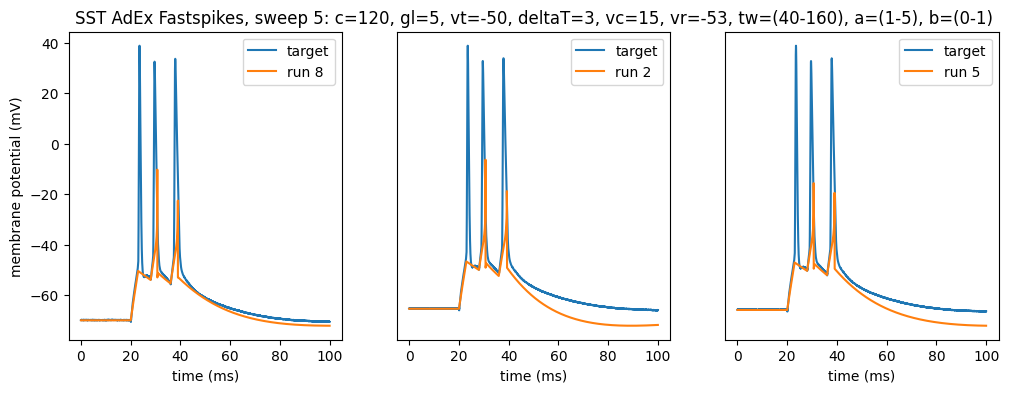

In [156]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(fastspikes_output_sliced[2], adex_sst_fast_9_8[2]*1000, d2_title='run 8')
# text(70, 0, 'run 8')
ylabel('membrane potential (mV)')

subplot(1,3,2)
create_comparison_together(fastspikes_output_sliced[2], adex_sst_fast_9_2[2]*1000, d2_title='run 2')

ax = plt.gca()
ax.yaxis.set_visible(False)
title('SST AdEx Fastspikes, sweep 5: c=120, gl=5, vt=-50, deltaT=3, vc=15, vr=-53, tw=(40-160), a=(1-5), b=(0-1)')

subplot(1,3,3)
create_comparison_together(fastspikes_output_sliced[2], adex_sst_fast_9_5[2]*1000, d2_title='run 5')
ax = plt.gca()
ax.yaxis.set_visible(False)

Text(0.5, 1.0, 'SST AdEx Fastspikes, sweep 5: c=120, gl=5, vt=-50, deltaT=3, vc=15, vr=-53, tw=(40-160), a=(1-5), b=(0-1)')

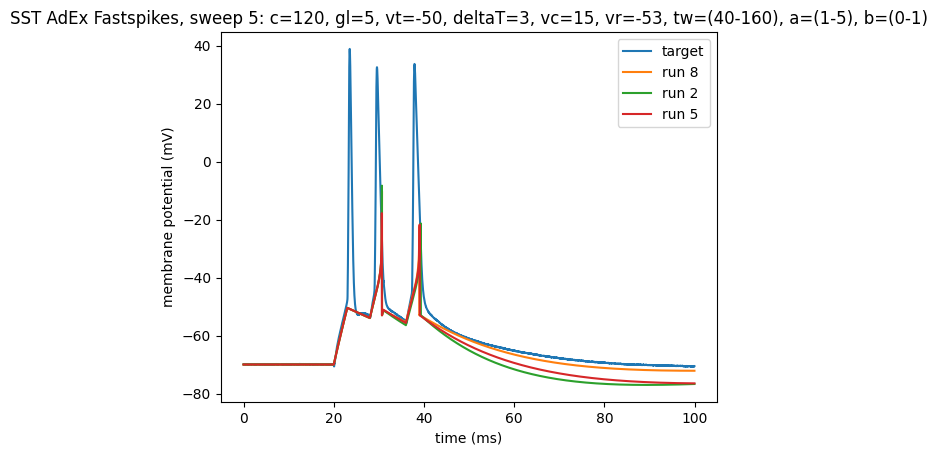

In [157]:
create_comparison_together_four(fastspikes_output_sliced[2], adex_sst_fast_9_8[2]*1000, adex_sst_fast_9_2[2]*1000,\
                                 adex_sst_fast_9_5[2]*1000, d2_title='run 8', d3_title='run 2', d4_title='run 5')
title('SST AdEx Fastspikes, sweep 5: c=120, gl=5, vt=-50, deltaT=3, vc=15, vr=-53, tw=(40-160), a=(1-5), b=(0-1)')

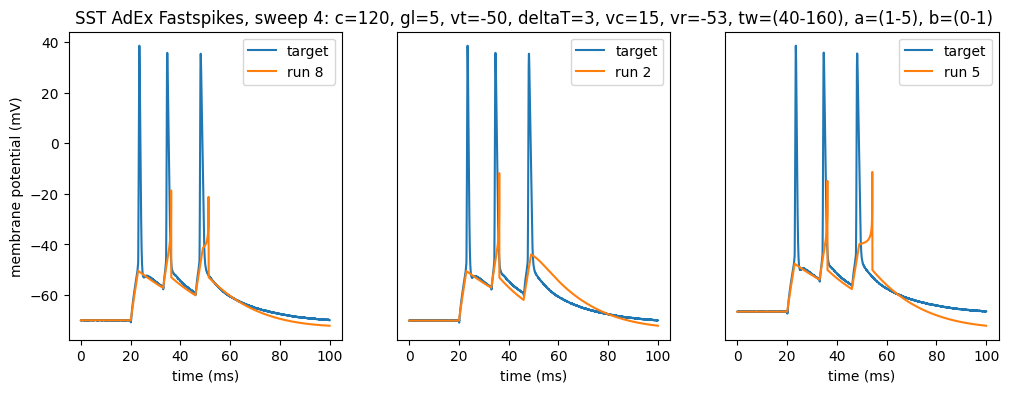

In [158]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(fastspikes_output_sliced[1], adex_sst_fast_9_8[1]*1000, d2_title='run 8')
# text(70, 0, 'run 8')
ylabel('membrane potential (mV)')

subplot(1,3,2)
create_comparison_together(fastspikes_output_sliced[1], adex_sst_fast_9_2[1]*1000, d2_title='run 2')

ax = plt.gca()
ax.yaxis.set_visible(False)
title('SST AdEx Fastspikes, sweep 4: c=120, gl=5, vt=-50, deltaT=3, vc=15, vr=-53, tw=(40-160), a=(1-5), b=(0-1)')

subplot(1,3,3)
create_comparison_together(fastspikes_output_sliced[1], adex_sst_fast_9_5[1]*1000, d2_title='run 5')
ax = plt.gca()
ax.yaxis.set_visible(False)

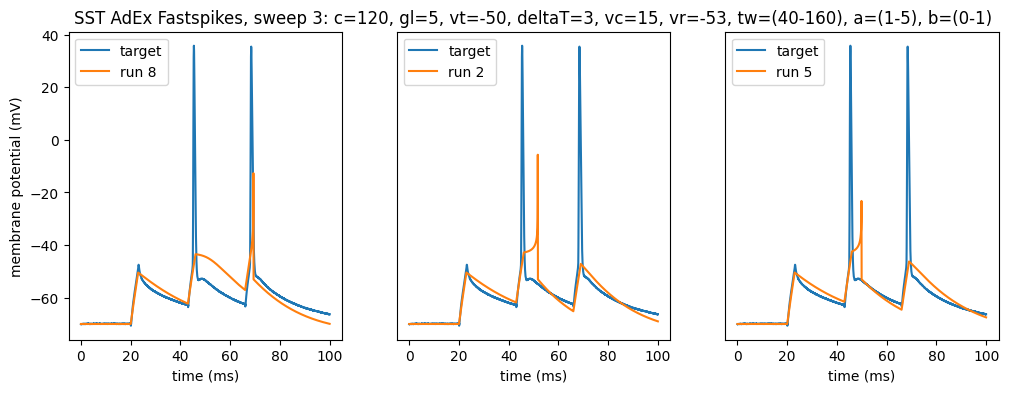

In [ ]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(fastspikes_output_sliced[0], adex_sst_fast_9_8[1]*1000, d2_title='run 8')
# text(70, 0, 'run 8')
ylabel('membrane potential (mV)')

subplot(1,3,2)
create_comparison_together(fastspikes_output_sliced[1], adex_sst_fast_9_2[1]*1000, d2_title='run 2')

ax = plt.gca()
ax.yaxis.set_visible(False)
title('SST AdEx Fastspikes, sweep 4: c=120, gl=5, vt=-50, deltaT=3, vc=15, vr=-53, tw=(40-160), a=(1-5), b=(0-1)')

subplot(1,3,3)
create_comparison_together(fastspikes_output_sliced[1], adex_sst_fast_9_5[1]*1000, d2_title='run 5')
ax = plt.gca()
ax.yaxis.set_visible(False)

***
***

# HH FAST SPIKE GROUP

In [ ]:
hh_sst_fast_0 = run_hh(fastspikes_input_sliced, fastspikes_output_sliced, cm_var=200, vt=-70,\
                           glmin=10, glmax=40, gnamin=1, gnamax=20, gkdmin=0.01, gkdmax=4)

# tt: 14.4s

first fit:
Round 0: Best parameters g_kd=0.70061189 uS, g_na=9.34034363 uS, gl=16.61049786 nS (error: 137.60464467 mV^2)
Round 1: Best parameters g_kd=0.70061189 uS, g_na=9.34034363 uS, gl=16.61049786 nS (error: 137.60464467 mV^2)
Round 2: Best parameters g_kd=0.91973204 uS, g_na=14.38894326 uS, gl=13.00103188 nS (error: 132.82163024 mV^2)
Round 3: Best parameters g_kd=0.83765218 uS, g_na=15.5859168 uS, gl=23.6016458 nS (error: 88.26475218 mV^2)
Round 4: Best parameters g_kd=0.65112429 uS, g_na=8.06049814 uS, gl=13.48220533 nS (error: 84.12533731 mV^2)
Round 5: Best parameters g_kd=0.65112429 uS, g_na=8.06049814 uS, gl=13.48220533 nS (error: 84.12533731 mV^2)
Round 6: Best parameters g_kd=0.60667977 uS, g_na=7.31049914 uS, gl=14.1722732 nS (error: 80.8974156 mV^2)
Round 7: Best parameters g_kd=0.60667977 uS, g_na=7.31049914 uS, gl=14.1722732 nS (error: 80.8974156 mV^2)
Round 8: Best parameters g_kd=0.60667977 uS, g_na=7.31049914 uS, gl=14.1722732 nS (error: 80.8974156 mV^2)
Round 9: Be

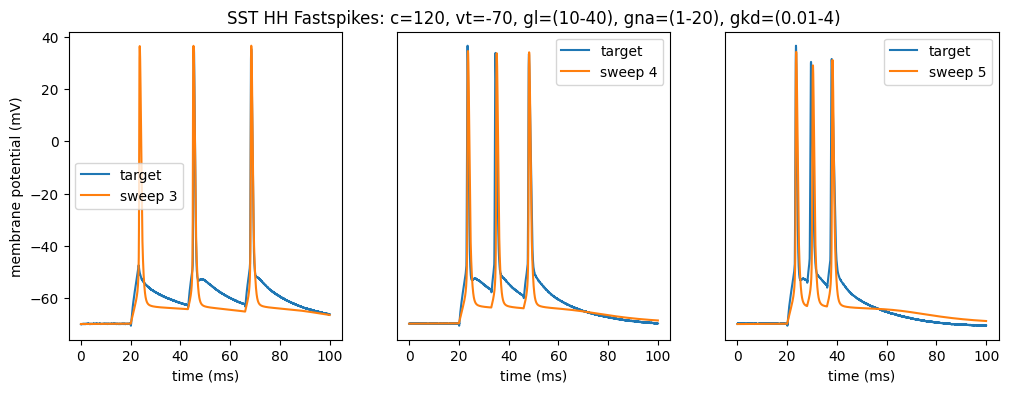

In [188]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(fastspikes_output_sliced[0], hh_sst_fast_0[0]*1000, d2_title='sweep 3')
ylabel('membrane potential (mV)')

subplot(1,3,2)
create_comparison_together(fastspikes_output_sliced[1], hh_sst_fast_0[1]*1000, d2_title='sweep 4')
ax = plt.gca()
ax.yaxis.set_visible(False)
title('SST HH Fastspikes: c=120, vt=-70, gl=(10-40), gna=(1-20), gkd=(0.01-4)')

subplot(1,3,3)
create_comparison_together(fastspikes_output_sliced[2], hh_sst_fast_0[2]*1000, d2_title='sweep 5')
ax = plt.gca()
ax.yaxis.set_visible(False)

# test on same params

In [ ]:
hh_sst_fast_5 = run_hh(fastspikes_input_sliced, fastspikes_output_sliced, cm_var=120, vt=-70, round_num=20, \
                           glmin=0, glmax=20, gnamin=1, gnamax=50, gkdmin=0.01, gkdmax=5)

# tt: 27.6s

first fit:
Round 0: Best parameters g_kd=0.88471445 uS, g_na=14.09348418 uS, gl=5.24136066 nS (error: 222.24708212 mV^2)
Round 1: Best parameters g_kd=0.69751386 uS, g_na=9.85795641 uS, gl=10.75339953 nS (error: 194.77466176 mV^2)
Round 2: Best parameters g_kd=0.4029024 uS, g_na=5.48862471 uS, gl=10.93197045 nS (error: 124.54315238 mV^2)
Round 3: Best parameters g_kd=0.39864945 uS, g_na=6.41850898 uS, gl=17.40597337 nS (error: 123.00694931 mV^2)
Round 4: Best parameters g_kd=0.38917318 uS, g_na=6.07288076 uS, gl=16.7314384 nS (error: 120.4395574 mV^2)
Round 5: Best parameters g_kd=0.35008906 uS, g_na=4.55869585 uS, gl=15.57975847 nS (error: 119.25120669 mV^2)
Round 6: Best parameters g_kd=271.57539429 nS, g_na=3.56740972 uS, gl=18.22486102 nS (error: 101.64236498 mV^2)
Round 7: Best parameters g_kd=282.53137432 nS, g_na=3.39771235 uS, gl=14.67651422 nS (error: 87.61164701 mV^2)
Round 8: Best parameters g_kd=282.53137432 nS, g_na=3.39771235 uS, gl=14.67651422 nS (error: 87.61164701 mV^2

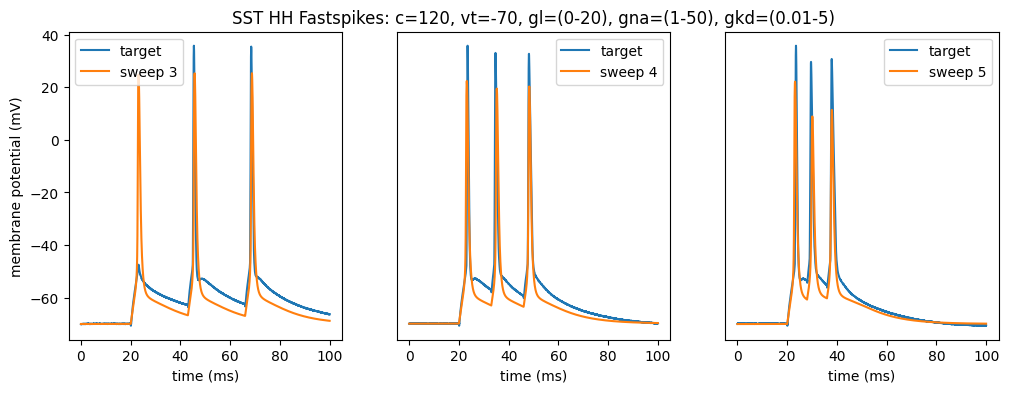

In [189]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(fastspikes_output_sliced[0], hh_sst_fast_5[0]*1000, d2_title='sweep 3')
ylabel('membrane potential (mV)')

subplot(1,3,2)
create_comparison_together(fastspikes_output_sliced[1], hh_sst_fast_5[1]*1000, d2_title='sweep 4')
ax = plt.gca()
ax.yaxis.set_visible(False)
title('SST HH Fastspikes: c=120, vt=-70, gl=(0-20), gna=(1-50), gkd=(0.01-5)')

subplot(1,3,3)
create_comparison_together(fastspikes_output_sliced[2], hh_sst_fast_5[2]*1000, d2_title='sweep 5')
ax = plt.gca()
ax.yaxis.set_visible(False)

In [ ]:
hh_sst_fast_5_1 = run_hh(fastspikes_input_sliced, fastspikes_output_sliced, cm_var=120, vt=-70, round_num=20, \
                           glmin=0, glmax=20, gnamin=1, gnamax=50, gkdmin=0.01, gkdmax=5)

# tt: 28.2s

first fit:
Round 0: Best parameters g_kd=0.86884443 uS, g_na=12.96228321 uS, gl=15.56372312 nS (error: 221.87324956 mV^2)
Round 1: Best parameters g_kd=0.52853467 uS, g_na=8.05633184 uS, gl=13.64629692 nS (error: 157.44292474 mV^2)
Round 2: Best parameters g_kd=0.43820435 uS, g_na=5.06894991 uS, gl=10.78846865 nS (error: 136.33289129 mV^2)
Round 3: Best parameters g_kd=0.32368869 uS, g_na=4.41443269 uS, gl=14.89033479 nS (error: 122.20072355 mV^2)
Round 4: Best parameters g_kd=289.99709238 nS, g_na=3.24634977 uS, gl=13.44061326 nS (error: 89.23302838 mV^2)
Round 5: Best parameters g_kd=292.59934608 nS, g_na=2.59408088 uS, gl=10.05361852 nS (error: 80.95255458 mV^2)
Round 6: Best parameters g_kd=287.48967374 nS, g_na=2.62101522 uS, gl=9.67852897 nS (error: 77.54657948 mV^2)
Round 7: Best parameters g_kd=287.48967374 nS, g_na=2.62101522 uS, gl=9.67852897 nS (error: 77.54657948 mV^2)
Round 8: Best parameters g_kd=267.45323737 nS, g_na=2.48762836 uS, gl=10.88595464 nS (error: 70.585865 mV^

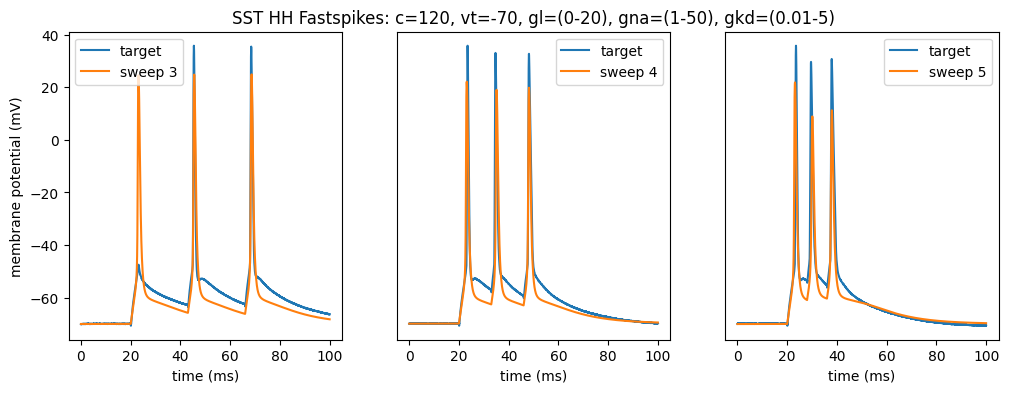

In [207]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(fastspikes_output_sliced[0], hh_sst_fast_5_1[0]*1000, d2_title='sweep 3')
ylabel('membrane potential (mV)')

subplot(1,3,2)
create_comparison_together(fastspikes_output_sliced[1], hh_sst_fast_5_1[1]*1000, d2_title='sweep 4')
ax = plt.gca()
ax.yaxis.set_visible(False)
title('SST HH Fastspikes: c=120, vt=-70, gl=(0-20), gna=(1-50), gkd=(0.01-5)')

subplot(1,3,3)
create_comparison_together(fastspikes_output_sliced[2], hh_sst_fast_5_1[2]*1000, d2_title='sweep 5')
ax = plt.gca()
ax.yaxis.set_visible(False)

In [ ]:
hh_sst_fast_5_2 = run_hh(fastspikes_input_sliced, fastspikes_output_sliced, cm_var=120, vt=-70, round_num=20, \
                           glmin=0, glmax=20, gnamin=1, gnamax=50, gkdmin=0.01, gkdmax=5)

# tt: 27.9s

first fit:
Round 0: Best parameters g_kd=0.93730868 uS, g_na=17.1596914 uS, gl=10.30796066 nS (error: 221.16693754 mV^2)
Round 1: Best parameters g_kd=0.5283545 uS, g_na=7.52734746 uS, gl=9.31204745 nS (error: 157.86605523 mV^2)
Round 2: Best parameters g_kd=0.43309473 uS, g_na=6.89457859 uS, gl=16.12582917 nS (error: 131.93283171 mV^2)
Round 3: Best parameters g_kd=0.37174023 uS, g_na=5.05443781 uS, gl=14.24133513 nS (error: 116.17274005 mV^2)
Round 4: Best parameters g_kd=305.7530426 nS, g_na=4.14893083 uS, gl=17.80733925 nS (error: 110.90396187 mV^2)
Round 5: Best parameters g_kd=0.3490459 uS, g_na=4.97053127 uS, gl=15.38918759 nS (error: 108.00991815 mV^2)
Round 6: Best parameters g_kd=289.2066136 nS, g_na=3.87188279 uS, gl=17.47319362 nS (error: 101.14618958 mV^2)
Round 7: Best parameters g_kd=278.38565532 nS, g_na=3.76062672 uS, gl=18.23328342 nS (error: 100.43489775 mV^2)
Round 8: Best parameters g_kd=278.38565532 nS, g_na=3.76062672 uS, gl=18.23328342 nS (error: 100.43489775 mV

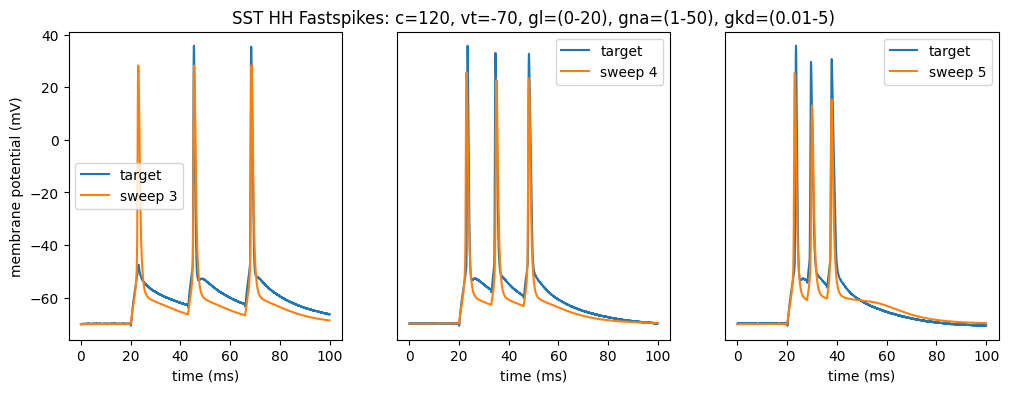

In [208]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(fastspikes_output_sliced[0], hh_sst_fast_5_2[0]*1000, d2_title='sweep 3')
ylabel('membrane potential (mV)')

subplot(1,3,2)
create_comparison_together(fastspikes_output_sliced[1], hh_sst_fast_5_2[1]*1000, d2_title='sweep 4')
ax = plt.gca()
ax.yaxis.set_visible(False)
title('SST HH Fastspikes: c=120, vt=-70, gl=(0-20), gna=(1-50), gkd=(0.01-5)')

subplot(1,3,3)
create_comparison_together(fastspikes_output_sliced[2], hh_sst_fast_5_2[2]*1000, d2_title='sweep 5')
ax = plt.gca()
ax.yaxis.set_visible(False)

In [ ]:
hh_sst_fast_5_3 = run_hh(fastspikes_input_sliced, fastspikes_output_sliced, cm_var=120, vt=-70, round_num=20, \
                           glmin=0, glmax=20, gnamin=1, gnamax=50, gkdmin=0.01, gkdmax=5)

# tt: 28.3s

first fit:
Round 0: Best parameters g_kd=0.93522399 uS, g_na=13.15128724 uS, gl=6.72013738 nS (error: 233.24227149 mV^2)
Round 1: Best parameters g_kd=0.44114772 uS, g_na=7.57436503 uS, gl=17.13906655 nS (error: 130.07024097 mV^2)
Round 2: Best parameters g_kd=0.44114772 uS, g_na=7.57436503 uS, gl=17.13906655 nS (error: 130.07024097 mV^2)
Round 3: Best parameters g_kd=0.44114772 uS, g_na=7.57436503 uS, gl=17.13906655 nS (error: 130.07024097 mV^2)
Round 4: Best parameters g_kd=0.32313167 uS, g_na=4.53517377 uS, gl=16.27964927 nS (error: 102.56589994 mV^2)
Round 5: Best parameters g_kd=270.0893241 nS, g_na=3.45681064 uS, gl=17.827043 nS (error: 101.34750958 mV^2)
Round 6: Best parameters g_kd=291.84273037 nS, g_na=3.67244072 uS, gl=15.23847389 nS (error: 92.24025314 mV^2)
Round 7: Best parameters g_kd=291.84273037 nS, g_na=3.67244072 uS, gl=15.23847389 nS (error: 92.24025314 mV^2)
Round 8: Best parameters g_kd=291.84273037 nS, g_na=3.67244072 uS, gl=15.23847389 nS (error: 92.24025314 mV^

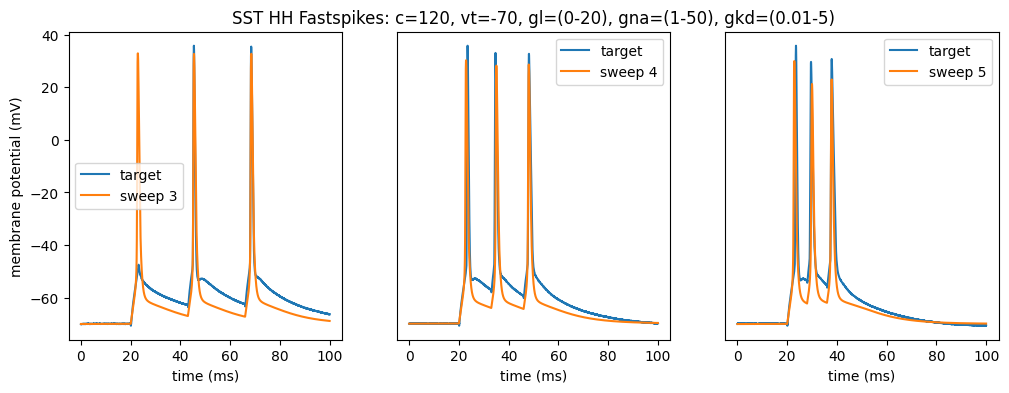

In [209]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(fastspikes_output_sliced[0], hh_sst_fast_5_3[0]*1000, d2_title='sweep 3')
ylabel('membrane potential (mV)')

subplot(1,3,2)
create_comparison_together(fastspikes_output_sliced[1], hh_sst_fast_5_3[1]*1000, d2_title='sweep 4')
ax = plt.gca()
ax.yaxis.set_visible(False)
title('SST HH Fastspikes: c=120, vt=-70, gl=(0-20), gna=(1-50), gkd=(0.01-5)')

subplot(1,3,3)
create_comparison_together(fastspikes_output_sliced[2], hh_sst_fast_5_3[2]*1000, d2_title='sweep 5')
ax = plt.gca()
ax.yaxis.set_visible(False)

In [ ]:
hh_sst_fast_5_4 = run_hh(fastspikes_input_sliced, fastspikes_output_sliced, cm_var=120, vt=-70, round_num=20, \
                           glmin=0, glmax=20, gnamin=1, gnamax=50, gkdmin=0.01, gkdmax=5)

# tt: 28.8s

first fit:
Round 0: Best parameters g_kd=0.86520278 uS, g_na=7.3156095 uS, gl=11.4731678 nS (error: 227.65225648 mV^2)
Round 1: Best parameters g_kd=0.60056269 uS, g_na=9.19088929 uS, gl=16.05595699 nS (error: 177.75012506 mV^2)
Round 2: Best parameters g_kd=0.37965956 uS, g_na=5.8077349 uS, gl=16.78526951 nS (error: 119.22340209 mV^2)
Round 3: Best parameters g_kd=0.35026252 uS, g_na=4.36154 uS, gl=12.89013359 nS (error: 107.61591003 mV^2)
Round 4: Best parameters g_kd=290.51700354 nS, g_na=3.23244472 uS, gl=14.92744254 nS (error: 104.51338445 mV^2)
Round 5: Best parameters g_kd=285.20612185 nS, g_na=3.58253208 uS, gl=16.02593689 nS (error: 95.43483571 mV^2)
Round 6: Best parameters g_kd=273.95148882 nS, g_na=3.37086281 uS, gl=16.01482514 nS (error: 91.58199893 mV^2)
Round 7: Best parameters g_kd=273.95148882 nS, g_na=3.37086281 uS, gl=16.01482514 nS (error: 91.58199893 mV^2)
Round 8: Best parameters g_kd=0.3171845 uS, g_na=2.96073863 uS, gl=9.46300917 nS (error: 90.0892324 mV^2)
Roun

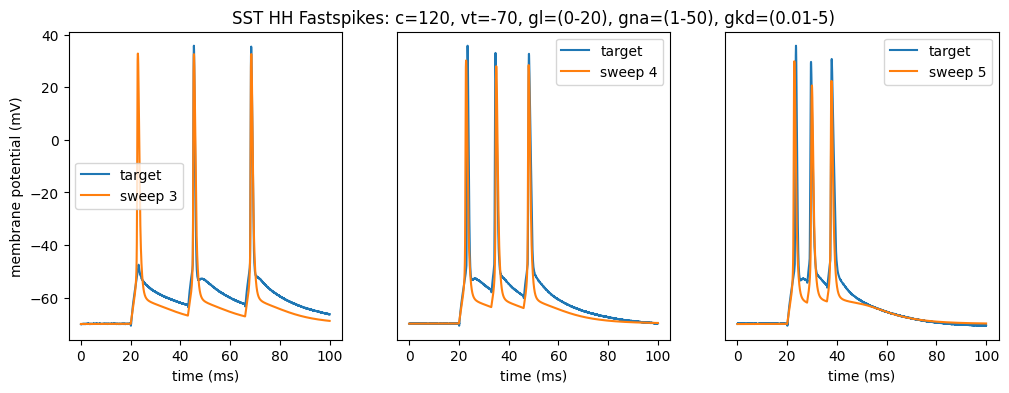

In [210]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(fastspikes_output_sliced[0], hh_sst_fast_5_4[0]*1000, d2_title='sweep 3')
ylabel('membrane potential (mV)')

subplot(1,3,2)
create_comparison_together(fastspikes_output_sliced[1], hh_sst_fast_5_4[1]*1000, d2_title='sweep 4')
ax = plt.gca()
ax.yaxis.set_visible(False)
title('SST HH Fastspikes: c=120, vt=-70, gl=(0-20), gna=(1-50), gkd=(0.01-5)')

subplot(1,3,3)
create_comparison_together(fastspikes_output_sliced[2], hh_sst_fast_5_4[2]*1000, d2_title='sweep 5')
ax = plt.gca()
ax.yaxis.set_visible(False)

In [ ]:
hh_sst_fast_5_5 = run_hh(fastspikes_input_sliced, fastspikes_output_sliced, cm_var=120, vt=-70, round_num=20, \
                           glmin=0, glmax=20, gnamin=1, gnamax=50, gkdmin=0.01, gkdmax=5)

# tt: 28.3s

first fit:
Round 0: Best parameters g_kd=0.86333241 uS, g_na=10.03956189 uS, gl=7.66981536 nS (error: 225.37691604 mV^2)
Round 1: Best parameters g_kd=0.56174726 uS, g_na=9.19746945 uS, gl=12.50689423 nS (error: 161.68028499 mV^2)
Round 2: Best parameters g_kd=0.48765735 uS, g_na=7.47760168 uS, gl=9.8011342 nS (error: 152.24279217 mV^2)
Round 3: Best parameters g_kd=0.4268956 uS, g_na=4.62865136 uS, gl=8.32585184 nS (error: 130.5857543 mV^2)
Round 4: Best parameters g_kd=0.32012431 uS, g_na=4.37966754 uS, gl=15.75668853 nS (error: 100.88410301 mV^2)
Round 5: Best parameters g_kd=0.32012431 uS, g_na=4.37966754 uS, gl=15.75668853 nS (error: 100.88410301 mV^2)
Round 6: Best parameters g_kd=288.07290982 nS, g_na=3.12470153 uS, gl=12.97635157 nS (error: 87.22799983 mV^2)
Round 7: Best parameters g_kd=273.58166825 nS, g_na=2.69850958 uS, gl=12.5953643 nS (error: 83.60213575 mV^2)
Round 8: Best parameters g_kd=273.58166825 nS, g_na=2.69850958 uS, gl=12.5953643 nS (error: 83.60213575 mV^2)
Rou

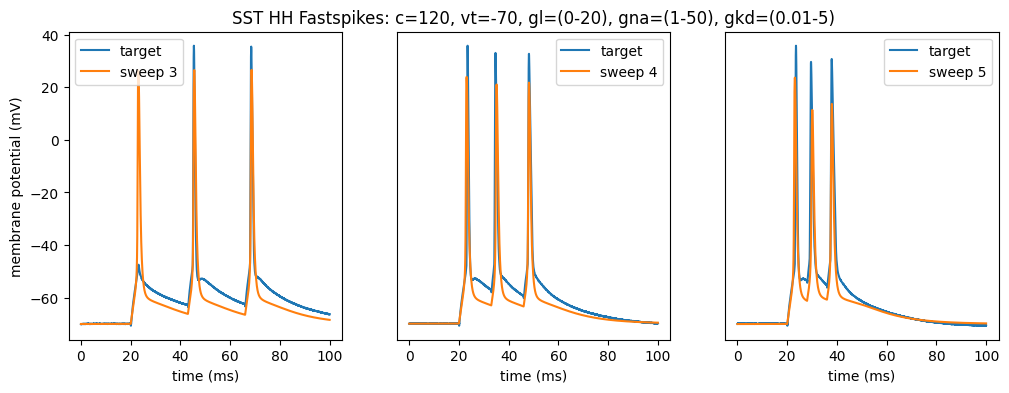

In [211]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(fastspikes_output_sliced[0], hh_sst_fast_5_5[0]*1000, d2_title='sweep 3')
ylabel('membrane potential (mV)')

subplot(1,3,2)
create_comparison_together(fastspikes_output_sliced[1], hh_sst_fast_5_5[1]*1000, d2_title='sweep 4')
ax = plt.gca()
ax.yaxis.set_visible(False)
title('SST HH Fastspikes: c=120, vt=-70, gl=(0-20), gna=(1-50), gkd=(0.01-5)')

subplot(1,3,3)
create_comparison_together(fastspikes_output_sliced[2], hh_sst_fast_5_5[2]*1000, d2_title='sweep 5')
ax = plt.gca()
ax.yaxis.set_visible(False)

In [ ]:
hh_sst_fast_5_6 = run_hh(fastspikes_input_sliced, fastspikes_output_sliced, cm_var=120, vt=-70, round_num=20, \
                           glmin=0, glmax=20, gnamin=1, gnamax=50, gkdmin=0.01, gkdmax=5)

# tt: 28.3s

first fit:
Round 0: Best parameters g_kd=0.69005714 uS, g_na=8.16534439 uS, gl=12.86845435 nS (error: 198.65616499 mV^2)
Round 1: Best parameters g_kd=0.50652602 uS, g_na=5.80376246 uS, gl=7.13449234 nS (error: 154.01668476 mV^2)
Round 2: Best parameters g_kd=0.33969247 uS, g_na=3.55137025 uS, gl=11.7145353 nS (error: 107.47655998 mV^2)
Round 3: Best parameters g_kd=295.87315788 nS, g_na=3.33270064 uS, gl=12.29190273 nS (error: 85.43505558 mV^2)
Round 4: Best parameters g_kd=295.87315788 nS, g_na=3.33270064 uS, gl=12.29190273 nS (error: 85.43505558 mV^2)
Round 5: Best parameters g_kd=295.87315788 nS, g_na=3.33270064 uS, gl=12.29190273 nS (error: 85.43505558 mV^2)
Round 6: Best parameters g_kd=295.87315788 nS, g_na=3.33270064 uS, gl=12.29190273 nS (error: 85.43505558 mV^2)
Round 7: Best parameters g_kd=295.87315788 nS, g_na=3.33270064 uS, gl=12.29190273 nS (error: 85.43505558 mV^2)
Round 8: Best parameters g_kd=295.87315788 nS, g_na=3.33270064 uS, gl=12.29190273 nS (error: 85.43505558 m

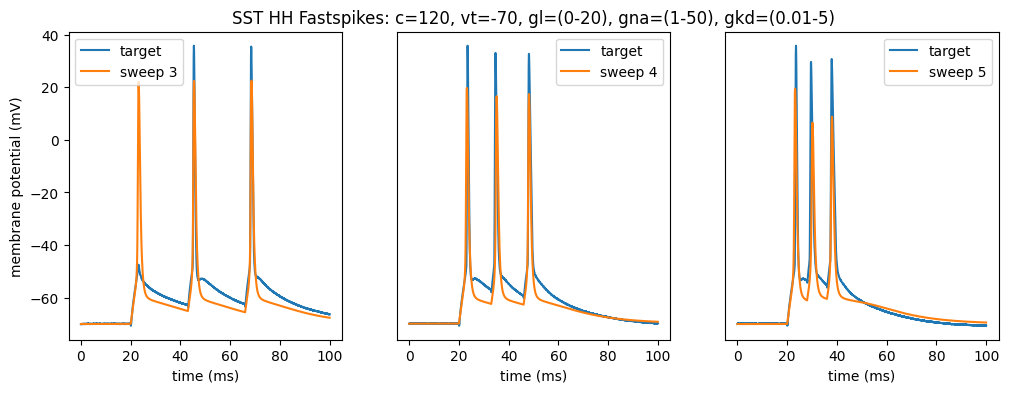

In [212]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(fastspikes_output_sliced[0], hh_sst_fast_5_6[0]*1000, d2_title='sweep 3')
ylabel('membrane potential (mV)')

subplot(1,3,2)
create_comparison_together(fastspikes_output_sliced[1], hh_sst_fast_5_6[1]*1000, d2_title='sweep 4')
ax = plt.gca()
ax.yaxis.set_visible(False)
title('SST HH Fastspikes: c=120, vt=-70, gl=(0-20), gna=(1-50), gkd=(0.01-5)')

subplot(1,3,3)
create_comparison_together(fastspikes_output_sliced[2], hh_sst_fast_5_6[2]*1000, d2_title='sweep 5')
ax = plt.gca()
ax.yaxis.set_visible(False)

In [ ]:
hh_sst_fast_5_7 = run_hh(fastspikes_input_sliced, fastspikes_output_sliced, cm_var=120, vt=-70, round_num=20, \
                           glmin=0, glmax=20, gnamin=1, gnamax=50, gkdmin=0.01, gkdmax=5)

# tt: 29.6s

first fit:
Round 0: Best parameters g_kd=0.76722946 uS, g_na=11.05295354 uS, gl=16.11937282 nS (error: 208.72791641 mV^2)
Round 1: Best parameters g_kd=0.5860699 uS, g_na=10.39184708 uS, gl=13.9044703 nS (error: 163.70947303 mV^2)
Round 2: Best parameters g_kd=0.37566104 uS, g_na=6.06989699 uS, gl=17.09337111 nS (error: 148.19954758 mV^2)
Round 3: Best parameters g_kd=0.32131742 uS, g_na=3.72420185 uS, gl=13.58131476 nS (error: 103.8468837 mV^2)
Round 4: Best parameters g_kd=0.32375239 uS, g_na=4.54717253 uS, gl=16.06350256 nS (error: 101.4698761 mV^2)
Round 5: Best parameters g_kd=0.32375239 uS, g_na=4.54717253 uS, gl=16.06350256 nS (error: 101.4698761 mV^2)
Round 6: Best parameters g_kd=0.32375239 uS, g_na=4.54717253 uS, gl=16.06350256 nS (error: 101.4698761 mV^2)
Round 7: Best parameters g_kd=291.0239973 nS, g_na=2.93388217 uS, gl=12.54336065 nS (error: 91.76355707 mV^2)
Round 8: Best parameters g_kd=291.0239973 nS, g_na=2.93388217 uS, gl=12.54336065 nS (error: 91.76355707 mV^2)
Rou

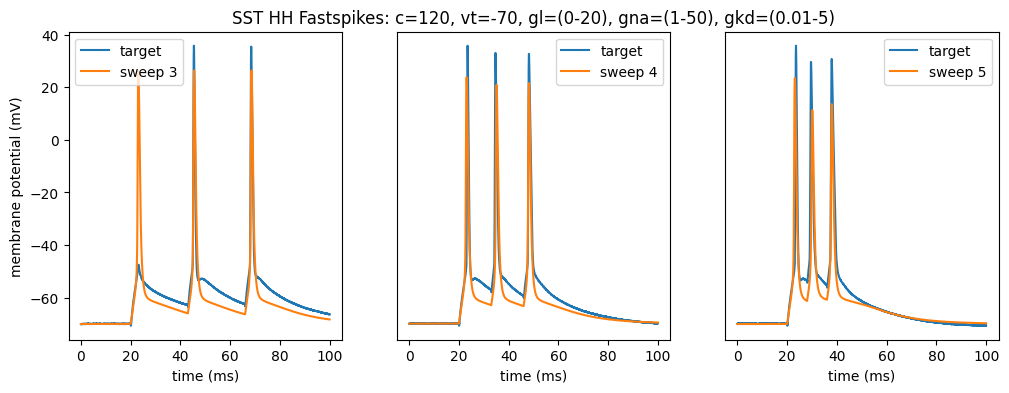

In [213]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(fastspikes_output_sliced[0], hh_sst_fast_5_7[0]*1000, d2_title='sweep 3')
ylabel('membrane potential (mV)')

subplot(1,3,2)
create_comparison_together(fastspikes_output_sliced[1], hh_sst_fast_5_7[1]*1000, d2_title='sweep 4')
ax = plt.gca()
ax.yaxis.set_visible(False)
title('SST HH Fastspikes: c=120, vt=-70, gl=(0-20), gna=(1-50), gkd=(0.01-5)')

subplot(1,3,3)
create_comparison_together(fastspikes_output_sliced[2], hh_sst_fast_5_7[2]*1000, d2_title='sweep 5')
ax = plt.gca()
ax.yaxis.set_visible(False)

In [ ]:
hh_sst_fast_5_8 = run_hh(fastspikes_input_sliced, fastspikes_output_sliced, cm_var=120, vt=-70, round_num=20, \
                           glmin=0, glmax=20, gnamin=1, gnamax=50, gkdmin=0.01, gkdmax=5)

# tt: 29.5s

first fit:
Round 0: Best parameters g_kd=0.95511698 uS, g_na=14.3811384 uS, gl=12.12782575 nS (error: 233.20992764 mV^2)
Round 1: Best parameters g_kd=0.5873135 uS, g_na=9.57818872 uS, gl=11.00705128 nS (error: 167.93223711 mV^2)
Round 2: Best parameters g_kd=0.4744996 uS, g_na=7.96472175 uS, gl=13.88983331 nS (error: 139.587804 mV^2)
Round 3: Best parameters g_kd=0.43209158 uS, g_na=4.7889778 uS, gl=10.17210852 nS (error: 133.96166618 mV^2)
Round 4: Best parameters g_kd=0.32832349 uS, g_na=4.38628751 uS, gl=14.61707181 nS (error: 100.84822971 mV^2)
Round 5: Best parameters g_kd=295.24880537 nS, g_na=3.47646496 uS, gl=14.8583027 nS (error: 99.18141595 mV^2)
Round 6: Best parameters g_kd=295.24880537 nS, g_na=3.47646496 uS, gl=14.8583027 nS (error: 99.18141595 mV^2)
Round 7: Best parameters g_kd=283.59795601 nS, g_na=3.12079065 uS, gl=13.63517765 nS (error: 88.87560444 mV^2)
Round 8: Best parameters g_kd=306.09472296 nS, g_na=3.14631699 uS, gl=11.06058006 nS (error: 88.26574723 mV^2)
Ro

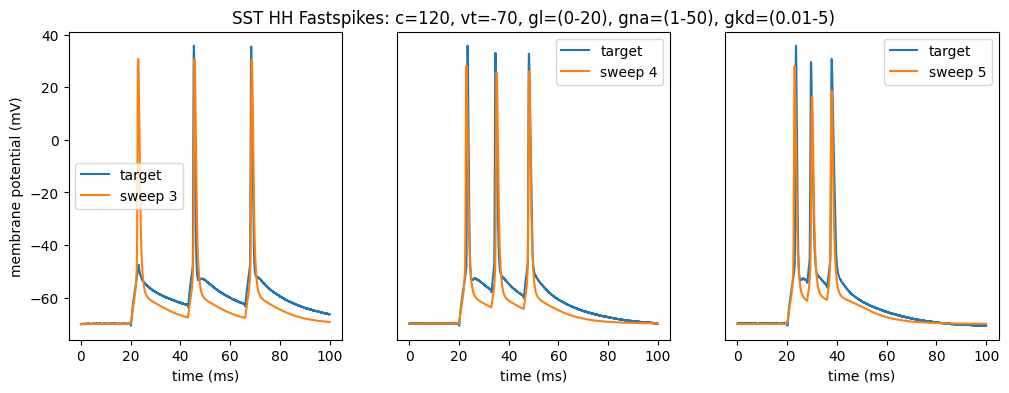

In [214]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(fastspikes_output_sliced[0], hh_sst_fast_5_8[0]*1000, d2_title='sweep 3')
ylabel('membrane potential (mV)')

subplot(1,3,2)
create_comparison_together(fastspikes_output_sliced[1], hh_sst_fast_5_8[1]*1000, d2_title='sweep 4')
ax = plt.gca()
ax.yaxis.set_visible(False)
title('SST HH Fastspikes: c=120, vt=-70, gl=(0-20), gna=(1-50), gkd=(0.01-5)')

subplot(1,3,3)
create_comparison_together(fastspikes_output_sliced[2], hh_sst_fast_5_8[2]*1000, d2_title='sweep 5')
ax = plt.gca()
ax.yaxis.set_visible(False)

In [ ]:
hh_sst_fast_5_9 = run_hh(fastspikes_input_sliced, fastspikes_output_sliced, cm_var=120, vt=-70, round_num=20, \
                           glmin=0, glmax=20, gnamin=1, gnamax=50, gkdmin=0.01, gkdmax=5)

# tt: 30s

first fit:
Round 0: Best parameters g_kd=0.74765955 uS, g_na=12.80441449 uS, gl=10.0003779 nS (error: 197.03872668 mV^2)
Round 1: Best parameters g_kd=0.53556523 uS, g_na=6.70603646 uS, gl=15.48400401 nS (error: 172.53308683 mV^2)
Round 2: Best parameters g_kd=0.42661344 uS, g_na=5.8455544 uS, gl=13.23066363 nS (error: 132.12566094 mV^2)
Round 3: Best parameters g_kd=0.33983197 uS, g_na=3.62527697 uS, gl=12.20427692 nS (error: 109.49038585 mV^2)
Round 4: Best parameters g_kd=0.33981527 uS, g_na=4.43624104 uS, gl=14.5541198 nS (error: 107.68987213 mV^2)
Round 5: Best parameters g_kd=0.33981527 uS, g_na=4.43624104 uS, gl=14.5541198 nS (error: 107.68987213 mV^2)
Round 6: Best parameters g_kd=260.95954598 nS, g_na=3.17854659 uS, gl=16.94211346 nS (error: 94.68464463 mV^2)
Round 7: Best parameters g_kd=291.92734935 nS, g_na=3.05999226 uS, gl=12.76255145 nS (error: 90.7368654 mV^2)
Round 8: Best parameters g_kd=295.47475278 nS, g_na=2.49203074 uS, gl=8.66533145 nS (error: 79.173414 mV^2)
Rou

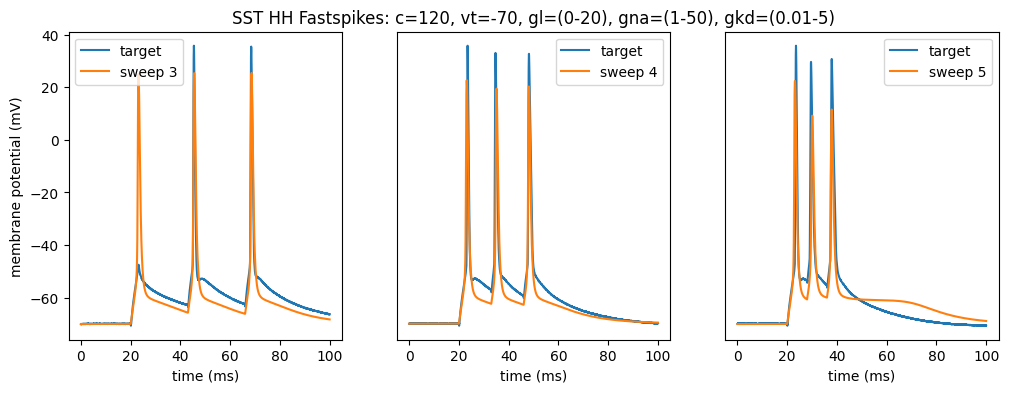

In [215]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(fastspikes_output_sliced[0], hh_sst_fast_5_9[0]*1000, d2_title='sweep 3')
ylabel('membrane potential (mV)')

subplot(1,3,2)
create_comparison_together(fastspikes_output_sliced[1], hh_sst_fast_5_9[1]*1000, d2_title='sweep 4')
ax = plt.gca()
ax.yaxis.set_visible(False)
title('SST HH Fastspikes: c=120, vt=-70, gl=(0-20), gna=(1-50), gkd=(0.01-5)')

subplot(1,3,3)
create_comparison_together(fastspikes_output_sliced[2], hh_sst_fast_5_9[2]*1000, d2_title='sweep 5')
ax = plt.gca()
ax.yaxis.set_visible(False)

In [ ]:
hh_sst_fast_5_9_30rounds = run_hh(fastspikes_input_sliced, fastspikes_output_sliced, cm_var=120, vt=-70, round_num=30, \
                           glmin=0, glmax=20, gnamin=1, gnamax=50, gkdmin=0.01, gkdmax=5)

# 41s

first fit:
Round 0: Best parameters g_kd=0.74880912 uS, g_na=10.14901769 uS, gl=9.27151639 nS (error: 204.58705783 mV^2)
Round 1: Best parameters g_kd=0.52634861 uS, g_na=8.22133858 uS, gl=10.1210915 nS (error: 157.04250826 mV^2)
Round 2: Best parameters g_kd=0.35408725 uS, g_na=5.11167983 uS, gl=14.23257665 nS (error: 127.65264052 mV^2)
Round 3: Best parameters g_kd=0.36395997 uS, g_na=4.66629207 uS, gl=13.33598044 nS (error: 113.38722095 mV^2)
Round 4: Best parameters g_kd=0.36395997 uS, g_na=4.66629207 uS, gl=13.33598044 nS (error: 113.38722095 mV^2)
Round 5: Best parameters g_kd=298.29847663 nS, g_na=3.87827801 uS, gl=16.27749978 nS (error: 100.07278915 mV^2)
Round 6: Best parameters g_kd=253.08785955 nS, g_na=2.65937048 uS, gl=15.14506266 nS (error: 91.43422733 mV^2)
Round 7: Best parameters g_kd=253.08785955 nS, g_na=2.65937048 uS, gl=15.14506266 nS (error: 91.43422733 mV^2)
Round 8: Best parameters g_kd=260.57037019 nS, g_na=2.66373741 uS, gl=13.29800424 nS (error: 78.61850249 m

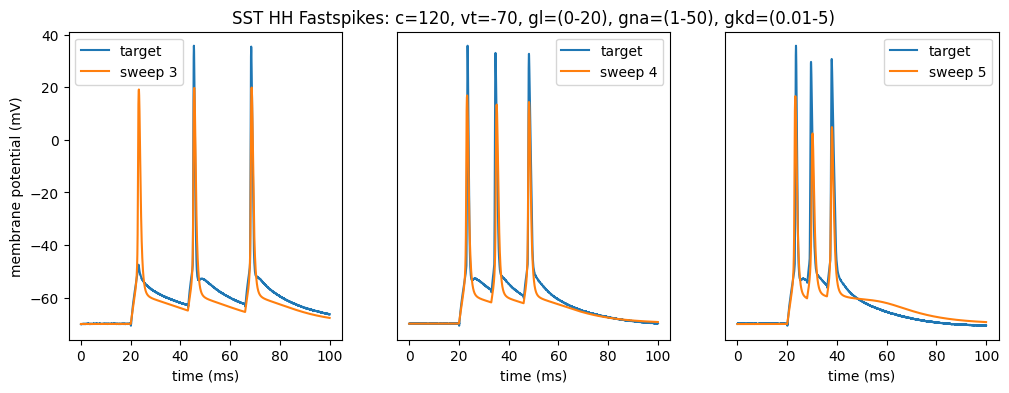

In [216]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(fastspikes_output_sliced[0], hh_sst_fast_5_9_30rounds[0]*1000, d2_title='sweep 3')
ylabel('membrane potential (mV)')

subplot(1,3,2)
create_comparison_together(fastspikes_output_sliced[1], hh_sst_fast_5_9_30rounds[1]*1000, d2_title='sweep 4')
ax = plt.gca()
ax.yaxis.set_visible(False)
title('SST HH Fastspikes: c=120, vt=-70, gl=(0-20), gna=(1-50), gkd=(0.01-5)')

subplot(1,3,3)
create_comparison_together(fastspikes_output_sliced[2], hh_sst_fast_5_9_30rounds[2]*1000, d2_title='sweep 5')
ax = plt.gca()
ax.yaxis.set_visible(False)

In [ ]:
hh_sst_fast_5_9_30rounds_1 = run_hh(fastspikes_input_sliced, fastspikes_output_sliced, cm_var=120, vt=-70, round_num=30, \
                           glmin=0, glmax=20, gnamin=1, gnamax=50, gkdmin=0.01, gkdmax=5)

# tt: 42.4s

first fit:
Round 0: Best parameters g_kd=0.72535583 uS, g_na=9.04738538 uS, gl=10.35638687 nS (error: 202.2273896 mV^2)
Round 1: Best parameters g_kd=0.46774228 uS, g_na=4.94477906 uS, gl=10.78507471 nS (error: 148.46602882 mV^2)
Round 2: Best parameters g_kd=308.18640736 nS, g_na=3.22551018 uS, gl=10.48099653 nS (error: 88.47155763 mV^2)
Round 3: Best parameters g_kd=308.18640736 nS, g_na=3.22551018 uS, gl=10.48099653 nS (error: 88.47155763 mV^2)
Round 4: Best parameters g_kd=253.36690854 nS, g_na=2.45692159 uS, gl=12.69603838 nS (error: 72.68038718 mV^2)
Round 5: Best parameters g_kd=253.36690854 nS, g_na=2.45692159 uS, gl=12.69603838 nS (error: 72.68038718 mV^2)
Round 6: Best parameters g_kd=250.5703994 nS, g_na=2.10630781 uS, gl=11.30958869 nS (error: 68.10830407 mV^2)
Round 7: Best parameters g_kd=241.00316726 nS, g_na=2.0423698 uS, gl=11.62079723 nS (error: 64.08758431 mV^2)
Round 8: Best parameters g_kd=241.00316726 nS, g_na=2.0423698 uS, gl=11.62079723 nS (error: 64.08758431 mV

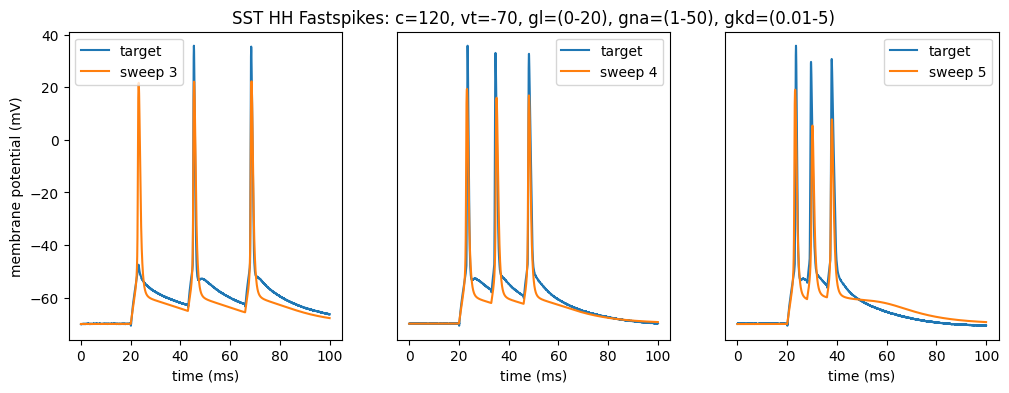

In [217]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(fastspikes_output_sliced[0], hh_sst_fast_5_9_30rounds_1[0]*1000, d2_title='sweep 3')
ylabel('membrane potential (mV)')

subplot(1,3,2)
create_comparison_together(fastspikes_output_sliced[1], hh_sst_fast_5_9_30rounds_1[1]*1000, d2_title='sweep 4')
ax = plt.gca()
ax.yaxis.set_visible(False)
title('SST HH Fastspikes: c=120, vt=-70, gl=(0-20), gna=(1-50), gkd=(0.01-5)')

subplot(1,3,3)
create_comparison_together(fastspikes_output_sliced[2], hh_sst_fast_5_9_30rounds_1[2]*1000, d2_title='sweep 5')
ax = plt.gca()
ax.yaxis.set_visible(False)

In [ ]:
hh_sst_fast_5_9_30rounds_2 = run_hh(fastspikes_input_sliced, fastspikes_output_sliced, cm_var=120, vt=-70, round_num=30, \
                           glmin=0, glmax=20, gnamin=1, gnamax=50, gkdmin=0.01, gkdmax=5)

# tt: 43.6s

first fit:
Round 0: Best parameters g_kd=0.85061451 uS, g_na=13.67099909 uS, gl=17.05340844 nS (error: 217.37447075 mV^2)
Round 1: Best parameters g_kd=0.50220147 uS, g_na=8.22752512 uS, gl=15.9486816 nS (error: 149.99493603 mV^2)
Round 2: Best parameters g_kd=0.3366355 uS, g_na=4.40288874 uS, gl=15.9486816 nS (error: 115.64936702 mV^2)
Round 3: Best parameters g_kd=310.51275658 nS, g_na=4.50118171 uS, gl=18.74537539 nS (error: 109.51219528 mV^2)
Round 4: Best parameters g_kd=295.08431251 nS, g_na=4.17650198 uS, gl=18.43521968 nS (error: 103.0031231 mV^2)
Round 5: Best parameters g_kd=295.08431251 nS, g_na=4.17650198 uS, gl=18.43521968 nS (error: 103.0031231 mV^2)
Round 6: Best parameters g_kd=251.83385691 nS, g_na=3.10411247 uS, gl=17.97974882 nS (error: 98.27575688 mV^2)
Round 7: Best parameters g_kd=251.83385691 nS, g_na=3.10411247 uS, gl=17.97974882 nS (error: 98.27575688 mV^2)
Round 8: Best parameters g_kd=251.83385691 nS, g_na=3.10411247 uS, gl=17.97974882 nS (error: 98.27575688 

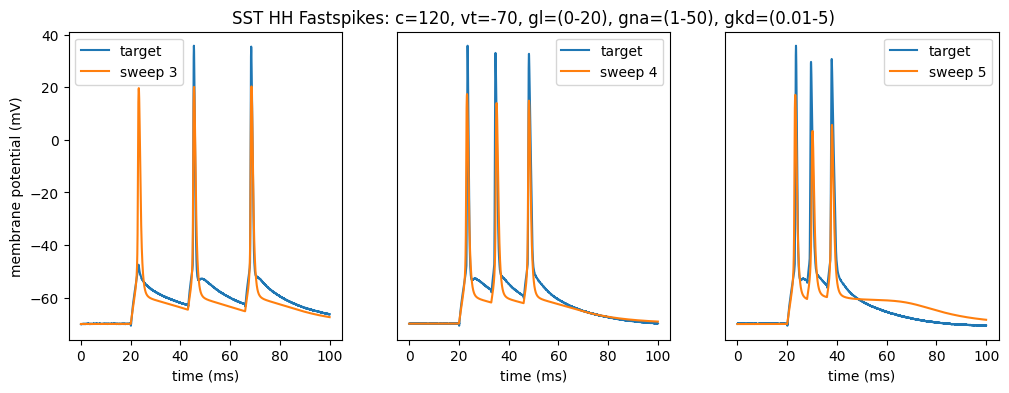

In [218]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(fastspikes_output_sliced[0], hh_sst_fast_5_9_30rounds_2[0]*1000, d2_title='sweep 3')
ylabel('membrane potential (mV)')

subplot(1,3,2)
create_comparison_together(fastspikes_output_sliced[1], hh_sst_fast_5_9_30rounds_2[1]*1000, d2_title='sweep 4')
ax = plt.gca()
ax.yaxis.set_visible(False)
title('SST HH Fastspikes: c=120, vt=-70, gl=(0-20), gna=(1-50), gkd=(0.01-5)')

subplot(1,3,3)
create_comparison_together(fastspikes_output_sliced[2], hh_sst_fast_5_9_30rounds_2[2]*1000, d2_title='sweep 5')
ax = plt.gca()
ax.yaxis.set_visible(False)

In [ ]:
hh_sst_fast_5_9_30rounds_3 = run_hh(fastspikes_input_sliced, fastspikes_output_sliced, cm_var=120, vt=-70, round_num=30, \
                           glmin=0, glmax=20, gnamin=1, gnamax=50, gkdmin=0.01, gkdmax=5)

# tt: 43.4s

first fit:
Round 0: Best parameters g_kd=0.73167456 uS, g_na=9.28191923 uS, gl=12.20579562 nS (error: 204.00451255 mV^2)
Round 1: Best parameters g_kd=0.52748176 uS, g_na=5.25393065 uS, gl=11.06073582 nS (error: 167.07290153 mV^2)
Round 2: Best parameters g_kd=314.11850039 nS, g_na=3.32218209 uS, gl=11.80805724 nS (error: 94.90843647 mV^2)
Round 3: Best parameters g_kd=309.38159765 nS, g_na=2.74928832 uS, gl=9.14912891 nS (error: 85.95889619 mV^2)
Round 4: Best parameters g_kd=309.38159765 nS, g_na=2.74928832 uS, gl=9.14912891 nS (error: 85.95889619 mV^2)
Round 5: Best parameters g_kd=227.20839798 nS, g_na=2.04123049 uS, gl=12.83083386 nS (error: 82.20590412 mV^2)
Round 6: Best parameters g_kd=269.84134818 nS, g_na=2.23686947 uS, gl=9.59973236 nS (error: 68.21195205 mV^2)
Round 7: Best parameters g_kd=269.84134818 nS, g_na=2.23686947 uS, gl=9.59973236 nS (error: 68.21195205 mV^2)
Round 8: Best parameters g_kd=269.84134818 nS, g_na=2.23686947 uS, gl=9.59973236 nS (error: 68.21195205 mV^

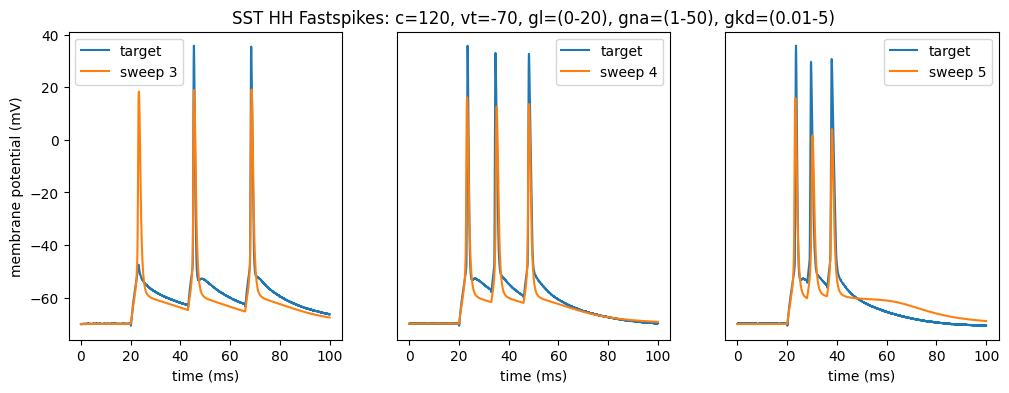

In [219]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(fastspikes_output_sliced[0], hh_sst_fast_5_9_30rounds_3[0]*1000, d2_title='sweep 3')
ylabel('membrane potential (mV)')

subplot(1,3,2)
create_comparison_together(fastspikes_output_sliced[1], hh_sst_fast_5_9_30rounds_3[1]*1000, d2_title='sweep 4')
ax = plt.gca()
ax.yaxis.set_visible(False)
title('SST HH Fastspikes: c=120, vt=-70, gl=(0-20), gna=(1-50), gkd=(0.01-5)')

subplot(1,3,3)
create_comparison_together(fastspikes_output_sliced[2], hh_sst_fast_5_9_30rounds_3[2]*1000, d2_title='sweep 5')
ax = plt.gca()
ax.yaxis.set_visible(False)

In [ ]:
hh_sst_fast_5_9_30rounds_4 = run_hh(fastspikes_input_sliced, fastspikes_output_sliced, cm_var=120, vt=-70, round_num=30, \
                           glmin=0, glmax=20, gnamin=1, gnamax=50, gkdmin=0.01, gkdmax=5)

# tt: 43.1s

first fit:
Round 0: Best parameters g_kd=1.08307037 uS, g_na=21.40868607 uS, gl=13.01902078 nS (error: 229.8903206 mV^2)
Round 1: Best parameters g_kd=0.56931354 uS, g_na=10.08859333 uS, gl=17.12812097 nS (error: 162.80332224 mV^2)
Round 2: Best parameters g_kd=0.50384364 uS, g_na=9.23063162 uS, gl=16.5453575 nS (error: 157.24183406 mV^2)
Round 3: Best parameters g_kd=0.44221557 uS, g_na=7.54932528 uS, gl=18.1005906 nS (error: 133.39029565 mV^2)
Round 4: Best parameters g_kd=0.44221557 uS, g_na=7.54932528 uS, gl=18.1005906 nS (error: 133.39029565 mV^2)
Round 5: Best parameters g_kd=0.317881 uS, g_na=4.5138981 uS, gl=18.92204877 nS (error: 118.709983 mV^2)
Round 6: Best parameters g_kd=276.59892806 nS, g_na=3.68442413 uS, gl=18.9665707 nS (error: 109.65048525 mV^2)
Round 7: Best parameters g_kd=0.33664234 uS, g_na=4.44232482 uS, gl=13.91155514 nS (error: 102.43794771 mV^2)
Round 8: Best parameters g_kd=0.33664234 uS, g_na=4.44232482 uS, gl=13.91155514 nS (error: 102.43794771 mV^2)
Round

In [ ]:
hh_sst_fast_5_9_30rounds_5 = run_hh(fastspikes_input_sliced, fastspikes_output_sliced, cm_var=120, vt=-70, round_num=30, \
                           glmin=0, glmax=20, gnamin=1, gnamax=50, gkdmin=0.01, gkdmax=5)

# tt: 42.2s

first fit:
Round 0: Best parameters g_kd=0.75774978 uS, g_na=9.53484422 uS, gl=8.20992517 nS (error: 207.13503156 mV^2)
Round 1: Best parameters g_kd=0.48268548 uS, g_na=5.25035242 uS, gl=8.72313929 nS (error: 147.31250477 mV^2)
Round 2: Best parameters g_kd=0.45545651 uS, g_na=4.90325546 uS, gl=7.75813472 nS (error: 139.251777 mV^2)
Round 3: Best parameters g_kd=0.35275389 uS, g_na=3.96191371 uS, gl=12.97226758 nS (error: 116.53093244 mV^2)
Round 4: Best parameters g_kd=0.34733235 uS, g_na=3.74699725 uS, gl=12.03044915 nS (error: 110.92307433 mV^2)
Round 5: Best parameters g_kd=261.92505679 nS, g_na=3.16386851 uS, gl=17.56911916 nS (error: 103.82656821 mV^2)
Round 6: Best parameters g_kd=285.90374803 nS, g_na=2.92134927 uS, gl=11.38569004 nS (error: 79.84016553 mV^2)
Round 7: Best parameters g_kd=285.90374803 nS, g_na=2.92134927 uS, gl=11.38569004 nS (error: 79.84016553 mV^2)
Round 8: Best parameters g_kd=285.90374803 nS, g_na=2.92134927 uS, gl=11.38569004 nS (error: 79.84016553 mV^2)

In [ ]:
hh_sst_fast_5_9_30rounds_6 = run_hh(fastspikes_input_sliced, fastspikes_output_sliced, cm_var=120, vt=-70, round_num=30, \
                           glmin=0, glmax=20, gnamin=1, gnamax=50, gkdmin=0.01, gkdmax=5)

# tt: 41.1s

first fit:
Round 0: Best parameters g_kd=0.68405294 uS, g_na=12.55681355 uS, gl=15.97856705 nS (error: 183.01270677 mV^2)
Round 1: Best parameters g_kd=0.37217432 uS, g_na=5.34576679 uS, gl=17.67234101 nS (error: 129.61870238 mV^2)
Round 2: Best parameters g_kd=0.37333185 uS, g_na=6.03120028 uS, gl=18.17357604 nS (error: 115.96349496 mV^2)
Round 3: Best parameters g_kd=304.41435685 nS, g_na=4.06296974 uS, gl=16.72001981 nS (error: 103.24540194 mV^2)
Round 4: Best parameters g_kd=276.17065209 nS, g_na=3.65129854 uS, gl=17.99512087 nS (error: 100.8656244 mV^2)
Round 5: Best parameters g_kd=288.48781501 nS, g_na=3.88689628 uS, gl=17.33052309 nS (error: 98.27919135 mV^2)
Round 6: Best parameters g_kd=288.48781501 nS, g_na=3.88689628 uS, gl=17.33052309 nS (error: 98.27919135 mV^2)
Round 7: Best parameters g_kd=277.18321716 nS, g_na=3.34193657 uS, gl=16.05922138 nS (error: 97.11638203 mV^2)
Round 8: Best parameters g_kd=277.18321716 nS, g_na=3.44845415 uS, gl=16.05922138 nS (error: 92.372509

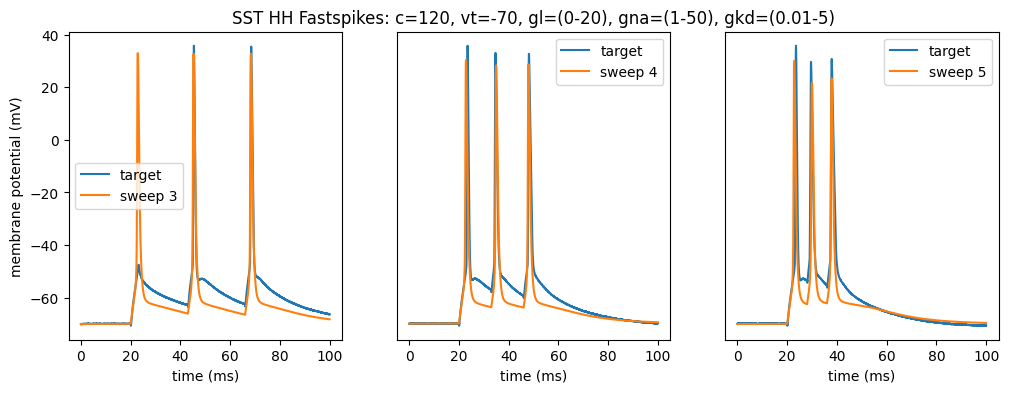

In [220]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(fastspikes_output_sliced[0], hh_sst_fast_5_9_30rounds_6[0]*1000, d2_title='sweep 3')
ylabel('membrane potential (mV)')

subplot(1,3,2)
create_comparison_together(fastspikes_output_sliced[1], hh_sst_fast_5_9_30rounds_6[1]*1000, d2_title='sweep 4')
ax = plt.gca()
ax.yaxis.set_visible(False)
title('SST HH Fastspikes: c=120, vt=-70, gl=(0-20), gna=(1-50), gkd=(0.01-5)')

subplot(1,3,3)
create_comparison_together(fastspikes_output_sliced[2], hh_sst_fast_5_9_30rounds_6[2]*1000, d2_title='sweep 5')
ax = plt.gca()
ax.yaxis.set_visible(False)

In [ ]:
hh_sst_fast_5_9_30rounds_7 = run_hh(fastspikes_input_sliced, fastspikes_output_sliced, cm_var=120, vt=-70, round_num=30, \
                           glmin=0, glmax=20, gnamin=1, gnamax=50, gkdmin=0.01, gkdmax=5)

# tt: 39.8s

first fit:
Round 0: Best parameters g_kd=0.81949507 uS, g_na=8.73503619 uS, gl=13.49237681 nS (error: 220.0989678 mV^2)
Round 1: Best parameters g_kd=0.64788043 uS, g_na=12.47160698 uS, gl=17.15007804 nS (error: 171.82208742 mV^2)
Round 2: Best parameters g_kd=0.4075665 uS, g_na=4.86326736 uS, gl=14.64747762 nS (error: 141.44985462 mV^2)
Round 3: Best parameters g_kd=0.34054324 uS, g_na=4.50053451 uS, gl=14.15749199 nS (error: 104.93810357 mV^2)
Round 4: Best parameters g_kd=285.06385068 nS, g_na=3.52712644 uS, gl=15.05432075 nS (error: 88.7952761 mV^2)
Round 5: Best parameters g_kd=285.06385068 nS, g_na=3.52712644 uS, gl=15.05432075 nS (error: 88.7952761 mV^2)
Round 6: Best parameters g_kd=289.80346241 nS, g_na=2.82228321 uS, gl=11.94784259 nS (error: 88.46943092 mV^2)
Round 7: Best parameters g_kd=289.80346241 nS, g_na=2.82228321 uS, gl=11.94784259 nS (error: 88.46943092 mV^2)
Round 8: Best parameters g_kd=296.73603125 nS, g_na=2.51708511 uS, gl=8.6935672 nS (error: 79.79353767 mV^2)

In [ ]:
hh_sst_fast_5_9_30rounds_8 = run_hh(fastspikes_input_sliced, fastspikes_output_sliced, cm_var=120, vt=-70, round_num=30, \
                           glmin=0, glmax=20, gnamin=1, gnamax=50, gkdmin=0.01, gkdmax=5)

# tt: 44s

first fit:
Round 0: Best parameters g_kd=1.0813621 uS, g_na=22.00457073 uS, gl=14.82891063 nS (error: 224.34884816 mV^2)
Round 1: Best parameters g_kd=0.79419586 uS, g_na=10.44492861 uS, gl=5.91101702 nS (error: 212.5971563 mV^2)
Round 2: Best parameters g_kd=0.51664465 uS, g_na=6.19094724 uS, gl=5.22362531 nS (error: 166.36026711 mV^2)
Round 3: Best parameters g_kd=0.45385786 uS, g_na=4.54953634 uS, gl=5.91101702 nS (error: 141.85451228 mV^2)
Round 4: Best parameters g_kd=0.33194071 uS, g_na=3.95891673 uS, gl=12.65276641 nS (error: 100.98399566 mV^2)
Round 5: Best parameters g_kd=0.33194071 uS, g_na=3.95891673 uS, gl=12.65276641 nS (error: 100.98399566 mV^2)
Round 6: Best parameters g_kd=251.55788689 nS, g_na=2.37146732 uS, gl=11.9682079 nS (error: 90.95272926 mV^2)
Round 7: Best parameters g_kd=266.81708739 nS, g_na=2.31624056 uS, gl=11.02493368 nS (error: 73.93072953 mV^2)
Round 8: Best parameters g_kd=271.62913084 nS, g_na=2.23784355 uS, gl=9.10200443 nS (error: 69.81077295 mV^2)
R

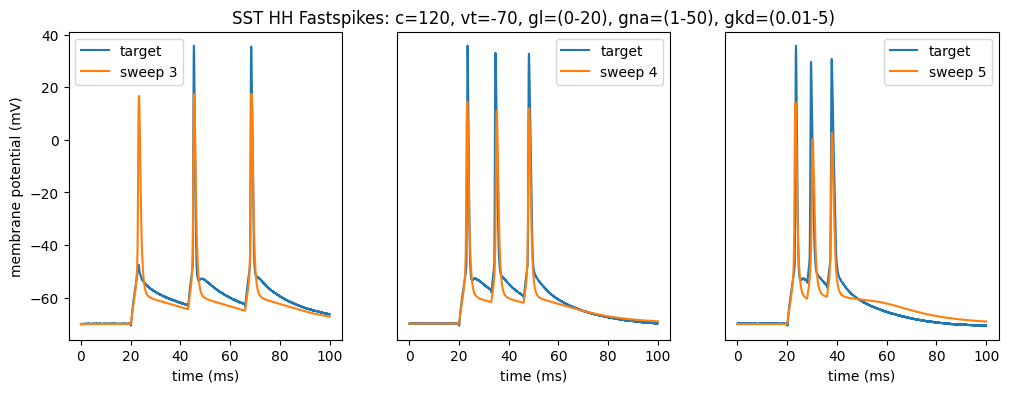

In [221]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(fastspikes_output_sliced[0], hh_sst_fast_5_9_30rounds_8[0]*1000, d2_title='sweep 3')
ylabel('membrane potential (mV)')

subplot(1,3,2)
create_comparison_together(fastspikes_output_sliced[1], hh_sst_fast_5_9_30rounds_8[1]*1000, d2_title='sweep 4')
ax = plt.gca()
ax.yaxis.set_visible(False)
title('SST HH Fastspikes: c=120, vt=-70, gl=(0-20), gna=(1-50), gkd=(0.01-5)')

subplot(1,3,3)
create_comparison_together(fastspikes_output_sliced[2], hh_sst_fast_5_9_30rounds_8[2]*1000, d2_title='sweep 5')
ax = plt.gca()
ax.yaxis.set_visible(False)

In [ ]:
hh_sst_fast_5_9_30rounds_9 = run_hh(fastspikes_input_sliced, fastspikes_output_sliced, cm_var=120, vt=-70, round_num=30, \
                           glmin=0, glmax=20, gnamin=1, gnamax=50, gkdmin=0.01, gkdmax=5)

# tt: 45.1s

first fit:
Round 0: Best parameters g_kd=0.95138587 uS, g_na=13.61975421 uS, gl=13.19207198 nS (error: 233.61108345 mV^2)
Round 1: Best parameters g_kd=0.64134531 uS, g_na=9.91751605 uS, gl=17.23977945 nS (error: 186.70164993 mV^2)
Round 2: Best parameters g_kd=0.39401912 uS, g_na=6.36012214 uS, gl=17.99917851 nS (error: 123.3826442 mV^2)
Round 3: Best parameters g_kd=290.66089865 nS, g_na=4.11309887 uS, gl=18.46117445 nS (error: 119.13016433 mV^2)
Round 4: Best parameters g_kd=294.33842304 nS, g_na=3.2950173 uS, gl=13.41811132 nS (error: 91.53557955 mV^2)
Round 5: Best parameters g_kd=294.33842304 nS, g_na=3.2950173 uS, gl=13.41811132 nS (error: 91.53557955 mV^2)
Round 6: Best parameters g_kd=294.33842304 nS, g_na=3.2950173 uS, gl=13.41811132 nS (error: 91.53557955 mV^2)
Round 7: Best parameters g_kd=267.32284109 nS, g_na=3.21528023 uS, gl=15.88881135 nS (error: 89.47986243 mV^2)
Round 8: Best parameters g_kd=267.32284109 nS, g_na=3.21528023 uS, gl=15.88881135 nS (error: 89.47986243 m

Text(0.5, 1.0, 'Comparison between low and high MSE scores')

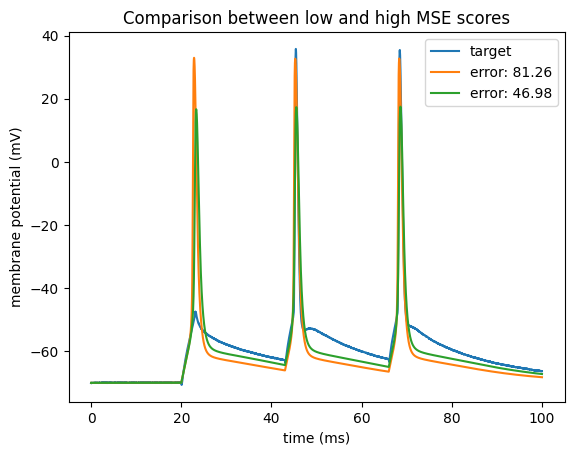

In [223]:
create_comparison_together_three(fastspikes_output_sliced[0], hh_sst_fast_5_9_30rounds_6[0]*1000, hh_sst_fast_5_9_30rounds_8[0]*1000,\
                                 d2_title='error: 81.26', d3_title='error: 46.98')
title('Comparison between low and high MSE scores')

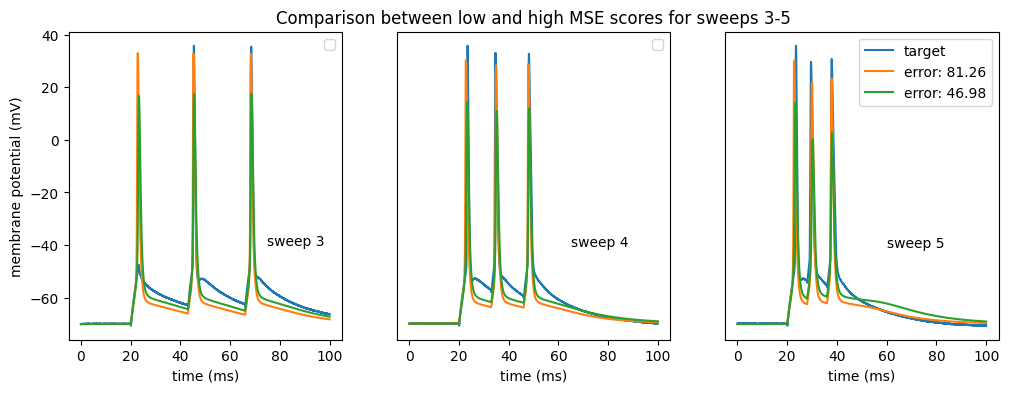

In [231]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together_three(fastspikes_output_sliced[0], hh_sst_fast_5_9_30rounds_6[0]*1000, hh_sst_fast_5_9_30rounds_8[0]*1000,\
                                 d1_title='', d2_title='', d3_title='')
text(75, -40, 'sweep 3')
ylabel('membrane potential (mV)')

subplot(1,3,2)
create_comparison_together_three(fastspikes_output_sliced[1], hh_sst_fast_5_9_30rounds_6[1]*1000, hh_sst_fast_5_9_30rounds_8[1]*1000,\
                                 d1_title='', d2_title='', d3_title='')
text(65, -40, 'sweep 4')
ax = plt.gca()
ax.yaxis.set_visible(False)
title('Comparison between low and high MSE scores for sweeps 3-5')

subplot(1,3,3)
create_comparison_together_three(fastspikes_output_sliced[2], hh_sst_fast_5_9_30rounds_6[2]*1000, hh_sst_fast_5_9_30rounds_8[2]*1000,\
                                 d2_title='error: 81.26', d3_title='error: 46.98')
text(60, -40, 'sweep 5')
ax = plt.gca()
ax.yaxis.set_visible(False)

***
***

# INDIVDUAL SWEEP 5

# LIF

In [ ]:
sst_lif_s5_0 = run_lif(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, cm_var=120, reset_var='v=-70*mV', thresh_var='v>-20*mV')

# tt: 4.7s

first fit:
Round 0: Best parameters R=189.34862401 Mohm, tau=12.7011184 ms (error: 134.36077785 mV^2)
Round 1: Best parameters R=192.31234041 Mohm, tau=11.6755308 ms (error: 126.59134755 mV^2)
Round 2: Best parameters R=187.77579165 Mohm, tau=11.20829861 ms (error: 125.18161783 mV^2)
Round 3: Best parameters R=187.77579165 Mohm, tau=11.20829861 ms (error: 125.18161783 mV^2)
Round 4: Best parameters R=180.13539557 Mohm, tau=10.71755189 ms (error: 123.81082569 mV^2)
Round 5: Best parameters R=182.47519177 Mohm, tau=10.66110347 ms (error: 123.51755817 mV^2)
Round 6: Best parameters R=181.74367067 Mohm, tau=10.60309582 ms (error: 123.35210604 mV^2)
Round 7: Best parameters R=181.74367067 Mohm, tau=10.60309582 ms (error: 123.35210604 mV^2)
Round 8: Best parameters R=176.78464683 Mohm, tau=10.41444036 ms (error: 122.96280146 mV^2)
Round 9: Best parameters R=176.66230401 Mohm, tau=10.34002917 ms (error: 122.62169507 mV^2)


Text(0.5, 1.0, 'SST sweep 5 individual: c=120, reset=-70, thresh>-20')

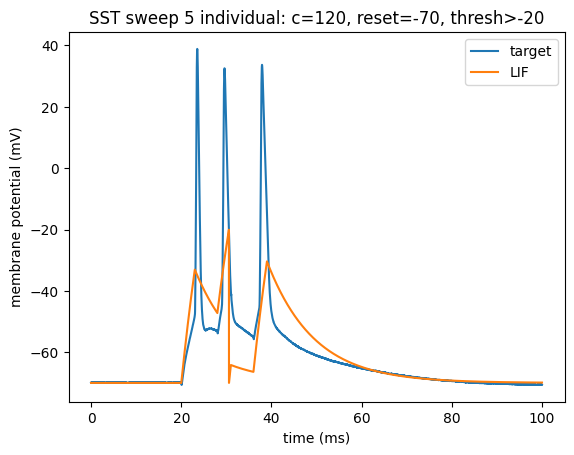

In [233]:
create_comparison_together(reshaped_sst_sweep5_out[0], sst_lif_s5_0[0]*1000, d2_title='LIF')
title('SST sweep 5 individual: c=120, reset=-70, thresh>-20')

In [234]:
sst_lif_s5_0_1 = run_lif(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, cm_var=120, reset_var='v=-70*mV', thresh_var='v>-20*mV')

first fit:
Round 0: Best parameters R=219.31251618 Mohm, tau=12.7460151 ms (error: 138.86933748 mV^2)
Round 1: Best parameters R=189.95053506 Mohm, tau=11.36250405 ms (error: 125.75842536 mV^2)
Round 2: Best parameters R=186.8597968 Mohm, tau=11.35321011 ms (error: 125.68285506 mV^2)
Round 3: Best parameters R=182.25937293 Mohm, tau=11.13194586 ms (error: 125.53430397 mV^2)
Round 4: Best parameters R=178.47398854 Mohm, tau=10.6342219 ms (error: 123.73608384 mV^2)
Round 5: Best parameters R=177.17817498 Mohm, tau=10.43876737 ms (error: 123.0042384 mV^2)
Round 6: Best parameters R=178.1229087 Mohm, tau=10.45480931 ms (error: 122.95287432 mV^2)
Round 7: Best parameters R=178.76935068 Mohm, tau=10.3680691 ms (error: 122.56954682 mV^2)
Round 8: Best parameters R=178.66736844 Mohm, tau=10.24901067 ms (error: 122.28186557 mV^2)
Round 9: Best parameters R=177.59925096 Mohm, tau=10.19823138 ms (error: 122.05866187 mV^2)


Text(0.5, 1.0, 'SST sweep 5 individual: c=120, reset=-70, thresh>-20')

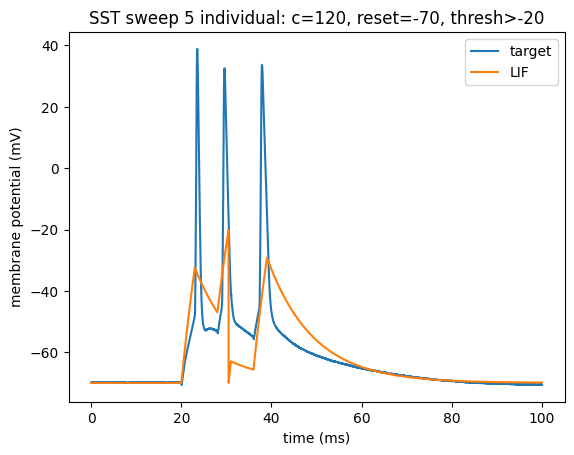

In [235]:
create_comparison_together(reshaped_sst_sweep5_out[0], sst_lif_s5_0_1[0]*1000, d2_title='LIF')
title('SST sweep 5 individual: c=120, reset=-70, thresh>-20')

In [236]:
sst_lif_s5_0_2 = run_lif(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, cm_var=120, reset_var='v=-70*mV', thresh_var='v>-20*mV')

first fit:
Round 0: Best parameters R=195.93436155 Mohm, tau=12.75209437 ms (error: 131.03513688 mV^2)
Round 1: Best parameters R=193.74101814 Mohm, tau=11.95968797 ms (error: 127.49542564 mV^2)
Round 2: Best parameters R=192.06060938 Mohm, tau=11.67010373 ms (error: 126.59849369 mV^2)
Round 3: Best parameters R=192.06060938 Mohm, tau=11.67010373 ms (error: 126.59849369 mV^2)
Round 4: Best parameters R=182.90489888 Mohm, tau=11.08437731 ms (error: 125.09052724 mV^2)
Round 5: Best parameters R=183.92542574 Mohm, tau=10.9454894 ms (error: 124.32016233 mV^2)
Round 6: Best parameters R=180.20352505 Mohm, tau=10.74737395 ms (error: 123.94623838 mV^2)
Round 7: Best parameters R=181.57728324 Mohm, tau=10.60513719 ms (error: 123.25518564 mV^2)
Round 8: Best parameters R=180.73827398 Mohm, tau=10.44926205 ms (error: 122.76946859 mV^2)
Round 9: Best parameters R=179.63537907 Mohm, tau=10.35586197 ms (error: 122.49221147 mV^2)


In [237]:
sst_lif_s5_0_3 = run_lif(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, cm_var=120, reset_var='v=-70*mV', thresh_var='v>-20*mV')

first fit:
Round 0: Best parameters R=215.35357421 Mohm, tau=12.90180535 ms (error: 135.09872355 mV^2)
Round 1: Best parameters R=193.73524527 Mohm, tau=11.95047616 ms (error: 127.45469046 mV^2)
Round 2: Best parameters R=193.73524527 Mohm, tau=11.95047616 ms (error: 127.45469046 mV^2)
Round 3: Best parameters R=188.94888319 Mohm, tau=11.45975147 ms (error: 125.96175779 mV^2)
Round 4: Best parameters R=180.11590733 Mohm, tau=10.91122653 ms (error: 124.88187899 mV^2)
Round 5: Best parameters R=180.11590733 Mohm, tau=10.64317192 ms (error: 123.51434603 mV^2)
Round 6: Best parameters R=180.11590733 Mohm, tau=10.58241772 ms (error: 123.21408938 mV^2)
Round 7: Best parameters R=179.00061093 Mohm, tau=10.49317159 ms (error: 122.9773439 mV^2)
Round 8: Best parameters R=177.3915905 Mohm, tau=10.4005386 ms (error: 122.78078423 mV^2)
Round 9: Best parameters R=179.53167097 Mohm, tau=10.40441614 ms (error: 122.61741554 mV^2)


In [238]:
sst_lif_s5_0_4 = run_lif(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, cm_var=120, reset_var='v=-70*mV', thresh_var='v>-20*mV')

first fit:
Round 0: Best parameters R=231.06084664 Mohm, tau=15.23237776 ms (error: 138.68100781 mV^2)
Round 1: Best parameters R=184.84509898 Mohm, tau=12.05099511 ms (error: 131.36040484 mV^2)
Round 2: Best parameters R=187.76479617 Mohm, tau=11.4471385 ms (error: 125.97737658 mV^2)
Round 3: Best parameters R=182.56662433 Mohm, tau=11.00746622 ms (error: 124.7782905 mV^2)
Round 4: Best parameters R=182.71719677 Mohm, tau=10.92168005 ms (error: 124.35698907 mV^2)
Round 5: Best parameters R=185.05165179 Mohm, tau=10.7375924 ms (error: 123.88348011 mV^2)
Round 6: Best parameters R=179.72755916 Mohm, tau=10.69538243 ms (error: 123.78056636 mV^2)
Round 7: Best parameters R=177.49206326 Mohm, tau=10.46421611 ms (error: 123.06841801 mV^2)
Round 8: Best parameters R=179.72755916 Mohm, tau=10.31857848 ms (error: 122.45308445 mV^2)
Round 9: Best parameters R=179.97204229 Mohm, tau=10.2355236 ms (error: 122.41204125 mV^2)


In [239]:
sst_lif_s5_0_5 = run_lif(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, cm_var=120, reset_var='v=-70*mV', thresh_var='v>-20*mV')

first fit:
Round 0: Best parameters R=203.55981946 Mohm, tau=11.8926862 ms (error: 130.49942843 mV^2)
Round 1: Best parameters R=197.50043313 Mohm, tau=11.88592498 ms (error: 127.7257795 mV^2)
Round 2: Best parameters R=180.23270754 Mohm, tau=11.15914005 ms (error: 126.44366193 mV^2)
Round 3: Best parameters R=184.36247161 Mohm, tau=10.59376928 ms (error: 123.52883876 mV^2)
Round 4: Best parameters R=179.92470107 Mohm, tau=10.5177813 ms (error: 123.00461356 mV^2)
Round 5: Best parameters R=176.62339921 Mohm, tau=10.32331628 ms (error: 122.54459685 mV^2)
Round 6: Best parameters R=176.62339921 Mohm, tau=10.21589924 ms (error: 122.10757155 mV^2)
Round 7: Best parameters R=176.62339921 Mohm, tau=10.16133071 ms (error: 121.92662566 mV^2)
Round 8: Best parameters R=176.62339921 Mohm, tau=10.16133071 ms (error: 121.92662566 mV^2)
Round 9: Best parameters R=177.36582117 Mohm, tau=10.10107471 ms (error: 121.76993989 mV^2)


In [240]:
sst_lif_s5_0_6 = run_lif(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, cm_var=120, reset_var='v=-70*mV', thresh_var='v>-20*mV')

first fit:
Round 0: Best parameters R=196.75373937 Mohm, tau=13.36378077 ms (error: 135.44749392 mV^2)
Round 1: Best parameters R=189.66762447 Mohm, tau=11.91711787 ms (error: 127.96714248 mV^2)
Round 2: Best parameters R=188.01514827 Mohm, tau=11.42739477 ms (error: 125.8840534 mV^2)
Round 3: Best parameters R=188.01514827 Mohm, tau=11.00804926 ms (error: 124.77074248 mV^2)
Round 4: Best parameters R=188.01514827 Mohm, tau=11.00804926 ms (error: 124.77074248 mV^2)
Round 5: Best parameters R=183.19320339 Mohm, tau=10.91283426 ms (error: 124.28594015 mV^2)
Round 6: Best parameters R=185.27843472 Mohm, tau=10.68033699 ms (error: 123.81973335 mV^2)
Round 7: Best parameters R=180.8542609 Mohm, tau=10.52803864 ms (error: 122.99967973 mV^2)
Round 8: Best parameters R=180.54697636 Mohm, tau=10.48576265 ms (error: 122.97525228 mV^2)
Round 9: Best parameters R=181.57963239 Mohm, tau=10.33800661 ms (error: 122.68343802 mV^2)


In [241]:
sst_lif_s5_0_7 = run_lif(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, cm_var=120, reset_var='v=-70*mV', thresh_var='v>-20*mV')


first fit:
Round 0: Best parameters R=194.20763432 Mohm, tau=12.40423024 ms (error: 129.51585339 mV^2)
Round 1: Best parameters R=194.11667729 Mohm, tau=11.74397942 ms (error: 126.98855477 mV^2)
Round 2: Best parameters R=188.56034596 Mohm, tau=11.48201721 ms (error: 126.05457763 mV^2)
Round 3: Best parameters R=188.56034596 Mohm, tau=11.48201721 ms (error: 126.05457763 mV^2)
Round 4: Best parameters R=185.36030877 Mohm, tau=11.26313781 ms (error: 125.51071771 mV^2)
Round 5: Best parameters R=180.44111999 Mohm, tau=10.90155774 ms (error: 124.70606201 mV^2)
Round 6: Best parameters R=182.157825 Mohm, tau=10.61929743 ms (error: 123.36620343 mV^2)
Round 7: Best parameters R=181.95524969 Mohm, tau=10.40623262 ms (error: 122.95321637 mV^2)
Round 8: Best parameters R=178.38531644 Mohm, tau=10.30354869 ms (error: 122.31844191 mV^2)
Round 9: Best parameters R=177.11781849 Mohm, tau=10.25209484 ms (error: 122.19592279 mV^2)


In [242]:
sst_lif_s5_0_8 = run_lif(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, cm_var=120, reset_var='v=-70*mV', thresh_var='v>-20*mV')

first fit:
Round 0: Best parameters R=191.01824998 Mohm, tau=12.66930682 ms (error: 132.89341064 mV^2)
Round 1: Best parameters R=187.96470168 Mohm, tau=12.04671798 ms (error: 129.43835616 mV^2)
Round 2: Best parameters R=191.71530465 Mohm, tau=11.38183823 ms (error: 126.04967677 mV^2)
Round 3: Best parameters R=191.71530465 Mohm, tau=11.38183823 ms (error: 126.04967677 mV^2)
Round 4: Best parameters R=186.40627171 Mohm, tau=11.05577 ms (error: 124.66397402 mV^2)
Round 5: Best parameters R=186.40627171 Mohm, tau=11.05577 ms (error: 124.66397402 mV^2)
Round 6: Best parameters R=183.70833291 Mohm, tau=10.64409505 ms (error: 123.61926575 mV^2)
Round 7: Best parameters R=179.63942826 Mohm, tau=10.56756793 ms (error: 123.22793028 mV^2)
Round 8: Best parameters R=180.0772818 Mohm, tau=10.54961202 ms (error: 123.13413867 mV^2)
Round 9: Best parameters R=178.86431827 Mohm, tau=10.4974934 ms (error: 123.02449232 mV^2)


In [243]:
sst_lif_s5_0_9 = run_lif(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, cm_var=120, reset_var='v=-70*mV', thresh_var='v>-20*mV')

first fit:
Round 0: Best parameters R=210.26587504 Mohm, tau=13.50777302 ms (error: 132.35886336 mV^2)
Round 1: Best parameters R=200.60673644 Mohm, tau=11.9777384 ms (error: 128.80768306 mV^2)
Round 2: Best parameters R=189.31729614 Mohm, tau=11.54155541 ms (error: 126.2156885 mV^2)
Round 3: Best parameters R=189.31729614 Mohm, tau=11.54155541 ms (error: 126.2156885 mV^2)
Round 4: Best parameters R=182.68578099 Mohm, tau=10.72822016 ms (error: 123.6704329 mV^2)
Round 5: Best parameters R=181.46832211 Mohm, tau=10.563779 ms (error: 123.206153 mV^2)
Round 6: Best parameters R=177.99176703 Mohm, tau=10.42146969 ms (error: 122.8107326 mV^2)
Round 7: Best parameters R=176.61004891 Mohm, tau=10.2581231 ms (error: 122.25687814 mV^2)
Round 8: Best parameters R=179.67121049 Mohm, tau=10.23263801 ms (error: 122.23202373 mV^2)
Round 9: Best parameters R=176.814597 Mohm, tau=10.22607049 ms (error: 122.12244182 mV^2)


In [244]:
sst_lif_s5_1 = run_lif(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, cm_var=120, reset_var='v=-70*mV', thresh_var='v>-0*mV')

first fit:
Round 0: Best parameters R=140.08624085 Mohm, tau=13.06631108 ms (error: 144.9805529 mV^2)
Round 1: Best parameters R=124.24325699 Mohm, tau=12.04414494 ms (error: 137.76884828 mV^2)
Round 2: Best parameters R=126.18255419 Mohm, tau=11.39770894 ms (error: 134.65019138 mV^2)
Round 3: Best parameters R=124.13134085 Mohm, tau=10.89851655 ms (error: 132.14281552 mV^2)
Round 4: Best parameters R=121.17973307 Mohm, tau=10.58239345 ms (error: 130.60716085 mV^2)
Round 5: Best parameters R=122.04767766 Mohm, tau=10.48835203 ms (error: 130.10615005 mV^2)
Round 6: Best parameters R=121.72055279 Mohm, tau=10.32217023 ms (error: 129.28057676 mV^2)
Round 7: Best parameters R=121.89442167 Mohm, tau=10.24923117 ms (error: 128.913409 mV^2)
Round 8: Best parameters R=123.85498 Mohm, tau=10.19647056 ms (error: 128.69591847 mV^2)
Round 9: Best parameters R=122.47167868 Mohm, tau=10.14356421 ms (error: 128.3892375 mV^2)


Text(0.5, 1.0, 'SST sweep 5 individual: c=120, reset=-70, thresh>-0')

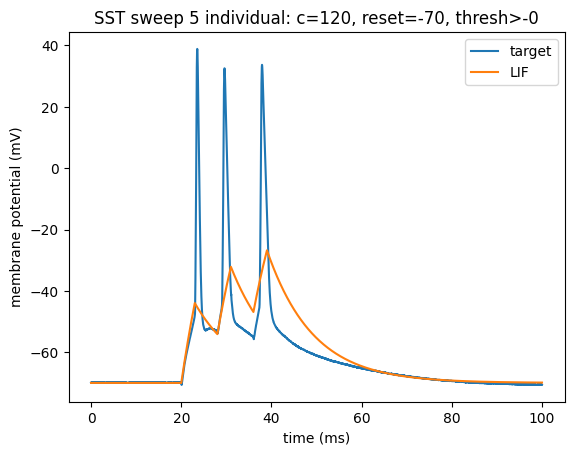

In [245]:
create_comparison_together(reshaped_sst_sweep5_out[0], sst_lif_s5_1[0]*1000, d2_title='LIF')
title('SST sweep 5 individual: c=120, reset=-70, thresh>-0')

In [255]:
sst_lif_s5_3 = run_lif(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, cm_var=120, reset_var='v=-70*mV', thresh_var='v>20*mV',\
                        r_min=50*10**6, r_max=400*10**6, t_min=0.001, t_max=1)

first fit:
Round 0: Best parameters R=297.98015952 Mohm, tau=125.61927818 ms (error: 279.20530348 mV^2)
Round 1: Best parameters R=200.57293931 Mohm, tau=80.58838003 ms (error: 261.40502664 mV^2)
Round 2: Best parameters R=165.77647538 Mohm, tau=56.66650115 ms (error: 245.32801424 mV^2)
Round 3: Best parameters R=142.63248457 Mohm, tau=41.7697798 ms (error: 227.96591745 mV^2)
Round 4: Best parameters R=130.85455358 Mohm, tau=29.21393121 ms (error: 202.90820902 mV^2)
Round 5: Best parameters R=119.89348662 Mohm, tau=18.39861717 ms (error: 168.15662855 mV^2)
Round 6: Best parameters R=140.07563424 Mohm, tau=14.13028292 ms (error: 149.39122205 mV^2)
Round 7: Best parameters R=109.19673445 Mohm, tau=11.11413059 ms (error: 136.25609373 mV^2)
Round 8: Best parameters R=109.5034492 Mohm, tau=8.02721435 ms (error: 118.99317299 mV^2)
Round 9: Best parameters R=107.2880525 Mohm, tau=5.68837387 ms (error: 107.27581695 mV^2)


Text(0.5, 1.0, 'SST sweep 5 individual: c=120, reset=-70, thresh>20, r=50-400, t=0.001-1')

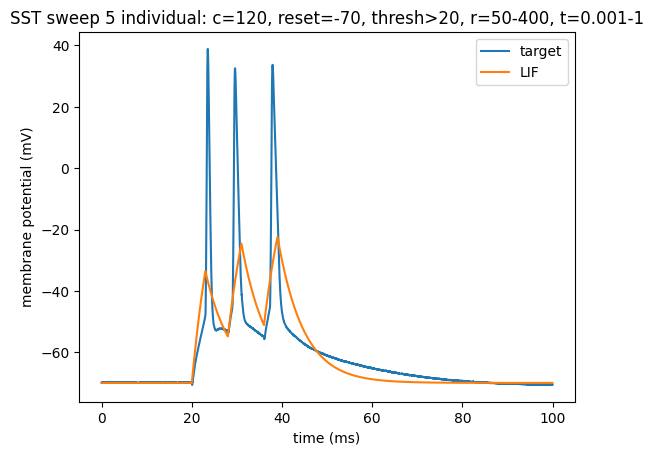

In [256]:
create_comparison_together(reshaped_sst_sweep5_out[0], sst_lif_s5_3[0]*1000, d2_title='LIF')
title('SST sweep 5 individual: c=120, reset=-70, thresh>20, r=50-400, t=0.001-1')

In [254]:
sst_lif_s5_3_1 = run_lif(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, cm_var=120, reset_var='v=-70*mV', thresh_var='v>20*mV',\
                        r_min=50*10**6, r_max=400*10**6, t_min=0.001, t_max=1)

first fit:
Round 0: Best parameters R=0.31651633 Gohm, tau=192.89913959 ms (error: 283.18059605 mV^2)
Round 1: Best parameters R=183.41332807 Mohm, tau=91.76587478 ms (error: 266.64702233 mV^2)
Round 2: Best parameters R=144.51339293 Mohm, tau=61.96184936 ms (error: 252.50156041 mV^2)
Round 3: Best parameters R=100.25821077 Mohm, tau=36.23920465 ms (error: 232.24636793 mV^2)
Round 4: Best parameters R=136.88122921 Mohm, tau=29.08132686 ms (error: 201.71797449 mV^2)
Round 5: Best parameters R=117.18737245 Mohm, tau=20.39492626 ms (error: 177.28022337 mV^2)
Round 6: Best parameters R=131.6561123 Mohm, tau=16.64617782 ms (error: 158.9016222 mV^2)
Round 7: Best parameters R=111.41480226 Mohm, tau=11.53195707 ms (error: 137.65740791 mV^2)
Round 8: Best parameters R=120.32075428 Mohm, tau=8.21663959 ms (error: 118.87716872 mV^2)
Round 9: Best parameters R=124.33628452 Mohm, tau=7.04665299 ms (error: 114.59440799 mV^2)


Text(0.5, 1.0, 'SST sweep 5 individual: c=120, reset=-70, thresh>20, r=50-400, t=0.001-1')

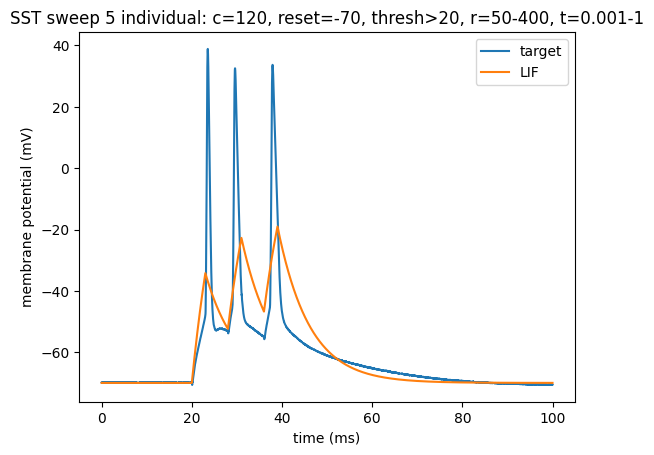

In [257]:
create_comparison_together(reshaped_sst_sweep5_out[0], sst_lif_s5_3_1[0]*1000, d2_title='LIF')
title('SST sweep 5 individual: c=120, reset=-70, thresh>20, r=50-400, t=0.001-1')

In [253]:
sst_lif_s5_3_2 = run_lif(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, cm_var=120, reset_var='v=-70*mV', thresh_var='v>20*mV',\
                        r_min=50*10**6, r_max=400*10**6, t_min=0.001, t_max=1)

first fit:
Round 0: Best parameters R=251.16383636 Mohm, tau=153.56806186 ms (error: 279.70682628 mV^2)
Round 1: Best parameters R=165.13509324 Mohm, tau=77.75418786 ms (error: 261.19886966 mV^2)
Round 2: Best parameters R=133.71188464 Mohm, tau=48.86398269 ms (error: 240.18374925 mV^2)
Round 3: Best parameters R=165.86016851 Mohm, tau=34.86476975 ms (error: 217.01854815 mV^2)
Round 4: Best parameters R=98.37498648 Mohm, tau=26.17575644 ms (error: 207.89718707 mV^2)
Round 5: Best parameters R=123.71492211 Mohm, tau=19.21412877 ms (error: 170.60660459 mV^2)
Round 6: Best parameters R=114.91954494 Mohm, tau=14.5157245 ms (error: 151.8472712 mV^2)
Round 7: Best parameters R=106.67186779 Mohm, tau=11.89968628 ms (error: 141.74635369 mV^2)
Round 8: Best parameters R=96.91137998 Mohm, tau=8.69206035 ms (error: 129.26027217 mV^2)
Round 9: Best parameters R=106.55068575 Mohm, tau=6.92852611 ms (error: 113.83932133 mV^2)


Text(0.5, 1.0, 'SST sweep 5 individual: c=120, reset=-70, thresh>20, r=50-400, t=0.001-1')

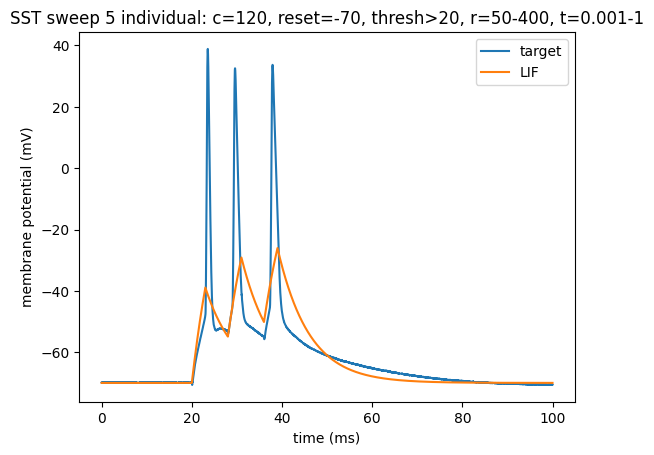

In [258]:
create_comparison_together(reshaped_sst_sweep5_out[0], sst_lif_s5_3_2[0]*1000, d2_title='LIF')
title('SST sweep 5 individual: c=120, reset=-70, thresh>20, r=50-400, t=0.001-1')

In [252]:
sst_lif_s5_3_3 = run_lif(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, cm_var=120, reset_var='v=-70*mV', thresh_var='v>20*mV',\
                        r_min=50*10**6, r_max=400*10**6, t_min=0.001, t_max=1)

first fit:
Round 0: Best parameters R=270.13107938 Mohm, tau=153.85546285 ms (error: 279.24298926 mV^2)
Round 1: Best parameters R=170.40158891 Mohm, tau=78.71232874 ms (error: 261.18876544 mV^2)
Round 2: Best parameters R=148.31233532 Mohm, tau=53.53048443 ms (error: 243.28735513 mV^2)
Round 3: Best parameters R=171.66056044 Mohm, tau=36.11845986 ms (error: 220.68891222 mV^2)
Round 4: Best parameters R=164.81006875 Mohm, tau=32.15282901 ms (error: 211.55194258 mV^2)
Round 5: Best parameters R=135.25293002 Mohm, tau=18.98829259 ms (error: 168.57363291 mV^2)
Round 6: Best parameters R=145.82400721 Mohm, tau=15.76983278 ms (error: 157.84290082 mV^2)
Round 7: Best parameters R=98.86010359 Mohm, tau=9.87786704 ms (error: 134.9631798 mV^2)
Round 8: Best parameters R=124.54623121 Mohm, tau=8.0661762 ms (error: 118.84072542 mV^2)
Round 9: Best parameters R=100.61779199 Mohm, tau=5.94748898 ms (error: 110.68509939 mV^2)


Text(0.5, 1.0, 'SST sweep 5 individual: c=120, reset=-70, thresh>20, r=50-400, t=0.001-1')

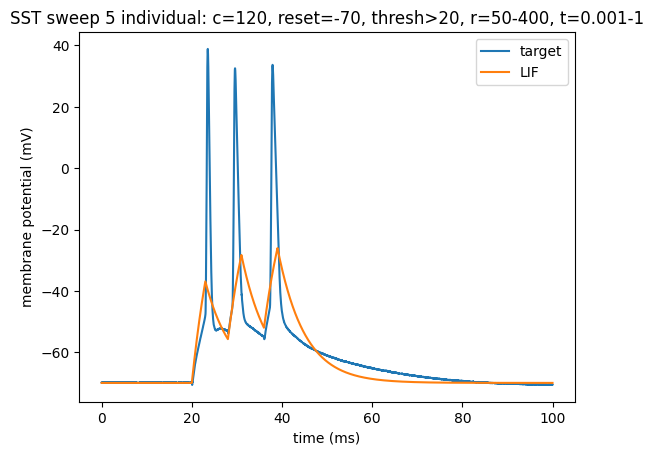

In [259]:
create_comparison_together(reshaped_sst_sweep5_out[0], sst_lif_s5_3_3[0]*1000, d2_title='LIF')
title('SST sweep 5 individual: c=120, reset=-70, thresh>20, r=50-400, t=0.001-1')

In [251]:
sst_lif_s5_3_4 = run_lif(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, cm_var=120, reset_var='v=-70*mV', thresh_var='v>20*mV',\
                        r_min=50*10**6, r_max=400*10**6, t_min=0.001, t_max=1)

first fit:
Round 0: Best parameters R=223.02677796 Mohm, tau=127.70927277 ms (error: 275.76593677 mV^2)
Round 1: Best parameters R=221.44674731 Mohm, tau=70.74318317 ms (error: 260.88549947 mV^2)
Round 2: Best parameters R=127.73238814 Mohm, tau=49.22021364 ms (error: 242.26236199 mV^2)
Round 3: Best parameters R=167.46826608 Mohm, tau=37.60534706 ms (error: 222.08871749 mV^2)
Round 4: Best parameters R=149.98480708 Mohm, tau=25.62959491 ms (error: 192.47881827 mV^2)
Round 5: Best parameters R=118.67300992 Mohm, tau=20.45725405 ms (error: 177.01375568 mV^2)
Round 6: Best parameters R=121.80739515 Mohm, tau=14.32116973 ms (error: 149.12478559 mV^2)
Round 7: Best parameters R=116.56760791 Mohm, tau=10.07591339 ms (error: 128.47892053 mV^2)
Round 8: Best parameters R=103.6978235 Mohm, tau=6.9518343 ms (error: 114.99976248 mV^2)
Round 9: Best parameters R=109.4502334 Mohm, tau=5.55407573 ms (error: 106.42104192 mV^2)


Text(0.5, 1.0, 'SST sweep 5 individual: c=120, reset=-70, thresh>20, r=50-400, t=0.001-1')

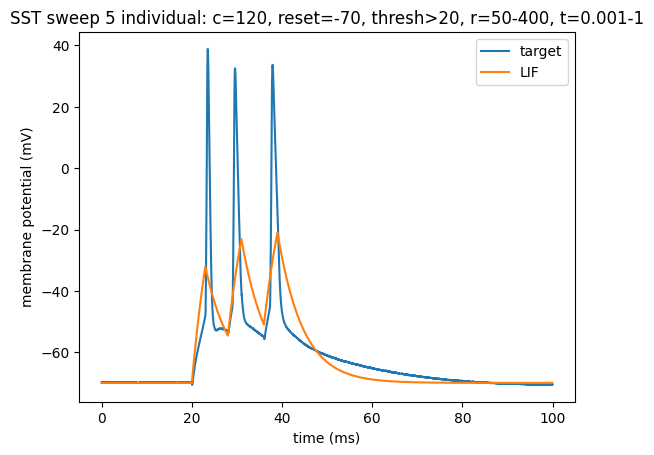

In [260]:
create_comparison_together(reshaped_sst_sweep5_out[0], sst_lif_s5_3_4[0]*1000, d2_title='LIF')
title('SST sweep 5 individual: c=120, reset=-70, thresh>20, r=50-400, t=0.001-1')

In [250]:
sst_lif_s5_3_5 = run_lif(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, cm_var=120, reset_var='v=-70*mV', thresh_var='v>20*mV',\
                        r_min=50*10**6, r_max=400*10**6, t_min=0.001, t_max=1)

first fit:
Round 0: Best parameters R=246.11903797 Mohm, tau=133.47065512 ms (error: 276.24521848 mV^2)
Round 1: Best parameters R=129.78676871 Mohm, tau=74.04399543 ms (error: 266.26041118 mV^2)
Round 2: Best parameters R=148.50105155 Mohm, tau=46.76618394 ms (error: 234.87678222 mV^2)
Round 3: Best parameters R=137.14653992 Mohm, tau=34.35124358 ms (error: 214.50822486 mV^2)
Round 4: Best parameters R=94.5313423 Mohm, tau=20.54971185 ms (error: 191.10423797 mV^2)
Round 5: Best parameters R=108.15095688 Mohm, tau=14.41130353 ms (error: 154.21944124 mV^2)
Round 6: Best parameters R=106.96518409 Mohm, tau=10.57533932 ms (error: 134.25505318 mV^2)
Round 7: Best parameters R=104.97983876 Mohm, tau=7.89418661 ms (error: 119.83974737 mV^2)
Round 8: Best parameters R=111.71025249 Mohm, tau=6.13843406 ms (error: 108.92146242 mV^2)
Round 9: Best parameters R=110.47335569 Mohm, tau=4.87401587 ms (error: 103.80448773 mV^2)


Text(0.5, 1.0, 'SST sweep 5 individual: c=120, reset=-70, thresh>20, r=50-400, t=0.001-1')

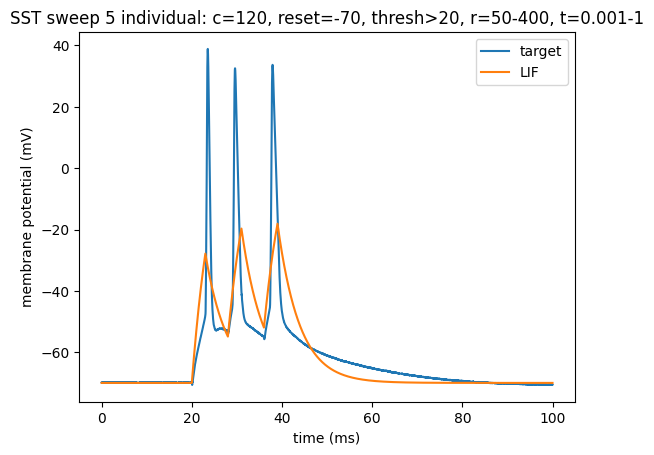

In [261]:
create_comparison_together(reshaped_sst_sweep5_out[0], sst_lif_s5_3_5[0]*1000, d2_title='LIF')
title('SST sweep 5 individual: c=120, reset=-70, thresh>20, r=50-400, t=0.001-1')

In [249]:
sst_lif_s5_3_6 = run_lif(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, cm_var=120, reset_var='v=-70*mV', thresh_var='v>20*mV',\
                        r_min=50*10**6, r_max=400*10**6, t_min=0.001, t_max=1)

first fit:
Round 0: Best parameters R=169.04640476 Mohm, tau=117.53249045 ms (error: 279.12557062 mV^2)
Round 1: Best parameters R=207.76673558 Mohm, tau=76.66540148 ms (error: 260.41418677 mV^2)
Round 2: Best parameters R=131.77163952 Mohm, tau=48.53052446 ms (error: 240.20973612 mV^2)
Round 3: Best parameters R=106.05908566 Mohm, tau=25.55367261 ms (error: 201.10303968 mV^2)
Round 4: Best parameters R=107.43539694 Mohm, tau=17.61060118 ms (error: 169.88920124 mV^2)
Round 5: Best parameters R=102.81394111 Mohm, tau=12.56271136 ms (error: 147.5614257 mV^2)
Round 6: Best parameters R=115.47760213 Mohm, tau=10.25100587 ms (error: 129.60427822 mV^2)
Round 7: Best parameters R=116.76049129 Mohm, tau=7.56452684 ms (error: 115.59542971 mV^2)
Round 8: Best parameters R=105.73051417 Mohm, tau=5.42004599 ms (error: 106.29149331 mV^2)
Round 9: Best parameters R=105.29821779 Mohm, tau=4.02737836 ms (error: 101.18223031 mV^2)


Text(0.5, 1.0, 'SST sweep 5 individual: c=120, reset=-70, thresh>20, r=50-400, t=0.001-1')

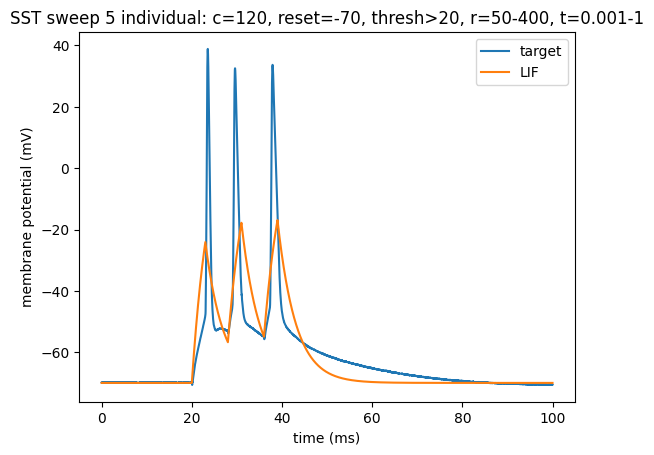

In [262]:
create_comparison_together(reshaped_sst_sweep5_out[0], sst_lif_s5_3_6[0]*1000, d2_title='LIF')
title('SST sweep 5 individual: c=120, reset=-70, thresh>20, r=50-400, t=0.001-1')

In [248]:
sst_lif_s5_3_7 = run_lif(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, cm_var=120, reset_var='v=-70*mV', thresh_var='v>20*mV',\
                        r_min=50*10**6, r_max=400*10**6, t_min=0.001, t_max=1)

first fit:
Round 0: Best parameters R=223.42164887 Mohm, tau=115.5978503 ms (error: 272.75739492 mV^2)
Round 1: Best parameters R=218.28049763 Mohm, tau=87.29415911 ms (error: 265.01983708 mV^2)
Round 2: Best parameters R=173.24710688 Mohm, tau=50.27642408 ms (error: 239.42504874 mV^2)
Round 3: Best parameters R=148.55124783 Mohm, tau=38.43391528 ms (error: 221.78390958 mV^2)
Round 4: Best parameters R=148.63334662 Mohm, tau=25.15854955 ms (error: 190.89831336 mV^2)
Round 5: Best parameters R=140.90896187 Mohm, tau=19.68960122 ms (error: 171.67077132 mV^2)
Round 6: Best parameters R=118.36482098 Mohm, tau=14.84313805 ms (error: 152.39372065 mV^2)
Round 7: Best parameters R=117.62288064 Mohm, tau=10.97199901 ms (error: 132.99912883 mV^2)
Round 8: Best parameters R=134.03580272 Mohm, tau=7.82636619 ms (error: 121.78678874 mV^2)
Round 9: Best parameters R=110.75816817 Mohm, tau=5.71939398 ms (error: 107.08091041 mV^2)


Text(0.5, 1.0, 'SST sweep 5 individual: c=120, reset=-70, thresh>20, r=50-400, t=0.001-1')

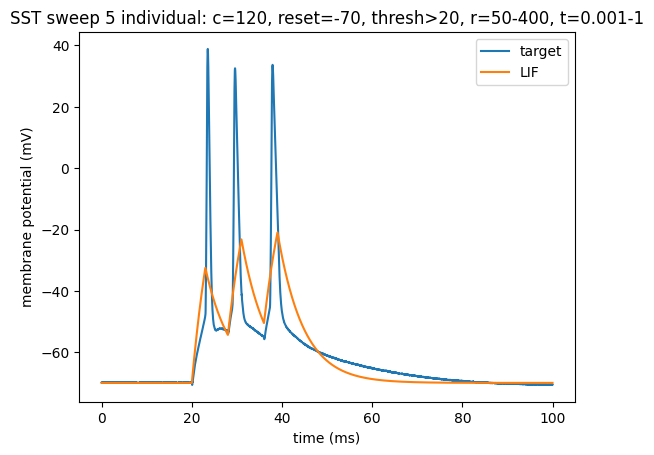

In [263]:
create_comparison_together(reshaped_sst_sweep5_out[0], sst_lif_s5_3_7[0]*1000, d2_title='LIF')
title('SST sweep 5 individual: c=120, reset=-70, thresh>20, r=50-400, t=0.001-1')

In [247]:
sst_lif_s5_3_8 = run_lif(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, cm_var=120, reset_var='v=-70*mV', thresh_var='v>20*mV',\
                        r_min=50*10**6, r_max=400*10**6, t_min=0.001, t_max=1)

first fit:
Round 0: Best parameters R=304.87668024 Mohm, tau=132.92052688 ms (error: 279.95645024 mV^2)
Round 1: Best parameters R=243.03744841 Mohm, tau=85.4483955 ms (error: 268.51816684 mV^2)
Round 2: Best parameters R=146.76179418 Mohm, tau=50.55823948 ms (error: 239.9886825 mV^2)
Round 3: Best parameters R=122.42121005 Mohm, tau=39.43582383 ms (error: 228.33039237 mV^2)
Round 4: Best parameters R=139.16315651 Mohm, tau=25.86592729 ms (error: 192.41229625 mV^2)
Round 5: Best parameters R=131.44192386 Mohm, tau=19.27753763 ms (error: 169.78712731 mV^2)
Round 6: Best parameters R=144.34110832 Mohm, tau=14.16226983 ms (error: 151.00155196 mV^2)
Round 7: Best parameters R=106.44170399 Mohm, tau=9.17328009 ms (error: 126.54066812 mV^2)
Round 8: Best parameters R=127.69232661 Mohm, tau=7.02775054 ms (error: 115.83980587 mV^2)
Round 9: Best parameters R=110.31995357 Mohm, tau=5.13467007 ms (error: 104.70849564 mV^2)


Text(0.5, 1.0, 'SST sweep 5 individual: c=120, reset=-70, thresh>20, r=50-400, t=0.001-1')

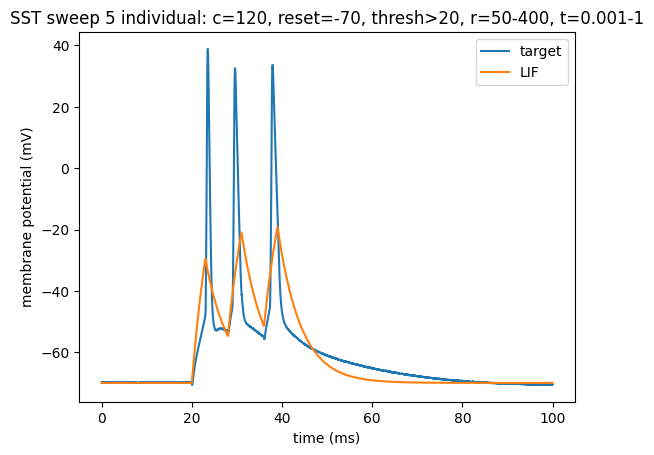

In [264]:
create_comparison_together(reshaped_sst_sweep5_out[0], sst_lif_s5_3_8[0]*1000, d2_title='LIF')
title('SST sweep 5 individual: c=120, reset=-70, thresh>20, r=50-400, t=0.001-1')

In [246]:
sst_lif_s5_3_9 = run_lif(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, cm_var=120, reset_var='v=-70*mV', thresh_var='v>20*mV',\
                        r_min=50*10**6, r_max=400*10**6, t_min=0.001, t_max=1)

first fit:
Round 0: Best parameters R=247.78887726 Mohm, tau=121.51674111 ms (error: 274.16191541 mV^2)
Round 1: Best parameters R=199.39939342 Mohm, tau=102.10439774 ms (error: 269.62219858 mV^2)
Round 2: Best parameters R=184.38959555 Mohm, tau=70.24847659 ms (error: 255.6444602 mV^2)
Round 3: Best parameters R=163.91975373 Mohm, tau=37.60262783 ms (error: 221.416695 mV^2)
Round 4: Best parameters R=118.7556919 Mohm, tau=24.0575435 ms (error: 190.27736212 mV^2)
Round 5: Best parameters R=133.02920058 Mohm, tau=18.80770821 ms (error: 167.85189606 mV^2)
Round 6: Best parameters R=115.47741097 Mohm, tau=12.44273463 ms (error: 141.15624241 mV^2)
Round 7: Best parameters R=108.99521294 Mohm, tau=9.47439956 ms (error: 127.2139409 mV^2)
Round 8: Best parameters R=106.28051253 Mohm, tau=7.35144549 ms (error: 116.2619494 mV^2)
Round 9: Best parameters R=110.70622143 Mohm, tau=5.87190523 ms (error: 107.75724175 mV^2)


Text(0.5, 1.0, 'SST sweep 5 individual: c=120, reset=-70, thresh>20, r=50-400, t=0.001-1')

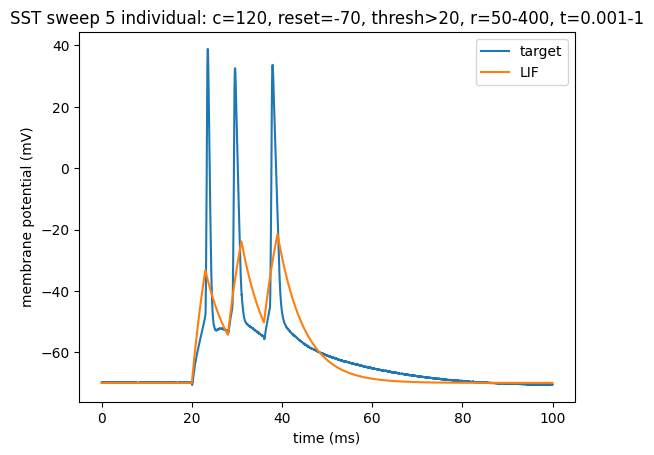

In [265]:
create_comparison_together(reshaped_sst_sweep5_out[0], sst_lif_s5_3_9[0]*1000, d2_title='LIF')
title('SST sweep 5 individual: c=120, reset=-70, thresh>20, r=50-400, t=0.001-1')

In [282]:
sst_lif_s5_3_10 = run_lif(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, cm_var=120, reset_var='v=-70*mV', thresh_var='v>20*mV',\
                        r_min=50*10**6, r_max=400*10**6, t_min=0.001, t_max=1)

first fit:
Round 0: Best parameters R=116.55249146 Mohm, tau=78.45577977 ms (error: 273.97164162 mV^2)
Round 1: Best parameters R=169.33126557 Mohm, tau=59.98816711 ms (error: 248.23883142 mV^2)
Round 2: Best parameters R=143.49115032 Mohm, tau=35.6461939 ms (error: 216.64330546 mV^2)
Round 3: Best parameters R=139.746209 Mohm, tau=26.70929246 ms (error: 194.90325649 mV^2)
Round 4: Best parameters R=143.49115032 Mohm, tau=16.98432877 ms (error: 161.8375805 mV^2)
Round 5: Best parameters R=100.46061217 Mohm, tau=12.39955618 ms (error: 148.22034105 mV^2)
Round 6: Best parameters R=106.58502841 Mohm, tau=9.93055287 ms (error: 130.7907612 mV^2)
Round 7: Best parameters R=111.96740105 Mohm, tau=7.58771334 ms (error: 116.08764034 mV^2)
Round 8: Best parameters R=101.43618891 Mohm, tau=5.9071979 ms (error: 110.10568468 mV^2)
Round 9: Best parameters R=106.42822779 Mohm, tau=5.20637888 ms (error: 105.20655503 mV^2)


In [283]:
sst_lif_s5_4 = run_lif(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, cm_var=120, reset_var='v=-70*mV', thresh_var='v>20*mV',\
                        round_num=20, r_min=50*10**6, r_max=400*10**6, t_min=0.001, t_max=1)

first fit:
Round 0: Best parameters R=240.73717782 Mohm, tau=163.01033439 ms (error: 282.11456461 mV^2)
Round 1: Best parameters R=202.69209326 Mohm, tau=75.13079126 ms (error: 259.25925811 mV^2)
Round 2: Best parameters R=168.08551236 Mohm, tau=45.56367682 ms (error: 233.50862811 mV^2)
Round 3: Best parameters R=136.33503439 Mohm, tau=31.05817196 ms (error: 206.89928388 mV^2)
Round 4: Best parameters R=170.17064942 Mohm, tau=20.18991544 ms (error: 185.23952963 mV^2)
Round 5: Best parameters R=132.33689905 Mohm, tau=13.99572491 ms (error: 147.26095864 mV^2)
Round 6: Best parameters R=108.27607937 Mohm, tau=9.21756844 ms (error: 126.04071264 mV^2)
Round 7: Best parameters R=125.10618106 Mohm, tau=7.80947203 ms (error: 117.88742279 mV^2)
Round 8: Best parameters R=114.83731582 Mohm, tau=5.58831733 ms (error: 106.8012379 mV^2)
Round 9: Best parameters R=110.18331881 Mohm, tau=4.92892851 ms (error: 103.96763204 mV^2)
Round 10: Best parameters R=97.91470497 Mohm, tau=3.22947542 ms (error: 1

In [284]:
sst_lif_s5_4_1 = run_lif(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, cm_var=120, reset_var='v=-70*mV', thresh_var='v>20*mV',\
                        round_num=20, r_min=50*10**6, r_max=400*10**6, t_min=0.001, t_max=1)

first fit:
Round 0: Best parameters R=278.69378834 Mohm, tau=141.76706555 ms (error: 277.94990946 mV^2)
Round 1: Best parameters R=220.92510328 Mohm, tau=121.23497403 ms (error: 274.26071208 mV^2)
Round 2: Best parameters R=167.55422239 Mohm, tau=57.25323963 ms (error: 245.86074797 mV^2)
Round 3: Best parameters R=140.04584463 Mohm, tau=41.15433665 ms (error: 227.2680152 mV^2)
Round 4: Best parameters R=113.14938191 Mohm, tau=28.44928119 ms (error: 206.33216314 mV^2)
Round 5: Best parameters R=167.55422239 Mohm, tau=17.92471377 ms (error: 177.13939241 mV^2)
Round 6: Best parameters R=139.09727323 Mohm, tau=14.74479913 ms (error: 151.69120431 mV^2)
Round 7: Best parameters R=131.18603945 Mohm, tau=10.95882138 ms (error: 133.30006455 mV^2)
Round 8: Best parameters R=105.94199143 Mohm, tau=7.14309558 ms (error: 115.21967574 mV^2)
Round 9: Best parameters R=119.45211646 Mohm, tau=6.22450777 ms (error: 110.0768683 mV^2)
Round 10: Best parameters R=103.74972811 Mohm, tau=4.82088596 ms (error

In [285]:
sst_lif_s5_4_2 = run_lif(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, cm_var=120, reset_var='v=-70*mV', thresh_var='v>20*mV',\
                        round_num=20, r_min=50*10**6, r_max=400*10**6, t_min=0.001, t_max=1)

first fit:
Round 0: Best parameters R=272.08847977 Mohm, tau=136.88199525 ms (error: 277.16930187 mV^2)
Round 1: Best parameters R=178.16743548 Mohm, tau=69.47590393 ms (error: 255.11699073 mV^2)
Round 2: Best parameters R=161.14429698 Mohm, tau=41.86629398 ms (error: 227.8003551 mV^2)
Round 3: Best parameters R=151.59753301 Mohm, tau=33.5142511 ms (error: 212.21151706 mV^2)
Round 4: Best parameters R=150.62643173 Mohm, tau=22.27811409 ms (error: 182.42446404 mV^2)
Round 5: Best parameters R=135.54028407 Mohm, tau=17.30774348 ms (error: 161.82628295 mV^2)
Round 6: Best parameters R=108.20978995 Mohm, tau=11.28739769 ms (error: 137.64140552 mV^2)
Round 7: Best parameters R=128.74418441 Mohm, tau=8.26537984 ms (error: 120.91227828 mV^2)
Round 8: Best parameters R=112.78172153 Mohm, tau=6.45417287 ms (error: 110.34501363 mV^2)
Round 9: Best parameters R=114.46625575 Mohm, tau=5.33521319 ms (error: 105.84889558 mV^2)
Round 10: Best parameters R=109.53123556 Mohm, tau=3.75780948 ms (error: 

In [286]:
sst_lif_s5_4_3 = run_lif(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, cm_var=120, reset_var='v=-70*mV', thresh_var='v>20*mV',\
                        round_num=20, r_min=50*10**6, r_max=400*10**6, t_min=0.001, t_max=1)

first fit:
Round 0: Best parameters R=286.76743149 Mohm, tau=131.50351127 ms (error: 277.79701493 mV^2)
Round 1: Best parameters R=134.35137705 Mohm, tau=72.46849539 ms (error: 263.73267724 mV^2)
Round 2: Best parameters R=153.88977611 Mohm, tau=46.4283121 ms (error: 234.08355684 mV^2)
Round 3: Best parameters R=150.42638446 Mohm, tau=35.11457099 ms (error: 215.46257094 mV^2)
Round 4: Best parameters R=112.7948487 Mohm, tau=24.01741853 ms (error: 192.53444476 mV^2)
Round 5: Best parameters R=134.0865378 Mohm, tau=15.95670005 ms (error: 156.04060215 mV^2)
Round 6: Best parameters R=139.85744157 Mohm, tau=9.78504752 ms (error: 131.91695404 mV^2)
Round 7: Best parameters R=107.50937157 Mohm, tau=7.46392748 ms (error: 116.48059209 mV^2)
Round 8: Best parameters R=105.11503854 Mohm, tau=5.71071744 ms (error: 107.83816243 mV^2)
Round 9: Best parameters R=106.03195753 Mohm, tau=5.10139971 ms (error: 104.80714739 mV^2)
Round 10: Best parameters R=103.97200029 Mohm, tau=4.16153559 ms (error: 10

In [287]:
sst_lif_s5_4_4 = run_lif(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, cm_var=120, reset_var='v=-70*mV', thresh_var='v>20*mV',\
                        round_num=20, r_min=50*10**6, r_max=400*10**6, t_min=0.001, t_max=1)

first fit:
Round 0: Best parameters R=241.26033636 Mohm, tau=111.85083822 ms (error: 272.2112001 mV^2)
Round 1: Best parameters R=200.24989396 Mohm, tau=87.58724585 ms (error: 264.22160418 mV^2)
Round 2: Best parameters R=146.39144004 Mohm, tau=52.87825998 ms (error: 242.80634437 mV^2)
Round 3: Best parameters R=137.63089128 Mohm, tau=32.65592288 ms (error: 210.60937439 mV^2)
Round 4: Best parameters R=114.93185161 Mohm, tau=23.83055175 ms (error: 190.95822439 mV^2)
Round 5: Best parameters R=137.82470208 Mohm, tau=18.00301009 ms (error: 164.8372464 mV^2)
Round 6: Best parameters R=110.64044811 Mohm, tau=12.65056123 ms (error: 143.94161339 mV^2)
Round 7: Best parameters R=113.92506971 Mohm, tau=9.6851016 ms (error: 126.9090704 mV^2)
Round 8: Best parameters R=113.92506971 Mohm, tau=7.66461095 ms (error: 116.22676974 mV^2)
Round 9: Best parameters R=95.07216529 Mohm, tau=5.4540624 ms (error: 110.88264143 mV^2)
Round 10: Best parameters R=108.27747597 Mohm, tau=4.72857058 ms (error: 103.

In [288]:
sst_lif_s5_4_5 = run_lif(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, cm_var=120, reset_var='v=-70*mV', thresh_var='v>20*mV',\
                        round_num=20, r_min=50*10**6, r_max=400*10**6, t_min=0.001, t_max=1)

first fit:
Round 0: Best parameters R=295.77146094 Mohm, tau=137.53001768 ms (error: 278.87167555 mV^2)
Round 1: Best parameters R=205.8234875 Mohm, tau=62.5916842 ms (error: 254.18260879 mV^2)
Round 2: Best parameters R=128.47654575 Mohm, tau=44.74497977 ms (error: 235.56020716 mV^2)
Round 3: Best parameters R=139.45339705 Mohm, tau=30.86660312 ms (error: 206.12667481 mV^2)
Round 4: Best parameters R=137.04265168 Mohm, tau=19.81692807 ms (error: 171.83010054 mV^2)
Round 5: Best parameters R=137.85737451 Mohm, tau=14.69867262 ms (error: 151.21382809 mV^2)
Round 6: Best parameters R=122.29062082 Mohm, tau=9.96004673 ms (error: 127.4775445 mV^2)
Round 7: Best parameters R=120.14409768 Mohm, tau=7.95219514 ms (error: 117.6115548 mV^2)
Round 8: Best parameters R=109.77131617 Mohm, tau=6.41969683 ms (error: 110.44764307 mV^2)
Round 9: Best parameters R=106.71689864 Mohm, tau=5.11699641 ms (error: 104.78589793 mV^2)
Round 10: Best parameters R=100.5646143 Mohm, tau=3.58964591 ms (error: 100.

In [289]:
sst_lif_s5_4_6 = run_lif(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, cm_var=120, reset_var='v=-70*mV', thresh_var='v>20*mV',\
                        round_num=20, r_min=50*10**6, r_max=400*10**6, t_min=0.001, t_max=1)

first fit:
Round 0: Best parameters R=284.27780132 Mohm, tau=117.98809429 ms (error: 277.2599436 mV^2)
Round 1: Best parameters R=218.14763834 Mohm, tau=87.31137839 ms (error: 265.01262299 mV^2)
Round 2: Best parameters R=109.09706244 Mohm, tau=41.50516709 ms (error: 237.50048651 mV^2)
Round 3: Best parameters R=128.8780581 Mohm, tau=40.88239868 ms (error: 229.04891549 mV^2)
Round 4: Best parameters R=130.42833287 Mohm, tau=27.66784003 ms (error: 198.63714741 mV^2)
Round 5: Best parameters R=131.9576022 Mohm, tau=20.16568368 ms (error: 173.22398532 mV^2)
Round 6: Best parameters R=108.30764956 Mohm, tau=14.09837965 ms (error: 152.550133 mV^2)
Round 7: Best parameters R=125.55516254 Mohm, tau=11.36139528 ms (error: 134.44464632 mV^2)
Round 8: Best parameters R=111.48303061 Mohm, tau=7.88403568 ms (error: 117.74255087 mV^2)
Round 9: Best parameters R=100.98088234 Mohm, tau=5.97394055 ms (error: 110.66951759 mV^2)
Round 10: Best parameters R=108.94316083 Mohm, tau=5.41458189 ms (error: 10

In [290]:
sst_lif_s5_4_7 = run_lif(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, cm_var=120, reset_var='v=-70*mV', thresh_var='v>20*mV',\
                        round_num=20, r_min=50*10**6, r_max=400*10**6, t_min=0.001, t_max=1)

first fit:
Round 0: Best parameters R=255.97103424 Mohm, tau=152.72210361 ms (error: 279.36988547 mV^2)
Round 1: Best parameters R=215.59247723 Mohm, tau=78.76445514 ms (error: 262.13778473 mV^2)
Round 2: Best parameters R=195.27345822 Mohm, tau=47.63828214 ms (error: 241.96606594 mV^2)
Round 3: Best parameters R=121.8015702 Mohm, tau=36.13602071 ms (error: 221.9622701 mV^2)
Round 4: Best parameters R=96.12274423 Mohm, tau=23.98144424 ms (error: 202.39867499 mV^2)
Round 5: Best parameters R=154.18147015 Mohm, tau=18.14794865 ms (error: 169.87557909 mV^2)
Round 6: Best parameters R=102.41696411 Mohm, tau=12.14775123 ms (error: 145.54321483 mV^2)
Round 7: Best parameters R=131.49509759 Mohm, tau=9.41477846 ms (error: 126.62541007 mV^2)
Round 8: Best parameters R=104.71423159 Mohm, tau=6.70676719 ms (error: 113.23501059 mV^2)
Round 9: Best parameters R=102.81184631 Mohm, tau=5.19050261 ms (error: 105.90381299 mV^2)
Round 10: Best parameters R=104.14523461 Mohm, tau=4.18604464 ms (error: 1

In [291]:
sst_lif_s5_4_8 = run_lif(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, cm_var=120, reset_var='v=-70*mV', thresh_var='v>20*mV',\
                        round_num=20, r_min=50*10**6, r_max=400*10**6, t_min=0.001, t_max=1)

first fit:
Round 0: Best parameters R=197.47707982 Mohm, tau=120.2171857 ms (error: 275.77691314 mV^2)
Round 1: Best parameters R=134.41906404 Mohm, tau=65.34650903 ms (error: 257.91748503 mV^2)
Round 2: Best parameters R=129.64101708 Mohm, tau=41.71436681 ms (error: 230.29967132 mV^2)
Round 3: Best parameters R=131.5658981 Mohm, tau=29.2510631 ms (error: 202.88248551 mV^2)
Round 4: Best parameters R=116.32046246 Mohm, tau=19.58330146 ms (error: 174.31022632 mV^2)
Round 5: Best parameters R=116.89522957 Mohm, tau=15.73356848 ms (error: 157.07744859 mV^2)
Round 6: Best parameters R=122.05961279 Mohm, tau=10.10428091 ms (error: 128.19049555 mV^2)
Round 7: Best parameters R=107.89658421 Mohm, tau=7.61821153 ms (error: 117.21232175 mV^2)
Round 8: Best parameters R=121.01368636 Mohm, tau=5.81159989 ms (error: 109.14704464 mV^2)
Round 9: Best parameters R=101.72899339 Mohm, tau=4.66682015 ms (error: 103.79700851 mV^2)
Round 10: Best parameters R=104.52696278 Mohm, tau=3.38790035 ms (error: 1

In [292]:
sst_lif_s5_4_9 = run_lif(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, cm_var=120, reset_var='v=-70*mV', thresh_var='v>20*mV',\
                        round_num=20, r_min=50*10**6, r_max=400*10**6, t_min=0.001, t_max=1)

first fit:
Round 0: Best parameters R=205.47828637 Mohm, tau=106.59461212 ms (error: 270.8074462 mV^2)
Round 1: Best parameters R=205.47828637 Mohm, tau=57.00668691 ms (error: 251.35195422 mV^2)
Round 2: Best parameters R=117.85522548 Mohm, tau=35.21548441 ms (error: 221.39057164 mV^2)
Round 3: Best parameters R=147.61489636 Mohm, tau=29.37755145 ms (error: 202.34518823 mV^2)
Round 4: Best parameters R=143.84024354 Mohm, tau=19.35302626 ms (error: 170.88667488 mV^2)
Round 5: Best parameters R=122.08139886 Mohm, tau=14.94233829 ms (error: 152.04123919 mV^2)
Round 6: Best parameters R=122.08139886 Mohm, tau=10.7055475 ms (error: 131.19187952 mV^2)
Round 7: Best parameters R=98.41398382 Mohm, tau=7.8170236 ms (error: 122.91503167 mV^2)
Round 8: Best parameters R=119.48809882 Mohm, tau=5.81067831 ms (error: 108.63356168 mV^2)
Round 9: Best parameters R=104.73426324 Mohm, tau=4.65535501 ms (error: 103.16334928 mV^2)
Round 10: Best parameters R=107.90384639 Mohm, tau=3.90550571 ms (error: 10

Text(0.5, 1.0, 'SST sweep 5 individual: c=120, reset=-70, thresh>20, r=(50-400), t=(0.001-1)')

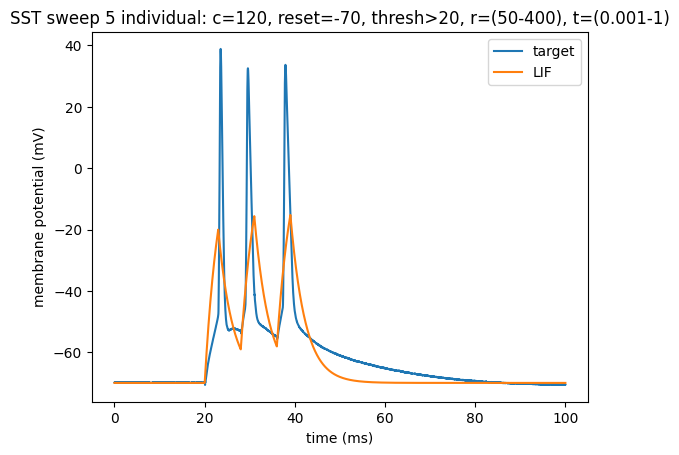

In [300]:
create_comparison_together(reshaped_sst_sweep5_out[0], sst_lif_s5_4_1[0]*1000, d2_title='LIF')
title('SST sweep 5 individual: c=120, reset=-70, thresh>20, r=(50-400), t=(0.001-1)')

In [301]:
sst_lif_s5_4_10 = run_lif(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, cm_var=120, reset_var='v=-70*mV', thresh_var='v>20*mV',\
                        round_num=20, r_min=50*10**6, r_max=400*10**6, t_min=0.001, t_max=1)

first fit:
Round 0: Best parameters R=260.94095537 Mohm, tau=170.7885667 ms (error: 282.10153606 mV^2)
Round 1: Best parameters R=165.41897945 Mohm, tau=93.91990673 ms (error: 269.92405679 mV^2)
Round 2: Best parameters R=136.28621464 Mohm, tau=60.83344507 ms (error: 253.2592849 mV^2)
Round 3: Best parameters R=146.88909291 Mohm, tau=39.78353737 ms (error: 224.23741883 mV^2)
Round 4: Best parameters R=134.03566608 Mohm, tau=26.92137148 ms (error: 195.91888895 mV^2)
Round 5: Best parameters R=144.27817918 Mohm, tau=20.44344532 ms (error: 174.90459348 mV^2)
Round 6: Best parameters R=109.05209878 Mohm, tau=15.02832906 ms (error: 156.85012408 mV^2)
Round 7: Best parameters R=112.99677009 Mohm, tau=11.78489261 ms (error: 138.45921964 mV^2)
Round 8: Best parameters R=108.37535411 Mohm, tau=8.15983915 ms (error: 120.06745506 mV^2)
Round 9: Best parameters R=119.69491401 Mohm, tau=6.95884077 ms (error: 113.0800467 mV^2)
Round 10: Best parameters R=116.62483611 Mohm, tau=5.66417751 ms (error: 

In [298]:
sst_lif_s5_5 = run_lif(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, cm_var=120, reset_var='v=-40*mV', thresh_var='v>20*mV',\
                        round_num=20, r_min=50*10**6, r_max=400*10**6, t_min=0.001, t_max=1)

first fit:
Round 0: Best parameters R=260.14269021 Mohm, tau=150.18988733 ms (error: 278.84656076 mV^2)
Round 1: Best parameters R=198.89667859 Mohm, tau=81.7347344 ms (error: 261.81709359 mV^2)
Round 2: Best parameters R=188.63447751 Mohm, tau=53.38995221 ms (error: 244.71685321 mV^2)
Round 3: Best parameters R=181.21788455 Mohm, tau=32.51867636 ms (error: 218.36322054 mV^2)
Round 4: Best parameters R=112.42203292 Mohm, tau=20.04264773 ms (error: 177.79968494 mV^2)
Round 5: Best parameters R=121.15119018 Mohm, tau=14.18278035 ms (error: 148.57203483 mV^2)
Round 6: Best parameters R=130.58264004 Mohm, tau=10.50601052 ms (error: 131.1227762 mV^2)
Round 7: Best parameters R=114.05098274 Mohm, tau=7.93292541 ms (error: 117.59152663 mV^2)
Round 8: Best parameters R=104.9738871 Mohm, tau=5.27261397 ms (error: 105.75717001 mV^2)
Round 9: Best parameters R=113.8955429 Mohm, tau=4.19257122 ms (error: 103.09810504 mV^2)
Round 10: Best parameters R=101.11363677 Mohm, tau=3.63383975 ms (error: 10

Text(0.5, 1.0, 'SST sweep 5 individual: c=120, reset=-40, thresh>20, r=50-400, t=0.001-1')

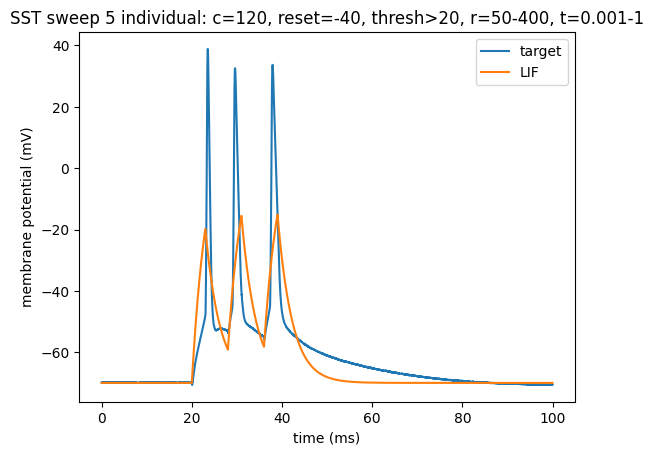

In [299]:
create_comparison_together(reshaped_sst_sweep5_out[0], sst_lif_s5_5[0]*1000, d2_title='LIF')
title('SST sweep 5 individual: c=120, reset=-40, thresh>20, r=50-400, t=0.001-1')

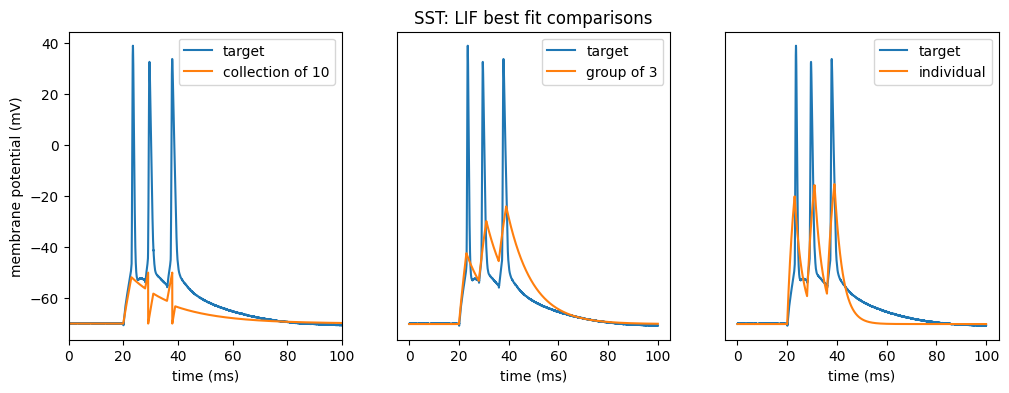

In [306]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(sliced_output_res[5], lif_sst_starters_0[5]*1000, d2_title='collection of 10')
xlim(0, 100)
ylabel('membrane potential (mV)')

subplot(1,3,2)
create_comparison_together(fastspikes_output_sliced[2], lif_sst_fast_5[2]*1000, d2_title='group of 3')
ax = plt.gca()
ax.yaxis.set_visible(False)
title('SST: LIF best fit comparisons')

subplot(1,3,3)
create_comparison_together(reshaped_sst_sweep5_out[0], sst_lif_s5_4_1[0]*1000, d2_title='individual')
ax = plt.gca()
ax.yaxis.set_visible(False)

***
***

# ADEX INDIVIDUAL SWEEP 5

In [307]:
sst_adex_s5_0 = run_adex(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out)

first fit:
Round 0: Best parameters a=1.84481662 nS, b=41.40688856 pA, tauw=150.59817689 ms (error: 186.01625854 mV^2)
Round 1: Best parameters a=1.5594102 nS, b=26.38259384 pA, tauw=132.2307033 ms (error: 182.88595248 mV^2)
Round 2: Best parameters a=1.94098981 nS, b=22.49032251 pA, tauw=128.76424046 ms (error: 182.42965774 mV^2)
Round 3: Best parameters a=2.24229341 nS, b=22.84951731 pA, tauw=125.6422029 ms (error: 182.42763505 mV^2)
Round 4: Best parameters a=2.81432581 nS, b=20.47843031 pA, tauw=122.87944285 ms (error: 182.42430339 mV^2)
Round 5: Best parameters a=2.0607137 nS, b=22.91617356 pA, tauw=127.33988128 ms (error: 182.42361788 mV^2)
Round 6: Best parameters a=2.0607137 nS, b=22.91617356 pA, tauw=127.33988128 ms (error: 182.42361788 mV^2)
Round 7: Best parameters a=2.13316074 nS, b=22.69285623 pA, tauw=121.51272906 ms (error: 182.42024265 mV^2)
Round 8: Best parameters a=2.09477468 nS, b=22.35028387 pA, tauw=121.30984312 ms (error: 182.42004179 mV^2)
Round 9: Best paramete

Text(0.5, 1.0, 'SST sweep 5 individual: initial')

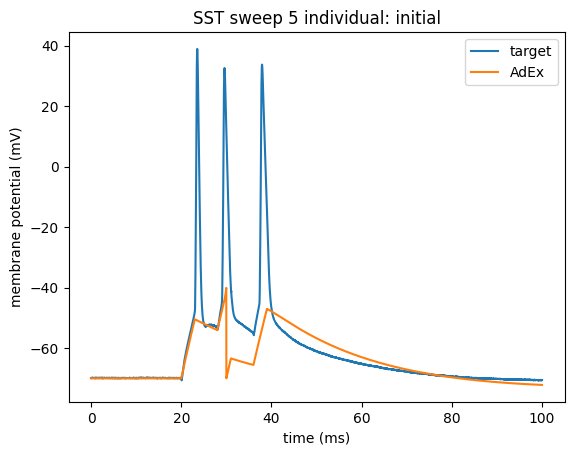

In [308]:
create_comparison_together(reshaped_sst_sweep5_out[0], sst_adex_s5_0[0]*1000, d2_title='AdEx')
title('SST sweep 5 individual: initial')

In [309]:
sst_adex_s5_1 = run_adex(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, gl_var=20)

first fit:
Round 0: Best parameters a=1.37837061 nS, b=0.34157858 nA, tauw=141.7028908 ms (error: 182.89529958 mV^2)
Round 1: Best parameters a=1.21898475 nS, b=0.40134215 nA, tauw=148.13123752 ms (error: 182.7931785 mV^2)
Round 2: Best parameters a=1.10823781 nS, b=0.38032621 nA, tauw=149.08238289 ms (error: 182.73803011 mV^2)
Round 3: Best parameters a=1.09329353 nS, b=138.08978897 pA, tauw=156.53891516 ms (error: 182.70862723 mV^2)
Round 4: Best parameters a=1.0685022 nS, b=0.41723232 nA, tauw=157.29841377 ms (error: 182.69544282 mV^2)
Round 5: Best parameters a=1.04640573 nS, b=0.41814763 nA, tauw=156.80549728 ms (error: 182.68697934 mV^2)
Round 6: Best parameters a=1.03089479 nS, b=0.32107607 nA, tauw=156.6254625 ms (error: 182.68056112 mV^2)
Round 7: Best parameters a=1.02957535 nS, b=0.38629708 nA, tauw=157.90309036 ms (error: 182.6765473 mV^2)
Round 8: Best parameters a=1.0202019 nS, b=281.08219286 pA, tauw=158.07017381 ms (error: 182.67196262 mV^2)
Round 9: Best parameters a=1

Text(0.5, 1.0, 'SST sweep 5 individual: gl=20')

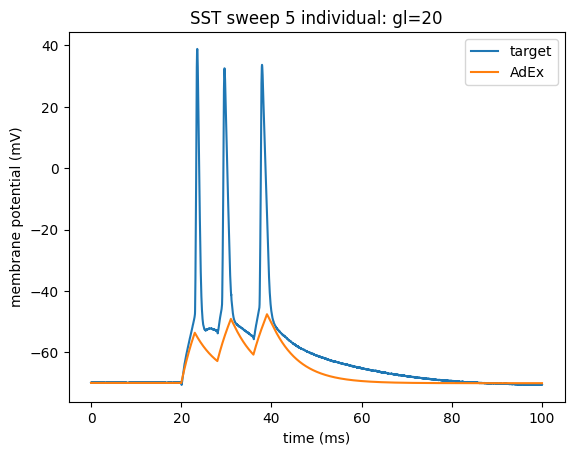

In [310]:
create_comparison_together(reshaped_sst_sweep5_out[0], sst_adex_s5_1[0]*1000, d2_title='AdEx')
title('SST sweep 5 individual: gl=20')

In [311]:
sst_adex_s5_2 = run_adex(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, gl_var=15)

first fit:
Round 0: Best parameters a=2.51384121 nS, b=40.35242944 pA, tauw=126.88612792 ms (error: 210.69852496 mV^2)
Round 1: Best parameters a=2.15215664 nS, b=22.94657202 pA, tauw=125.95080521 ms (error: 205.66069607 mV^2)
Round 2: Best parameters a=1.79757436 nS, b=14.67426684 pA, tauw=127.10933044 ms (error: 203.18394202 mV^2)
Round 3: Best parameters a=2.12136166 nS, b=8.09279336 pA, tauw=133.61899522 ms (error: 201.88250161 mV^2)
Round 4: Best parameters a=1.48482247 nS, b=5.64196586 pA, tauw=129.27791724 ms (error: 201.21919429 mV^2)
Round 5: Best parameters a=1.52877282 nS, b=3.89556946 pA, tauw=131.73874144 ms (error: 200.86550941 mV^2)
Round 6: Best parameters a=1.29747403 nS, b=2.80748588 pA, tauw=124.63422634 ms (error: 200.48405759 mV^2)
Round 7: Best parameters a=1.30207602 nS, b=2.27097362 pA, tauw=124.65331781 ms (error: 200.37833276 mV^2)
Round 8: Best parameters a=1.29897029 nS, b=1.56822588 pA, tauw=122.87776706 ms (error: 200.24846492 mV^2)
Round 9: Best parameter

Text(0.5, 1.0, 'SST sweep 5 individual: gl=15')

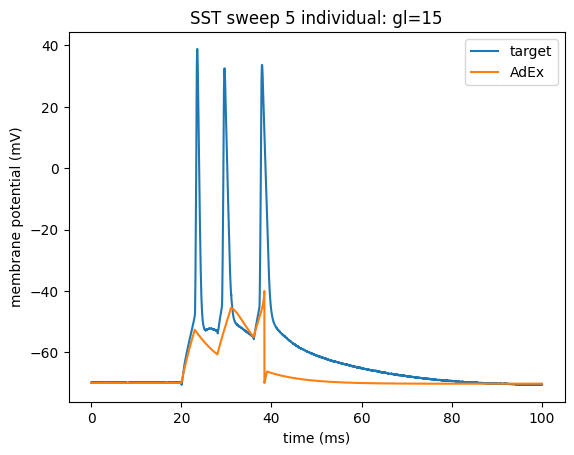

In [312]:
create_comparison_together(reshaped_sst_sweep5_out[0], sst_adex_s5_2[0]*1000, d2_title='AdEx')
title('SST sweep 5 individual: gl=15')

In [313]:
sst_adex_s5_3 = run_adex(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, gl_var=30)


first fit:
Round 0: Best parameters a=1.38867524 nS, b=200.8861993 pA, tauw=148.08935259 ms (error: 219.06247098 mV^2)
Round 1: Best parameters a=1.2167993 nS, b=206.25764906 pA, tauw=154.73955316 ms (error: 218.99524881 mV^2)
Round 2: Best parameters a=1.13323248 nS, b=0.39153681 nA, tauw=155.22296474 ms (error: 218.96978205 mV^2)
Round 3: Best parameters a=1.09795652 nS, b=0.36087029 nA, tauw=153.82463078 ms (error: 218.96215088 mV^2)
Round 4: Best parameters a=1.07627507 nS, b=128.17423115 pA, tauw=157.39225531 ms (error: 218.94912788 mV^2)
Round 5: Best parameters a=1.05024789 nS, b=0.43107861 nA, tauw=157.72735533 ms (error: 218.94102076 mV^2)
Round 6: Best parameters a=1.03827889 nS, b=0.40293633 nA, tauw=157.77843144 ms (error: 218.93748336 mV^2)
Round 7: Best parameters a=1.02819801 nS, b=0.43941291 nA, tauw=158.49843632 ms (error: 218.93333959 mV^2)
Round 8: Best parameters a=1.01929546 nS, b=0.42927889 nA, tauw=158.64715911 ms (error: 218.93053383 mV^2)
Round 9: Best paramete

Text(0.5, 1.0, 'SST sweep 5 individual: gl=30')

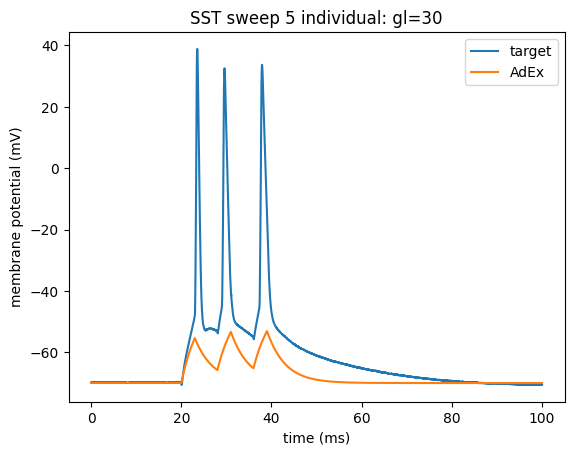

In [314]:
create_comparison_together(reshaped_sst_sweep5_out[0], sst_adex_s5_3[0]*1000, d2_title='AdEx')
title('SST sweep 5 individual: gl=30')

In [315]:
sst_adex_s5_37 = run_adex(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, c_var=60, gl_var=20, vt_var=-50,\
                                     delt_var=3, vc_var=15, vr=-53, tauw_min=40, a_max=5, b_max=1)

first fit:
Round 0: Best parameters a=3.96972476 nS, b=151.88524515 pA, tauw=63.75515427 ms (error: 248.10829423 mV^2)
Round 1: Best parameters a=1.84584461 nS, b=103.31671303 pA, tauw=71.4580602 ms (error: 215.67159829 mV^2)
Round 2: Best parameters a=1.84584461 nS, b=103.31671303 pA, tauw=71.4580602 ms (error: 215.67159829 mV^2)
Round 3: Best parameters a=1.25067537 nS, b=52.51627761 pA, tauw=48.53575431 ms (error: 214.82036578 mV^2)
Round 4: Best parameters a=1.29110898 nS, b=41.58523254 pA, tauw=51.60696482 ms (error: 204.35824177 mV^2)
Round 5: Best parameters a=1.30061962 nS, b=42.06434517 pA, tauw=48.11084705 ms (error: 204.26882389 mV^2)
Round 6: Best parameters a=1.17370275 nS, b=41.58523254 pA, tauw=49.41024145 ms (error: 202.90753278 mV^2)
Round 7: Best parameters a=1.17370275 nS, b=41.58523254 pA, tauw=49.41024145 ms (error: 202.90753278 mV^2)
Round 8: Best parameters a=1.19600534 nS, b=17.02766961 pA, tauw=93.76836198 ms (error: 202.13807456 mV^2)
Round 9: Best parameters 

Text(0.5, 1.0, 'SST sweep 5 individual: c=60, gl=20, el=-70, vt=-50, delt=3, vc=15, vr=-53, tauw=(40-160), a=(1-5), b=(0-1)')

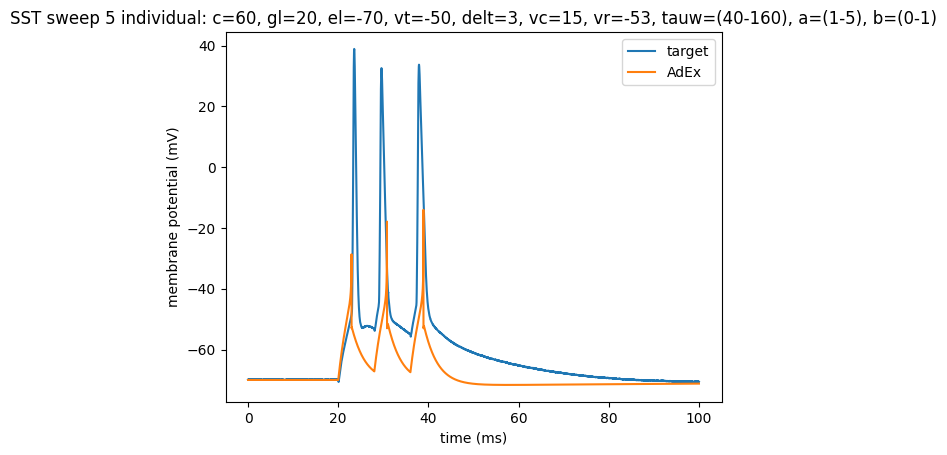

In [316]:
create_comparison_together(reshaped_sst_sweep5_out[0], sst_adex_s5_37[0]*1000, d2_title='AdEx')
title('SST sweep 5 individual: c=60, gl=20, el=-70, vt=-50, delt=3, vc=15, vr=-53, tauw=(40-160), a=(1-5), b=(0-1)')

In [317]:
sst_adex_s5_37_1 = run_adex(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, c_var=60, gl_var=20, vt_var=-50,\
                                     delt_var=3, vc_var=15, vr=-53, tauw_min=40, a_max=5, b_max=1)

first fit:
Round 0: Best parameters a=2.09338298 nS, b=123.63067312 pA, tauw=64.94691546 ms (error: 229.12595753 mV^2)
Round 1: Best parameters a=1.41546553 nS, b=111.30714323 pA, tauw=52.19606471 ms (error: 215.81845632 mV^2)
Round 2: Best parameters a=1.49356986 nS, b=106.51768389 pA, tauw=56.87402191 ms (error: 213.23091844 mV^2)
Round 3: Best parameters a=1.49356986 nS, b=106.51768389 pA, tauw=56.87402191 ms (error: 213.23091844 mV^2)
Round 4: Best parameters a=4.56074469 nS, b=95.9606604 pA, tauw=60.1908409 ms (error: 211.67599721 mV^2)
Round 5: Best parameters a=4.56074469 nS, b=95.9606604 pA, tauw=60.1908409 ms (error: 211.67599721 mV^2)
Round 6: Best parameters a=4.56074469 nS, b=95.9606604 pA, tauw=60.1908409 ms (error: 211.67599721 mV^2)
Round 7: Best parameters a=4.56074469 nS, b=95.90618703 pA, tauw=60.1908409 ms (error: 211.38134349 mV^2)
Round 8: Best parameters a=4.40854267 nS, b=98.54381196 pA, tauw=48.14057811 ms (error: 211.30871097 mV^2)
Round 9: Best parameters a=4.

Text(0.5, 1.0, 'SST sweep 5 individual: c=60, gl=20, el=-70, vt=-50, delt=3, vc=15, vr=-53, tauw=(40-160), a=(1-5), b=(0-1)')

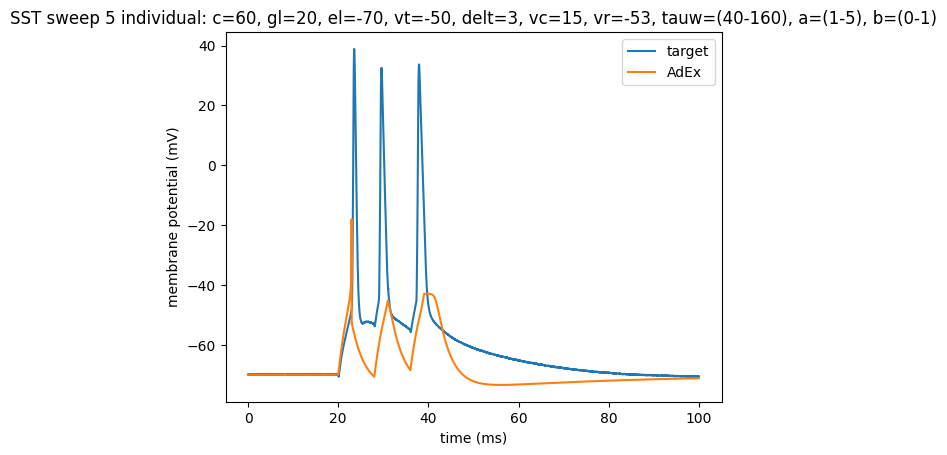

In [318]:
create_comparison_together(reshaped_sst_sweep5_out[0], sst_adex_s5_37_1[0]*1000, d2_title='AdEx')
title('SST sweep 5 individual: c=60, gl=20, el=-70, vt=-50, delt=3, vc=15, vr=-53, tauw=(40-160), a=(1-5), b=(0-1)')

In [319]:
sst_adex_s5_37_2 = run_adex(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, c_var=60, gl_var=20, vt_var=-50,\
                                     delt_var=3, vc_var=15, vr=-53, tauw_min=40, a_max=5, b_max=1)

first fit:
Round 0: Best parameters a=2.77259232 nS, b=103.2954544 pA, tauw=60.06256989 ms (error: 215.0278816 mV^2)
Round 1: Best parameters a=4.16689732 nS, b=101.12931372 pA, tauw=51.71425053 ms (error: 214.65904025 mV^2)
Round 2: Best parameters a=4.22197556 nS, b=41.38261078 pA, tauw=50.81780265 ms (error: 210.50529451 mV^2)
Round 3: Best parameters a=2.70565013 nS, b=38.7279098 pA, tauw=52.99067399 ms (error: 204.07049447 mV^2)
Round 4: Best parameters a=2.8517542 nS, b=38.7279098 pA, tauw=49.66189538 ms (error: 204.04524684 mV^2)
Round 5: Best parameters a=1.94315534 nS, b=18.15052364 pA, tauw=47.64878838 ms (error: 202.34126592 mV^2)
Round 6: Best parameters a=1.38835601 nS, b=12.06215989 pA, tauw=46.34229989 ms (error: 195.84496679 mV^2)
Round 7: Best parameters a=1.48204634 nS, b=8.94129845 pA, tauw=50.81772646 ms (error: 193.6441767 mV^2)
Round 8: Best parameters a=1.29504872 nS, b=6.07441386 pA, tauw=45.24528663 ms (error: 190.95815421 mV^2)
Round 9: Best parameters a=1.257

Text(0.5, 1.0, 'SST sweep 5 individual: c=60, gl=20, el=-70, vt=-50, delt=3, vc=15, vr=-53, tauw=(40-160), a=(1-5), b=(0-1)')

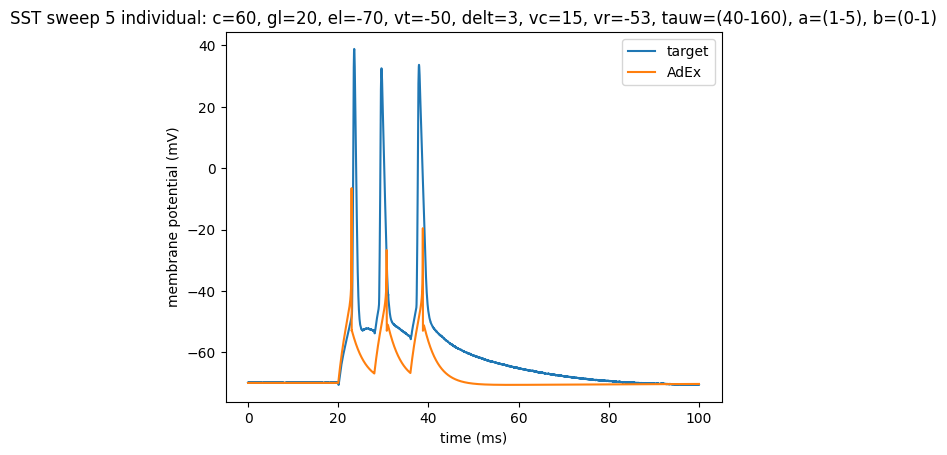

In [322]:
create_comparison_together(reshaped_sst_sweep5_out[0], sst_adex_s5_37_2[0]*1000, d2_title='AdEx')
title('SST sweep 5 individual: c=60, gl=20, el=-70, vt=-50, delt=3, vc=15, vr=-53, tauw=(40-160), a=(1-5), b=(0-1)')

In [320]:
sst_adex_s5_37_3 = run_adex(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, c_var=60, gl_var=20, vt_var=-50,\
                                     delt_var=3, vc_var=15, vr=-53, tauw_min=40, a_max=5, b_max=1)

first fit:
Round 0: Best parameters a=4.03459694 nS, b=117.77676379 pA, tauw=77.8506283 ms (error: 230.74230879 mV^2)
Round 1: Best parameters a=4.10062082 nS, b=94.65715891 pA, tauw=105.77461479 ms (error: 215.93563474 mV^2)
Round 2: Best parameters a=3.4464367 nS, b=93.75361852 pA, tauw=134.78173972 ms (error: 214.73124922 mV^2)
Round 3: Best parameters a=1.71127389 nS, b=42.27708664 pA, tauw=52.11537348 ms (error: 206.69283149 mV^2)
Round 4: Best parameters a=1.85615799 nS, b=39.88931256 pA, tauw=59.73095558 ms (error: 204.8446104 mV^2)
Round 5: Best parameters a=2.76673471 nS, b=37.51386376 pA, tauw=75.9619936 ms (error: 204.15883676 mV^2)
Round 6: Best parameters a=2.76673471 nS, b=37.51386376 pA, tauw=75.9619936 ms (error: 204.15883676 mV^2)
Round 7: Best parameters a=1.26100638 nS, b=41.91426057 pA, tauw=48.85921485 ms (error: 204.06187452 mV^2)
Round 8: Best parameters a=1.295202 nS, b=18.86302364 pA, tauw=60.45817809 ms (error: 202.81438811 mV^2)
Round 9: Best parameters a=1.2

Text(0.5, 1.0, 'SST sweep 5 individual: c=60, gl=20, el=-70, vt=-50, delt=3, vc=15, vr=-53, tauw=(40-160), a=(1-5), b=(0-1)')

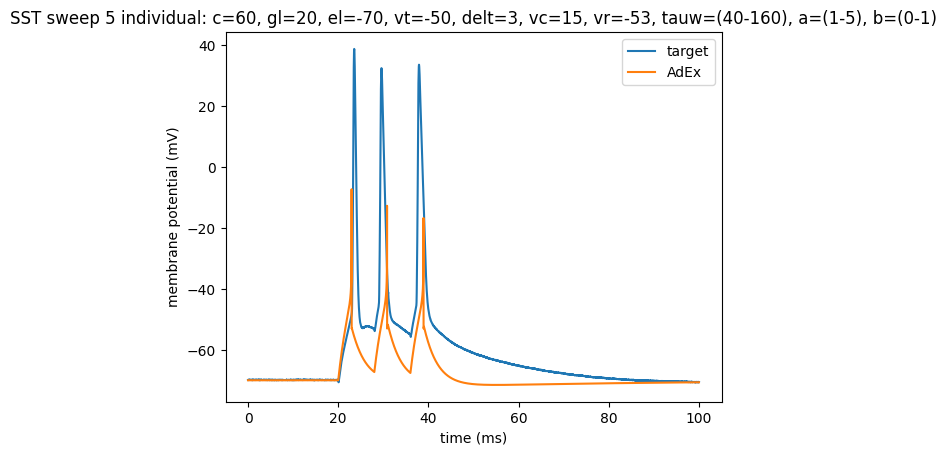

In [323]:
create_comparison_together(reshaped_sst_sweep5_out[0], sst_adex_s5_37_3[0]*1000, d2_title='AdEx')
title('SST sweep 5 individual: c=60, gl=20, el=-70, vt=-50, delt=3, vc=15, vr=-53, tauw=(40-160), a=(1-5), b=(0-1)')

In [321]:
sst_adex_s5_37_4 = run_adex(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, c_var=60, gl_var=20, vt_var=-50,\
                                     delt_var=3, vc_var=15, vr=-53, tauw_min=40, a_max=5, b_max=1)

first fit:
Round 0: Best parameters a=1.47785857 nS, b=145.23460022 pA, tauw=62.24248171 ms (error: 240.59639978 mV^2)
Round 1: Best parameters a=1.56206113 nS, b=99.18384398 pA, tauw=105.31123016 ms (error: 216.60869067 mV^2)
Round 2: Best parameters a=1.39258303 nS, b=106.4839669 pA, tauw=55.39025015 ms (error: 211.26643677 mV^2)
Round 3: Best parameters a=1.39258303 nS, b=106.4839669 pA, tauw=55.39025015 ms (error: 211.26643677 mV^2)
Round 4: Best parameters a=1.39258303 nS, b=106.4839669 pA, tauw=55.39025015 ms (error: 211.26643677 mV^2)
Round 5: Best parameters a=1.28950827 nS, b=43.32363723 pA, tauw=44.90213899 ms (error: 205.24864831 mV^2)
Round 6: Best parameters a=1.42687962 nS, b=42.0544526 pA, tauw=45.30188983 ms (error: 203.81400493 mV^2)
Round 7: Best parameters a=1.47551979 nS, b=41.38887002 pA, tauw=46.58593176 ms (error: 202.86649712 mV^2)
Round 8: Best parameters a=1.47551979 nS, b=41.38887002 pA, tauw=46.58593176 ms (error: 202.86649712 mV^2)
Round 9: Best parameters 

Text(0.5, 1.0, 'SST sweep 5 individual: c=60, gl=20, el=-70, vt=-50, delt=3, vc=15, vr=-53, tauw=(40-160), a=(1-5), b=(0-1)')

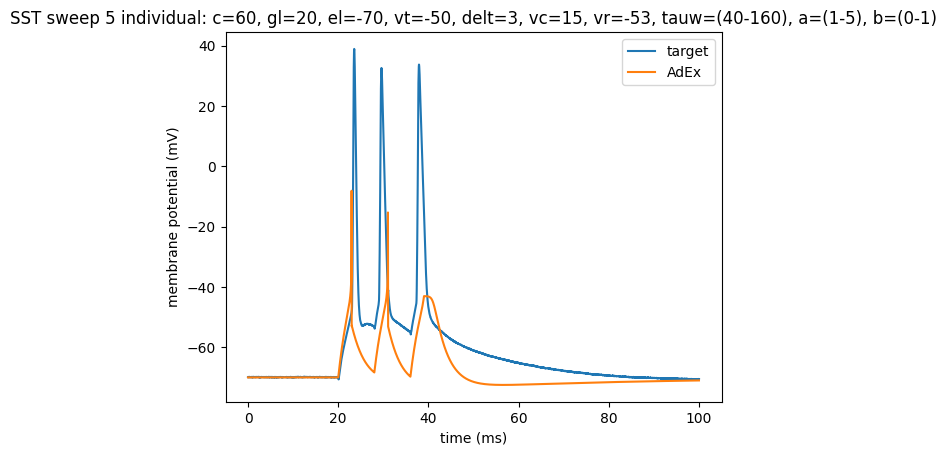

In [324]:
create_comparison_together(reshaped_sst_sweep5_out[0], sst_adex_s5_37_4[0]*1000, d2_title='AdEx')
title('SST sweep 5 individual: c=60, gl=20, el=-70, vt=-50, delt=3, vc=15, vr=-53, tauw=(40-160), a=(1-5), b=(0-1)')

In [325]:
sst_adex_s5_37_30rounds = run_adex(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, c_var=60, gl_var=20, vt_var=-50,\
                                     delt_var=3, vc_var=15, vr=-53, round_num=30, tauw_min=40, a_max=5, b_max=1)

first fit:
Round 0: Best parameters a=4.261697 nS, b=103.32243148 pA, tauw=66.49447537 ms (error: 219.59842219 mV^2)
Round 1: Best parameters a=3.59076375 nS, b=98.62503427 pA, tauw=64.28363055 ms (error: 213.2681819 mV^2)
Round 2: Best parameters a=3.59076375 nS, b=98.62503427 pA, tauw=64.28363055 ms (error: 213.2681819 mV^2)
Round 3: Best parameters a=3.84138308 nS, b=43.34610895 pA, tauw=63.90777897 ms (error: 213.08549422 mV^2)
Round 4: Best parameters a=3.46303596 nS, b=37.03480073 pA, tauw=55.85751338 ms (error: 202.09021805 mV^2)
Round 5: Best parameters a=3.46303596 nS, b=37.03480073 pA, tauw=55.85751338 ms (error: 202.09021805 mV^2)
Round 6: Best parameters a=3.46303596 nS, b=37.03480073 pA, tauw=55.85751338 ms (error: 202.09021805 mV^2)
Round 7: Best parameters a=3.46303596 nS, b=37.03480073 pA, tauw=55.85751338 ms (error: 202.09021805 mV^2)
Round 8: Best parameters a=3.46303596 nS, b=37.03480073 pA, tauw=55.85751338 ms (error: 202.09021805 mV^2)
Round 9: Best parameters a=3.

Text(0.5, 1.0, 'SST sweep 5 individual: c=60, gl=20, el=-70, vt=-50, delt=3, vc=15, vr=-53, tauw=(40-160), a=(1-5), b=(0-1)')

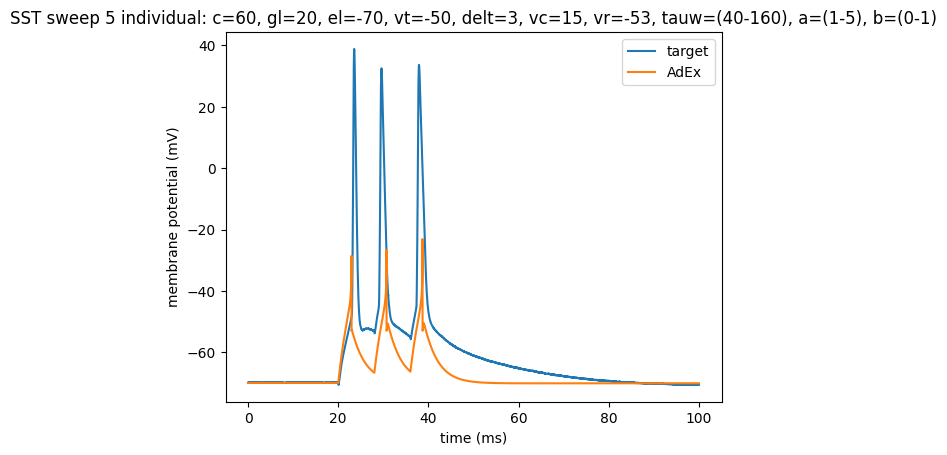

In [326]:
create_comparison_together(reshaped_sst_sweep5_out[0], sst_adex_s5_37_30rounds[0]*1000, d2_title='AdEx')
title('SST sweep 5 individual: c=60, gl=20, el=-70, vt=-50, delt=3, vc=15, vr=-53, tauw=(40-160), a=(1-5), b=(0-1)')

In [327]:
sst_adex_s5_37_30rounds_1 = run_adex(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, c_var=60, gl_var=20, vt_var=-50,\
                                     delt_var=3, vc_var=15, vr=-53, round_num=30, tauw_min=40, a_max=5, b_max=1)

first fit:
Round 0: Best parameters a=3.4428189 nS, b=131.95594244 pA, tauw=138.47849469 ms (error: 247.52192567 mV^2)
Round 1: Best parameters a=2.52459036 nS, b=114.74919134 pA, tauw=58.85875798 ms (error: 222.60630071 mV^2)
Round 2: Best parameters a=3.49753405 nS, b=97.94300659 pA, tauw=81.00344629 ms (error: 215.70557557 mV^2)
Round 3: Best parameters a=3.89579905 nS, b=101.41714762 pA, tauw=50.40691352 ms (error: 213.6903046 mV^2)
Round 4: Best parameters a=2.27425502 nS, b=107.1456269 pA, tauw=48.02003359 ms (error: 212.66750217 mV^2)
Round 5: Best parameters a=3.83200034 nS, b=100.36839733 pA, tauw=49.33004521 ms (error: 211.45342072 mV^2)
Round 6: Best parameters a=3.83200034 nS, b=100.36839733 pA, tauw=49.33004521 ms (error: 211.45342072 mV^2)
Round 7: Best parameters a=4.44633921 nS, b=99.18601361 pA, tauw=44.87846696 ms (error: 211.1027041 mV^2)
Round 8: Best parameters a=4.44633921 nS, b=99.18601361 pA, tauw=44.87846696 ms (error: 211.1027041 mV^2)
Round 9: Best parameters

Text(0.5, 1.0, 'SST sweep 5 individual: c=60, gl=20, el=-70, vt=-50, delt=3, vc=15, vr=-53, tauw=(40-160), a=(1-5), b=(0-1)')

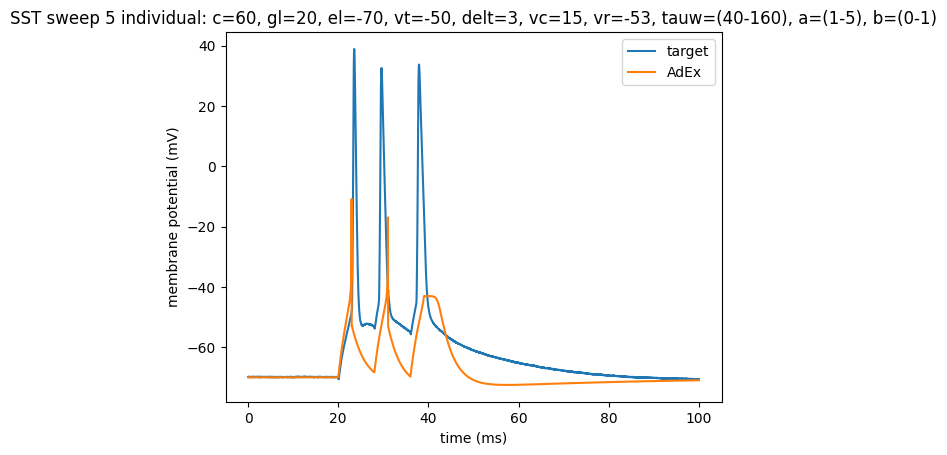

In [331]:
create_comparison_together(reshaped_sst_sweep5_out[0], sst_adex_s5_37_30rounds_1[0]*1000, d2_title='AdEx')
title('SST sweep 5 individual: c=60, gl=20, el=-70, vt=-50, delt=3, vc=15, vr=-53, tauw=(40-160), a=(1-5), b=(0-1)')

In [329]:
sst_adex_s5_37_30rounds_2 = run_adex(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, c_var=60, gl_var=20, vt_var=-50,\
                                     delt_var=3, vc_var=15, vr=-53, round_num=30, tauw_min=40, a_max=5, b_max=1)

first fit:
Round 0: Best parameters a=4.28998585 nS, b=113.00438886 pA, tauw=120.8696003 ms (error: 232.74835333 mV^2)
Round 1: Best parameters a=4.45332864 nS, b=103.31538622 pA, tauw=55.0213033 ms (error: 217.79408983 mV^2)
Round 2: Best parameters a=3.75390826 nS, b=94.94678519 pA, tauw=94.19296262 ms (error: 213.20352234 mV^2)
Round 3: Best parameters a=3.75390826 nS, b=94.94678519 pA, tauw=94.19296262 ms (error: 213.20352234 mV^2)
Round 4: Best parameters a=4.45813592 nS, b=37.62316588 pA, tauw=119.71432463 ms (error: 210.11995286 mV^2)
Round 5: Best parameters a=4.45332864 nS, b=35.98789595 pA, tauw=55.0213033 ms (error: 205.15160593 mV^2)
Round 6: Best parameters a=1.57911869 nS, b=40.92034327 pA, tauw=52.37494231 ms (error: 204.29359386 mV^2)
Round 7: Best parameters a=2.59191171 nS, b=39.02973899 pA, tauw=48.89657882 ms (error: 203.23843108 mV^2)
Round 8: Best parameters a=2.59191171 nS, b=39.02973899 pA, tauw=48.89657882 ms (error: 203.23843108 mV^2)
Round 9: Best parameters 

Text(0.5, 1.0, 'SST sweep 5 individual: c=60, gl=20, el=-70, vt=-50, delt=3, vc=15, vr=-53, tauw=(40-160), a=(1-5), b=(0-1)')

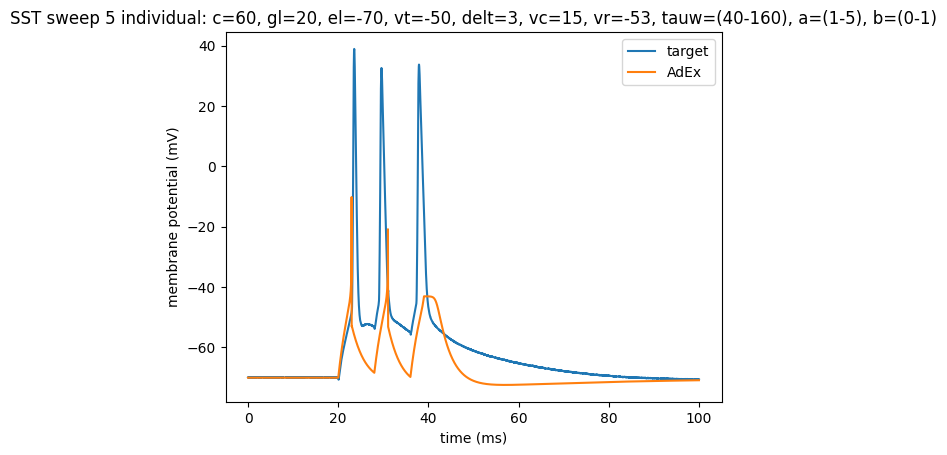

In [332]:
create_comparison_together(reshaped_sst_sweep5_out[0], sst_adex_s5_37_30rounds_2[0]*1000, d2_title='AdEx')
title('SST sweep 5 individual: c=60, gl=20, el=-70, vt=-50, delt=3, vc=15, vr=-53, tauw=(40-160), a=(1-5), b=(0-1)')

In [328]:
sst_adex_s5_37_30rounds_3 = run_adex(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, c_var=60, gl_var=20, vt_var=-50,\
                                     delt_var=3, vc_var=15, vr=-53, round_num=30, tauw_min=40, a_max=5, b_max=1)

first fit:
Round 0: Best parameters a=3.57954592 nS, b=103.18317846 pA, tauw=80.30339494 ms (error: 220.47091783 mV^2)
Round 1: Best parameters a=2.09237731 nS, b=108.53974247 pA, tauw=52.93008496 ms (error: 215.6018945 mV^2)
Round 2: Best parameters a=2.38364241 nS, b=44.37954419 pA, tauw=65.92265492 ms (error: 212.18728838 mV^2)
Round 3: Best parameters a=1.55163538 nS, b=40.65893977 pA, tauw=51.97185409 ms (error: 203.29042769 mV^2)
Round 4: Best parameters a=1.55163538 nS, b=40.65893977 pA, tauw=51.97185409 ms (error: 203.29042769 mV^2)
Round 5: Best parameters a=1.39197168 nS, b=19.07739983 pA, tauw=57.70900973 ms (error: 203.08468 mV^2)
Round 6: Best parameters a=1.83980795 nS, b=13.25979606 pA, tauw=51.35147406 ms (error: 197.87991427 mV^2)
Round 7: Best parameters a=1.35899201 nS, b=9.72422454 pA, tauw=132.86381588 ms (error: 193.83045931 mV^2)
Round 8: Best parameters a=1.48484577 nS, b=6.27280986 pA, tauw=51.71368233 ms (error: 191.14509508 mV^2)
Round 9: Best parameters a=1.

Text(0.5, 1.0, 'SST sweep 5 individual: c=60, gl=20, el=-70, vt=-50, delt=3, vc=15, vr=-53, tauw=(40-160), a=(1-5), b=(0-1)')

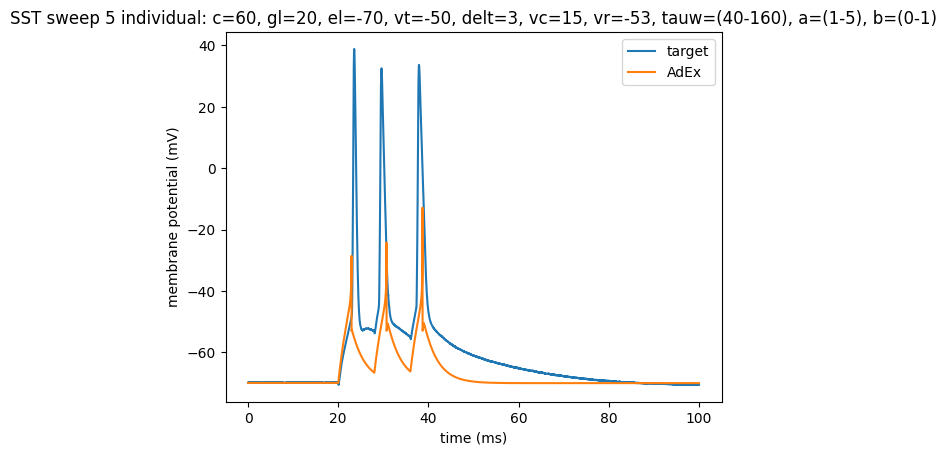

In [333]:
create_comparison_together(reshaped_sst_sweep5_out[0], sst_adex_s5_37_30rounds_3[0]*1000, d2_title='AdEx')
title('SST sweep 5 individual: c=60, gl=20, el=-70, vt=-50, delt=3, vc=15, vr=-53, tauw=(40-160), a=(1-5), b=(0-1)')

In [330]:
sst_adex_s5_37_30rounds_4 = run_adex(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, c_var=60, gl_var=20, vt_var=-50,\
                                     delt_var=3, vc_var=15, vr=-53, round_num=30, tauw_min=40, a_max=5, b_max=1)

first fit:
Round 0: Best parameters a=4.56612822 nS, b=123.79735275 pA, tauw=95.69627973 ms (error: 237.93184036 mV^2)
Round 1: Best parameters a=4.57892546 nS, b=94.52814687 pA, tauw=92.49729812 ms (error: 215.56263524 mV^2)
Round 2: Best parameters a=2.20781455 nS, b=101.83018116 pA, tauw=73.13773481 ms (error: 215.37039663 mV^2)
Round 3: Best parameters a=4.71238716 nS, b=42.63854201 pA, tauw=49.55073872 ms (error: 212.33207273 mV^2)
Round 4: Best parameters a=4.80501947 nS, b=34.91553191 pA, tauw=60.64619523 ms (error: 203.85534483 mV^2)
Round 5: Best parameters a=4.80501947 nS, b=34.91553191 pA, tauw=60.64619523 ms (error: 203.85534483 mV^2)
Round 6: Best parameters a=4.36258203 nS, b=35.58922135 pA, tauw=52.74620394 ms (error: 202.78981463 mV^2)
Round 7: Best parameters a=4.36258203 nS, b=35.58922135 pA, tauw=52.59468053 ms (error: 202.77865211 mV^2)
Round 8: Best parameters a=4.36258203 nS, b=35.58922135 pA, tauw=52.59468053 ms (error: 202.77865211 mV^2)
Round 9: Best parameters

Text(0.5, 1.0, 'SST sweep 5 individual: c=60, gl=20, el=-70, vt=-50, delt=3, vc=15, vr=-53, tauw=(40-160), a=(1-5), b=(0-1)')

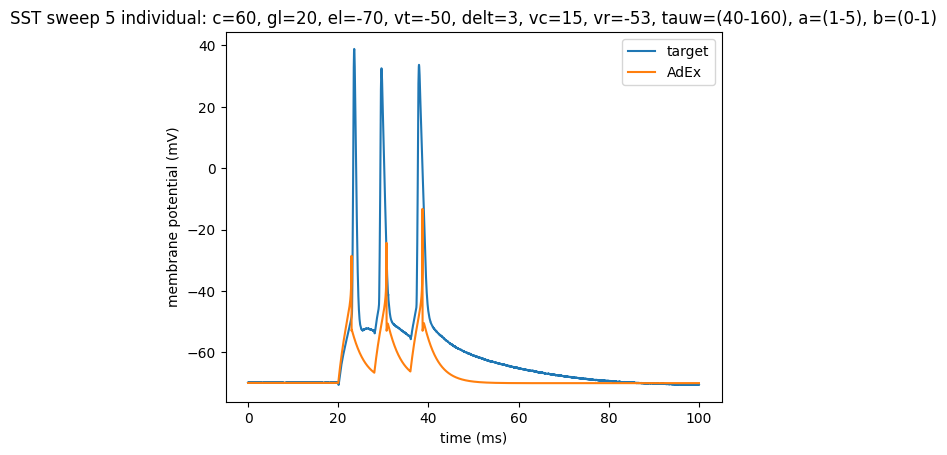

In [334]:
create_comparison_together(reshaped_sst_sweep5_out[0], sst_adex_s5_37_30rounds_4[0]*1000, d2_title='AdEx')
title('SST sweep 5 individual: c=60, gl=20, el=-70, vt=-50, delt=3, vc=15, vr=-53, tauw=(40-160), a=(1-5), b=(0-1)')

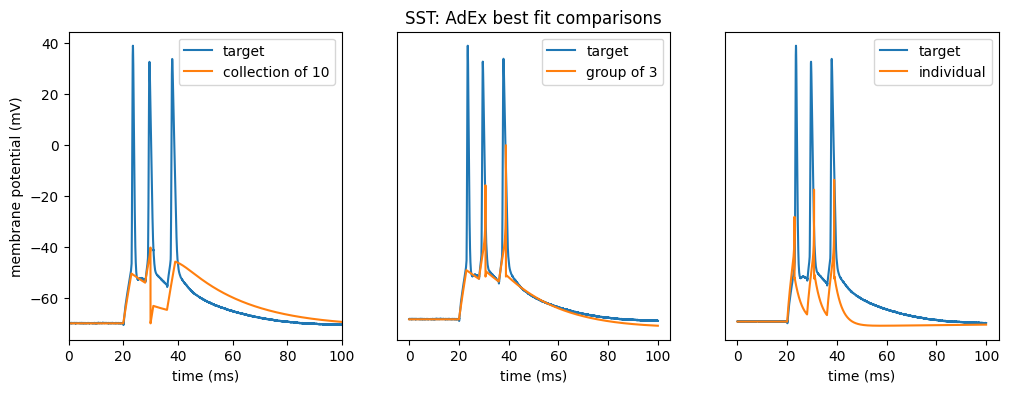

In [337]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(sliced_output_res[5], adex_sst_starters_1[5]*1000, d2_title='collection of 10')
xlim(0, 100)
ylabel('membrane potential (mV)')

subplot(1,3,2)
create_comparison_together(fastspikes_output_sliced[2], adex_sst_fast_11[2]*1000, d2_title='group of 3')
ax = plt.gca()
ax.yaxis.set_visible(False)
title('SST: AdEx best fit comparisons')

subplot(1,3,3)
create_comparison_together(reshaped_sst_sweep5_out[0], sst_adex_s5_37[0]*1000, d2_title='individual')
ax = plt.gca()
ax.yaxis.set_visible(False)

***
***

# HH INDIVIDUAL SWEEP 5

In [338]:
sst_hh_s5_0 = run_hh(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, cm_var=120, vt=-70, \
                           glmin=0, glmax=10, gnamin=1, gnamax=20, gkdmin=0.01, gkdmax=0.25)


first fit:
Round 0: Best parameters g_kd=231.32543622 nS, g_na=3.81106941 uS, gl=4.2077542 nS (error: 891.98876349 mV^2)
Round 1: Best parameters g_kd=225.30796226 nS, g_na=2.3843754 uS, gl=6.2883939 nS (error: 784.74091258 mV^2)
Round 2: Best parameters g_kd=231.69167873 nS, g_na=2.00217104 uS, gl=6.76981393 nS (error: 684.53191426 mV^2)
Round 3: Best parameters g_kd=234.69756423 nS, g_na=1.79152086 uS, gl=8.62802899 nS (error: 487.25919098 mV^2)
Round 4: Best parameters g_kd=240.19630538 nS, g_na=1.52537314 uS, gl=9.15595508 nS (error: 55.35932915 mV^2)
Round 5: Best parameters g_kd=228.38856194 nS, g_na=1.41164625 uS, gl=9.28583997 nS (error: 51.03429234 mV^2)
Round 6: Best parameters g_kd=229.31571017 nS, g_na=1.31936126 uS, gl=8.85089073 nS (error: 50.24035193 mV^2)
Round 7: Best parameters g_kd=213.98204643 nS, g_na=1.17815331 uS, gl=9.46731694 nS (error: 45.61471304 mV^2)
Round 8: Best parameters g_kd=213.98204643 nS, g_na=1.17815331 uS, gl=9.46731694 nS (error: 45.61471304 mV^2

Text(0.5, 1.0, 'SST sweep 5 individual: c=120, vt=-70, gl=(0-10), gna=(1-20), gkd=0.01-0.25')

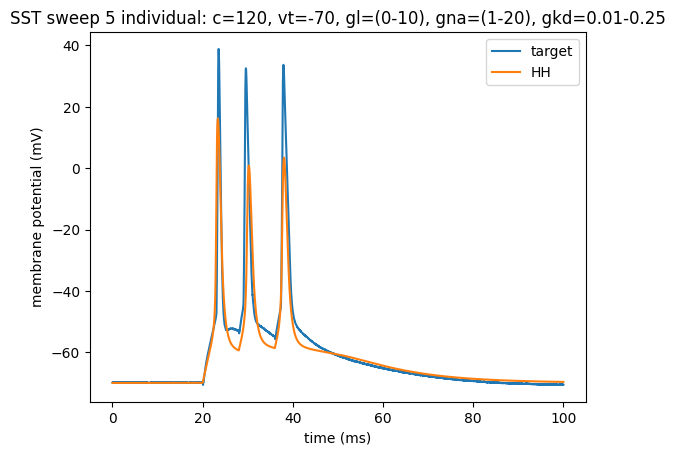

In [339]:
create_comparison_together(reshaped_sst_sweep5_out[0], sst_hh_s5_0[0]*1000, d2_title='HH')
title('SST sweep 5 individual: c=120, vt=-70, gl=(0-10), gna=(1-20), gkd=0.01-0.25')

In [340]:
sst_hh_s5_17 = run_hh(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, cm_var=120, ek=-75, ena=50, vt=-70, \
                           glmin=0, glmax=15, gnamin=1, gnamax=30, gkdmin=0.01, gkdmax=0.6)


first fit:
Round 0: Best parameters g_kd=0.54309299 uS, g_na=6.98967682 uS, gl=13.328668 nS (error: 162.66065957 mV^2)
Round 1: Best parameters g_kd=0.41100393 uS, g_na=4.24862713 uS, gl=12.86183212 nS (error: 135.35608829 mV^2)
Round 2: Best parameters g_kd=0.39864927 uS, g_na=4.48292887 uS, gl=13.36199922 nS (error: 128.05186517 mV^2)
Round 3: Best parameters g_kd=0.33725429 uS, g_na=2.88930827 uS, gl=13.71263999 nS (error: 114.98453966 mV^2)
Round 4: Best parameters g_kd=313.06826207 nS, g_na=2.51924672 uS, gl=12.87975372 nS (error: 97.45479884 mV^2)
Round 5: Best parameters g_kd=0.32005245 uS, g_na=2.08639251 uS, gl=8.32662068 nS (error: 87.97291843 mV^2)
Round 6: Best parameters g_kd=278.62273589 nS, g_na=2.16934852 uS, gl=13.27022157 nS (error: 76.56277076 mV^2)
Round 7: Best parameters g_kd=278.62273589 nS, g_na=2.16934852 uS, gl=13.27022157 nS (error: 76.56277076 mV^2)
Round 8: Best parameters g_kd=278.62273589 nS, g_na=2.16934852 uS, gl=13.27022157 nS (error: 76.56277076 mV^2)

Text(0.5, 1.0, 'SST sweep 5 individual: c=120, ek=-75, ena=50, vt=-74, gl=(0-15), gna=(1-30), gkd=0.01-0.6')

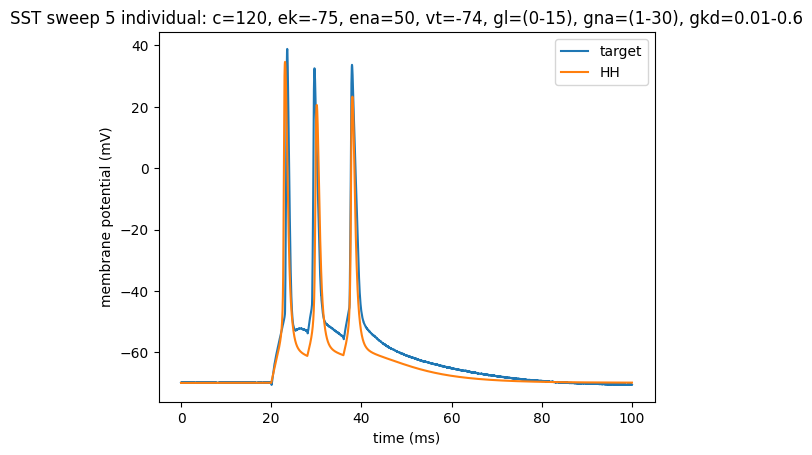

In [341]:
create_comparison_together(reshaped_sst_sweep5_out[0], sst_hh_s5_17[0]*1000, d2_title='HH')
title('SST sweep 5 individual: c=120, ek=-75, ena=50, vt=-74, gl=(0-15), gna=(1-30), gkd=0.01-0.6')

In [342]:
sst_hh_s5_17_1 = run_hh(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, cm_var=120, ek=-75, ena=50, vt=-70, \
                           glmin=0, glmax=15, gnamin=1, gnamax=30, gkdmin=0.01, gkdmax=0.6)


first fit:
Round 0: Best parameters g_kd=0.41054278 uS, g_na=4.57142408 uS, gl=7.19609386 nS (error: 892.861772 mV^2)
Round 1: Best parameters g_kd=0.41790479 uS, g_na=4.18172174 uS, gl=9.87728991 nS (error: 131.08494561 mV^2)
Round 2: Best parameters g_kd=0.38890044 uS, g_na=4.24371186 uS, gl=12.51036927 nS (error: 125.01001657 mV^2)
Round 3: Best parameters g_kd=0.38890044 uS, g_na=4.24371186 uS, gl=12.51036927 nS (error: 125.01001657 mV^2)
Round 4: Best parameters g_kd=0.36644702 uS, g_na=2.60968249 uS, gl=10.38125967 nS (error: 122.27361985 mV^2)
Round 5: Best parameters g_kd=0.32022743 uS, g_na=2.65031227 uS, gl=12.72171371 nS (error: 100.09376465 mV^2)
Round 6: Best parameters g_kd=308.34430242 nS, g_na=2.83667826 uS, gl=13.65797338 nS (error: 93.41462165 mV^2)
Round 7: Best parameters g_kd=308.34430242 nS, g_na=2.83667826 uS, gl=13.65797338 nS (error: 93.41462165 mV^2)
Round 8: Best parameters g_kd=309.20437681 nS, g_na=2.14042691 uS, gl=9.91221759 nS (error: 85.73500142 mV^2)
R

Text(0.5, 1.0, 'SST sweep 5 individual: c=120, ek=-75, ena=50, vt=-74, gl=(0-15), gna=(1-30), gkd=0.01-0.6')

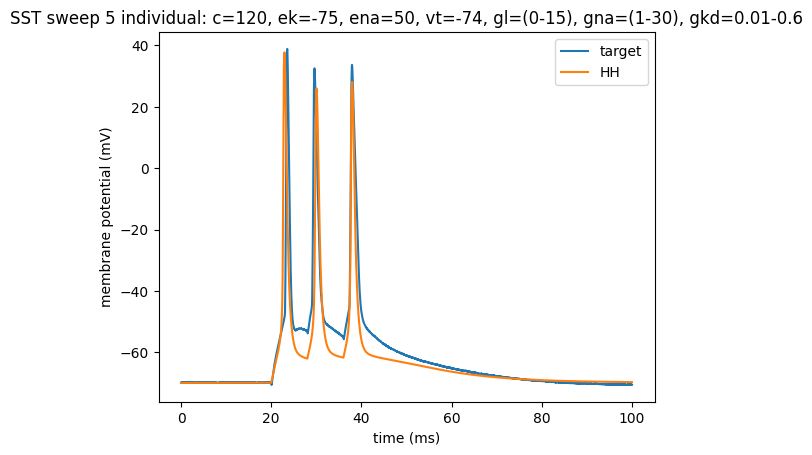

In [344]:
create_comparison_together(reshaped_sst_sweep5_out[0], sst_hh_s5_17_1[0]*1000, d2_title='HH')
title('SST sweep 5 individual: c=120, ek=-75, ena=50, vt=-74, gl=(0-15), gna=(1-30), gkd=0.01-0.6')

In [345]:
sst_hh_s5_17_2 = run_hh(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, cm_var=120, ek=-75, ena=50, vt=-70, \
                           glmin=0, glmax=15, gnamin=1, gnamax=30, gkdmin=0.01, gkdmax=0.6)


first fit:
Round 0: Best parameters g_kd=0.44822857 uS, g_na=5.44832813 uS, gl=9.00851244 nS (error: 625.9969106 mV^2)
Round 1: Best parameters g_kd=0.35618693 uS, g_na=3.41684362 uS, gl=12.28285506 nS (error: 112.73152521 mV^2)
Round 2: Best parameters g_kd=0.35618693 uS, g_na=3.41684362 uS, gl=12.28285506 nS (error: 112.73152521 mV^2)
Round 3: Best parameters g_kd=0.35618693 uS, g_na=3.41684362 uS, gl=12.28285506 nS (error: 112.73152521 mV^2)
Round 4: Best parameters g_kd=0.34635455 uS, g_na=2.34983614 uS, gl=8.15935483 nS (error: 101.12900365 mV^2)
Round 5: Best parameters g_kd=0.34635455 uS, g_na=2.34983614 uS, gl=8.15935483 nS (error: 101.12900365 mV^2)
Round 6: Best parameters g_kd=304.55811532 nS, g_na=2.22729981 uS, gl=11.36259234 nS (error: 87.57784964 mV^2)
Round 7: Best parameters g_kd=287.38471927 nS, g_na=2.05911876 uS, gl=12.23548995 nS (error: 80.22740807 mV^2)
Round 8: Best parameters g_kd=287.38471927 nS, g_na=2.05911876 uS, gl=12.23548995 nS (error: 80.22740807 mV^2)


Text(0.5, 1.0, 'SST sweep 5 individual: c=120, ek=-75, ena=50, vt=-74, gl=(0-15), gna=(1-30), gkd=0.01-0.6')

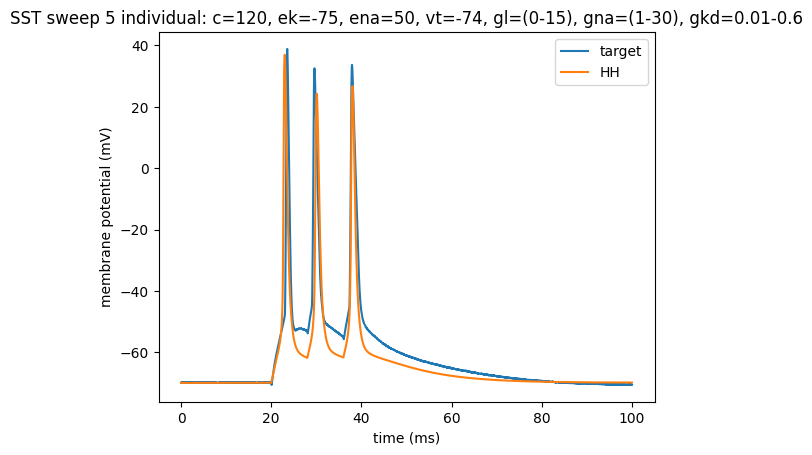

In [354]:
create_comparison_together(reshaped_sst_sweep5_out[0], sst_hh_s5_17_2[0]*1000, d2_title='HH')
title('SST sweep 5 individual: c=120, ek=-75, ena=50, vt=-74, gl=(0-15), gna=(1-30), gkd=0.01-0.6')

In [346]:
sst_hh_s5_17_3 = run_hh(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, cm_var=120, ek=-75, ena=50, vt=-70, \
                           glmin=0, glmax=15, gnamin=1, gnamax=30, gkdmin=0.01, gkdmax=0.6)


first fit:
Round 0: Best parameters g_kd=0.34464931 uS, g_na=4.62905963 uS, gl=8.79772361 nS (error: 909.67719751 mV^2)
Round 1: Best parameters g_kd=0.43241262 uS, g_na=4.39699738 uS, gl=10.96191377 nS (error: 137.58893192 mV^2)
Round 2: Best parameters g_kd=0.35799241 uS, g_na=3.26163473 uS, gl=10.78231081 nS (error: 111.40423555 mV^2)
Round 3: Best parameters g_kd=0.35799241 uS, g_na=3.26163473 uS, gl=10.78231081 nS (error: 111.40423555 mV^2)
Round 4: Best parameters g_kd=0.35799241 uS, g_na=3.26163473 uS, gl=10.78231081 nS (error: 111.40423555 mV^2)
Round 5: Best parameters g_kd=268.35572941 nS, g_na=2.10853973 uS, gl=13.01864784 nS (error: 71.09711881 mV^2)
Round 6: Best parameters g_kd=268.35572941 nS, g_na=2.10853973 uS, gl=13.01864784 nS (error: 71.09711881 mV^2)
Round 7: Best parameters g_kd=268.35572941 nS, g_na=2.10853973 uS, gl=13.01864784 nS (error: 71.09711881 mV^2)
Round 8: Best parameters g_kd=254.59947225 nS, g_na=1.70546687 uS, gl=13.66730037 nS (error: 64.62462326 mV

Text(0.5, 1.0, 'SST sweep 5 individual: c=120, ek=-75, ena=50, vt=-74, gl=(0-15), gna=(1-30), gkd=0.01-0.6')

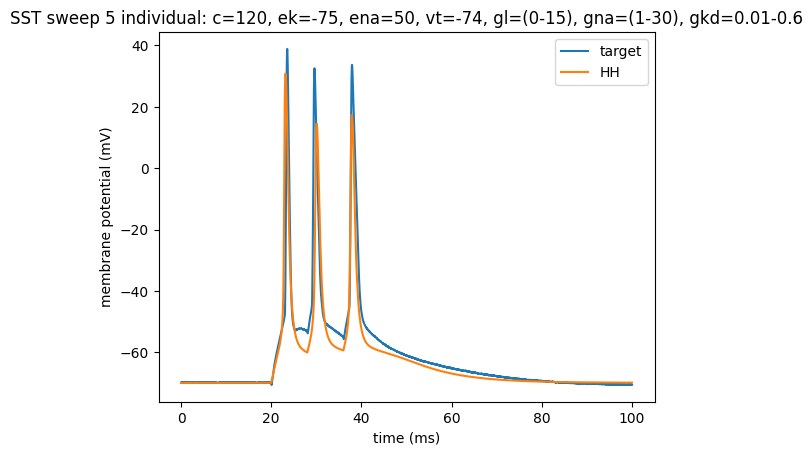

In [353]:
create_comparison_together(reshaped_sst_sweep5_out[0], sst_hh_s5_17_3[0]*1000, d2_title='HH')
title('SST sweep 5 individual: c=120, ek=-75, ena=50, vt=-74, gl=(0-15), gna=(1-30), gkd=0.01-0.6')

In [347]:
sst_hh_s5_17_4 = run_hh(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, cm_var=120, ek=-75, ena=50, vt=-70, \
                           glmin=0, glmax=15, gnamin=1, gnamax=30, gkdmin=0.01, gkdmax=0.6)


first fit:
Round 0: Best parameters g_kd=0.50076533 uS, g_na=4.35216431 uS, gl=4.97174678 nS (error: 313.87239477 mV^2)
Round 1: Best parameters g_kd=0.44461187 uS, g_na=4.33458929 uS, gl=9.9732584 nS (error: 140.83407128 mV^2)
Round 2: Best parameters g_kd=0.43577916 uS, g_na=4.28623898 uS, gl=8.9564664 nS (error: 135.56117924 mV^2)
Round 3: Best parameters g_kd=0.38374134 uS, g_na=3.28173855 uS, gl=9.88986835 nS (error: 121.27467579 mV^2)
Round 4: Best parameters g_kd=0.36235459 uS, g_na=3.16918218 uS, gl=9.9732584 nS (error: 111.9294561 mV^2)
Round 5: Best parameters g_kd=301.83366771 nS, g_na=2.58476314 uS, gl=12.71614857 nS (error: 88.4438457 mV^2)
Round 6: Best parameters g_kd=301.83366771 nS, g_na=2.58476314 uS, gl=12.71614857 nS (error: 88.4438457 mV^2)
Round 7: Best parameters g_kd=301.83366771 nS, g_na=2.58476314 uS, gl=12.71614857 nS (error: 88.4438457 mV^2)
Round 8: Best parameters g_kd=301.39530321 nS, g_na=2.58476314 uS, gl=12.71614857 nS (error: 88.26350154 mV^2)
Round 9

Text(0.5, 1.0, 'SST sweep 5 individual: c=120, ek=-75, ena=50, vt=-74, gl=(0-15), gna=(1-30), gkd=0.01-0.6')

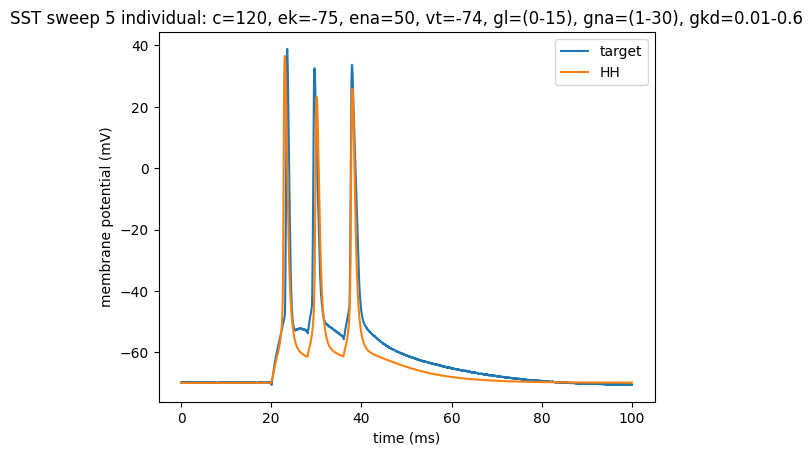

In [355]:
create_comparison_together(reshaped_sst_sweep5_out[0], sst_hh_s5_17_4[0]*1000, d2_title='HH')
title('SST sweep 5 individual: c=120, ek=-75, ena=50, vt=-74, gl=(0-15), gna=(1-30), gkd=0.01-0.6')

In [348]:
sst_hh_s5_17_5 = run_hh(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, cm_var=120, ek=-75, ena=50, vt=-70, \
                           glmin=0, glmax=15, gnamin=1, gnamax=30, gkdmin=0.01, gkdmax=0.6)


first fit:
Round 0: Best parameters g_kd=0.50039651 uS, g_na=5.75169529 uS, gl=13.0523676 nS (error: 160.42515602 mV^2)
Round 1: Best parameters g_kd=0.43570303 uS, g_na=4.51757362 uS, gl=14.0425914 nS (error: 152.12929908 mV^2)
Round 2: Best parameters g_kd=0.40580817 uS, g_na=4.78291699 uS, gl=13.85269627 nS (error: 130.57328159 mV^2)
Round 3: Best parameters g_kd=0.35071888 uS, g_na=3.17304122 uS, gl=12.93745927 nS (error: 115.03391758 mV^2)
Round 4: Best parameters g_kd=284.21072764 nS, g_na=2.43971849 uS, gl=13.93730854 nS (error: 81.03431491 mV^2)
Round 5: Best parameters g_kd=284.21072764 nS, g_na=2.43971849 uS, gl=13.93730854 nS (error: 81.03431491 mV^2)
Round 6: Best parameters g_kd=277.12914533 nS, g_na=2.25678103 uS, gl=13.82658107 nS (error: 76.70972634 mV^2)
Round 7: Best parameters g_kd=263.38856753 nS, g_na=1.91082504 uS, gl=13.97765023 nS (error: 70.44813962 mV^2)
Round 8: Best parameters g_kd=242.65460177 nS, g_na=1.78635826 uS, gl=14.05246633 nS (error: 57.05313263 mV

Text(0.5, 1.0, 'SST sweep 5 individual: c=120, ek=-75, ena=50, vt=-74, gl=(0-15), gna=(1-30), gkd=0.01-0.6')

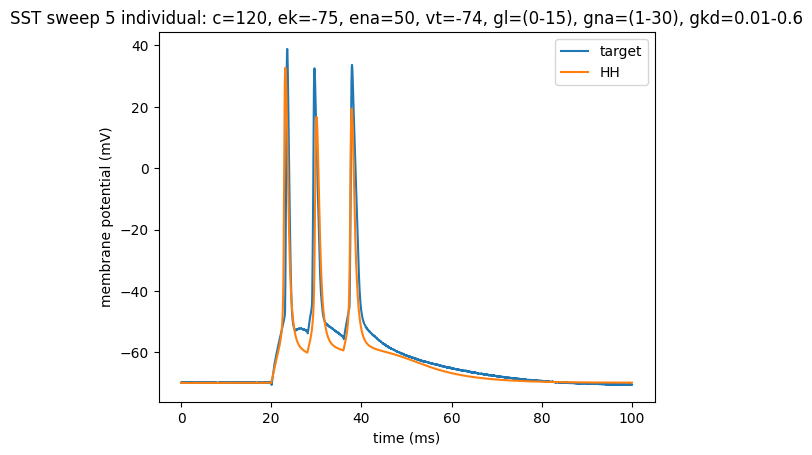

In [356]:
create_comparison_together(reshaped_sst_sweep5_out[0], sst_hh_s5_17_5[0]*1000, d2_title='HH')
title('SST sweep 5 individual: c=120, ek=-75, ena=50, vt=-74, gl=(0-15), gna=(1-30), gkd=0.01-0.6')

In [349]:
sst_hh_s5_17_6 = run_hh(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, cm_var=120, ek=-75, ena=50, vt=-70, \
                           glmin=0, glmax=15, gnamin=1, gnamax=30, gkdmin=0.01, gkdmax=0.6)


first fit:
Round 0: Best parameters g_kd=0.40752667 uS, g_na=5.54605961 uS, gl=5.06386058 nS (error: 948.58439664 mV^2)
Round 1: Best parameters g_kd=0.42658691 uS, g_na=4.23114208 uS, gl=10.45638577 nS (error: 135.04469131 mV^2)
Round 2: Best parameters g_kd=0.36210571 uS, g_na=3.74632215 uS, gl=12.75328985 nS (error: 115.81778887 mV^2)
Round 3: Best parameters g_kd=0.36210571 uS, g_na=3.74632215 uS, gl=12.75328985 nS (error: 115.81778887 mV^2)
Round 4: Best parameters g_kd=312.1155686 nS, g_na=2.41429803 uS, gl=13.43740756 nS (error: 102.15524201 mV^2)
Round 5: Best parameters g_kd=291.21101717 nS, g_na=2.59718226 uS, gl=14.22071481 nS (error: 85.37614743 mV^2)
Round 6: Best parameters g_kd=291.21101717 nS, g_na=2.59718226 uS, gl=14.22071481 nS (error: 85.37614743 mV^2)
Round 7: Best parameters g_kd=291.21101717 nS, g_na=2.59718226 uS, gl=14.22071481 nS (error: 85.37614743 mV^2)
Round 8: Best parameters g_kd=258.10025948 nS, g_na=1.90589508 uS, gl=14.19198054 nS (error: 66.8055537 mV

Text(0.5, 1.0, 'SST sweep 5 individual: c=120, ek=-75, ena=50, vt=-74, gl=(0-15), gna=(1-30), gkd=0.01-0.6')

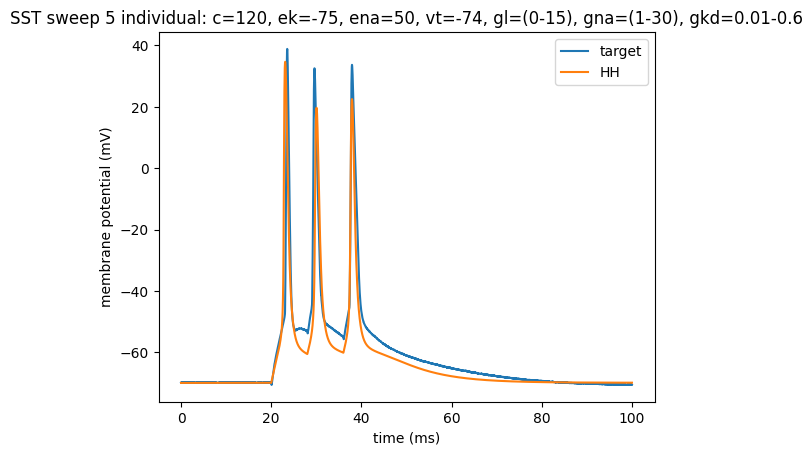

In [357]:
create_comparison_together(reshaped_sst_sweep5_out[0], sst_hh_s5_17_6[0]*1000, d2_title='HH')
title('SST sweep 5 individual: c=120, ek=-75, ena=50, vt=-74, gl=(0-15), gna=(1-30), gkd=0.01-0.6')

In [350]:
sst_hh_s5_17_7 = run_hh(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, cm_var=120, ek=-75, ena=50, vt=-70, \
                           glmin=0, glmax=15, gnamin=1, gnamax=30, gkdmin=0.01, gkdmax=0.6)


first fit:
Round 0: Best parameters g_kd=0.42471754 uS, g_na=4.00019688 uS, gl=8.99357416 nS (error: 132.43309534 mV^2)
Round 1: Best parameters g_kd=0.37045706 uS, g_na=3.05417886 uS, gl=10.57461216 nS (error: 119.15091521 mV^2)
Round 2: Best parameters g_kd=296.47033833 nS, g_na=2.42714525 uS, gl=12.19149821 nS (error: 84.58005743 mV^2)
Round 3: Best parameters g_kd=296.47033833 nS, g_na=2.42714525 uS, gl=12.19149821 nS (error: 84.58005743 mV^2)
Round 4: Best parameters g_kd=299.53224506 nS, g_na=2.00043472 uS, gl=9.91015562 nS (error: 80.03422033 mV^2)
Round 5: Best parameters g_kd=299.53224506 nS, g_na=1.95643256 uS, gl=9.91015562 nS (error: 80.01326569 mV^2)
Round 6: Best parameters g_kd=294.13523929 nS, g_na=2.05336445 uS, gl=10.7740614 nS (error: 79.34415729 mV^2)
Round 7: Best parameters g_kd=268.48796964 nS, g_na=1.91807278 uS, gl=12.56084274 nS (error: 68.59245862 mV^2)
Round 8: Best parameters g_kd=243.72052183 nS, g_na=1.52572369 uS, gl=13.04890545 nS (error: 55.38739346 mV

Text(0.5, 1.0, 'SST sweep 5 individual: c=120, ek=-75, ena=50, vt=-74, gl=(0-15), gna=(1-30), gkd=0.01-0.6')

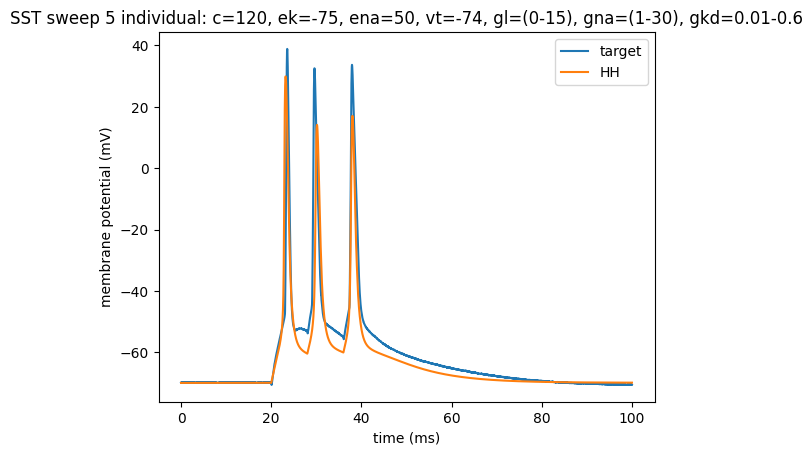

In [358]:
create_comparison_together(reshaped_sst_sweep5_out[0], sst_hh_s5_17_7[0]*1000, d2_title='HH')
title('SST sweep 5 individual: c=120, ek=-75, ena=50, vt=-74, gl=(0-15), gna=(1-30), gkd=0.01-0.6')

In [351]:
sst_hh_s5_17_8 = run_hh(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, cm_var=120, ek=-75, ena=50, vt=-70, \
                           glmin=0, glmax=15, gnamin=1, gnamax=30, gkdmin=0.01, gkdmax=0.6)


first fit:
Round 0: Best parameters g_kd=0.48402517 uS, g_na=5.732729 uS, gl=10.44466542 nS (error: 241.48110676 mV^2)
Round 1: Best parameters g_kd=0.44682378 uS, g_na=5.21871718 uS, gl=12.32840852 nS (error: 140.22557549 mV^2)
Round 2: Best parameters g_kd=0.35190059 uS, g_na=3.36808788 uS, gl=12.59820653 nS (error: 111.57617636 mV^2)
Round 3: Best parameters g_kd=0.35190059 uS, g_na=3.36808788 uS, gl=12.59820653 nS (error: 111.57617636 mV^2)
Round 4: Best parameters g_kd=0.32167327 uS, g_na=2.70948171 uS, gl=13.16619263 nS (error: 102.48080832 mV^2)
Round 5: Best parameters g_kd=0.32167327 uS, g_na=2.70948171 uS, gl=13.16619263 nS (error: 102.48080832 mV^2)
Round 6: Best parameters g_kd=277.07205515 nS, g_na=2.06322622 uS, gl=13.23210341 nS (error: 76.36515356 mV^2)
Round 7: Best parameters g_kd=277.07205515 nS, g_na=2.11610087 uS, gl=12.97650273 nS (error: 74.86781537 mV^2)
Round 8: Best parameters g_kd=269.81853191 nS, g_na=2.15736399 uS, gl=13.45246968 nS (error: 71.97202474 mV^2

Text(0.5, 1.0, 'SST sweep 5 individual: c=120, ek=-75, ena=50, vt=-74, gl=(0-15), gna=(1-30), gkd=0.01-0.6')

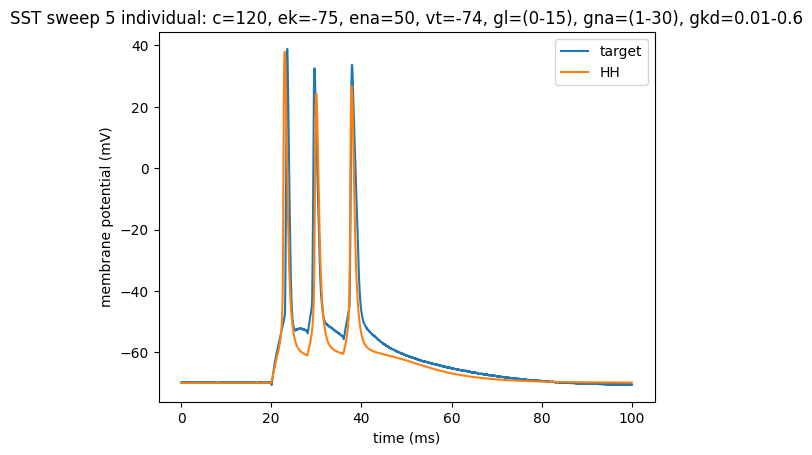

In [359]:
create_comparison_together(reshaped_sst_sweep5_out[0], sst_hh_s5_17_8[0]*1000, d2_title='HH')
title('SST sweep 5 individual: c=120, ek=-75, ena=50, vt=-74, gl=(0-15), gna=(1-30), gkd=0.01-0.6')

In [352]:
sst_hh_s5_17_9 = run_hh(reshaped_sst_sweep5_in, reshaped_sst_sweep5_out, cm_var=120, ek=-75, ena=50, vt=-70, \
                           glmin=0, glmax=15, gnamin=1, gnamax=30, gkdmin=0.01, gkdmax=0.6)


first fit:
Round 0: Best parameters g_kd=0.46955424 uS, g_na=5.3619543 uS, gl=6.51150799 nS (error: 601.2080236 mV^2)
Round 1: Best parameters g_kd=0.5130468 uS, g_na=5.50697415 uS, gl=8.84024705 nS (error: 154.38256338 mV^2)
Round 2: Best parameters g_kd=0.43127888 uS, g_na=4.80074449 uS, gl=11.49882729 nS (error: 135.95965295 mV^2)
Round 3: Best parameters g_kd=0.42670753 uS, g_na=3.544144 uS, gl=7.95827892 nS (error: 133.69175847 mV^2)
Round 4: Best parameters g_kd=0.40756587 uS, g_na=3.50280063 uS, gl=9.71000584 nS (error: 131.20715561 mV^2)
Round 5: Best parameters g_kd=0.33428024 uS, g_na=3.20722463 uS, gl=13.10678027 nS (error: 104.66066637 mV^2)
Round 6: Best parameters g_kd=0.33428024 uS, g_na=3.20722463 uS, gl=13.10678027 nS (error: 104.66066637 mV^2)
Round 7: Best parameters g_kd=315.5336003 nS, g_na=2.76420297 uS, gl=13.21729386 nS (error: 96.91680485 mV^2)
Round 8: Best parameters g_kd=301.42641658 nS, g_na=2.75372496 uS, gl=13.99090753 nS (error: 90.40625648 mV^2)
Round 9

Text(0.5, 1.0, 'SST sweep 5 individual: c=120, ek=-75, ena=50, vt=-74, gl=(0-15), gna=(1-30), gkd=0.01-0.6')

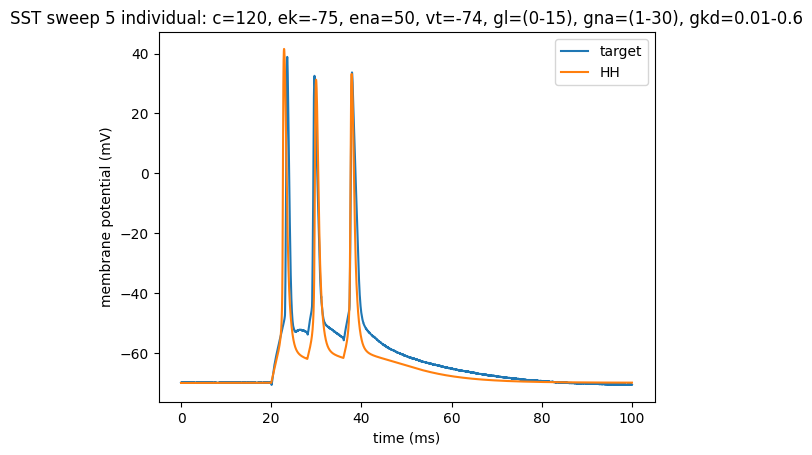

In [360]:
create_comparison_together(reshaped_sst_sweep5_out[0], sst_hh_s5_17_9[0]*1000, d2_title='HH')
title('SST sweep 5 individual: c=120, ek=-75, ena=50, vt=-74, gl=(0-15), gna=(1-30), gkd=0.01-0.6')

Text(0.5, 1.0, 'SST sweep 5 individual: c=120, ek=-75, ena=50, vt=-74, gl=(0-15), gna=(1-30), gkd=0.01-0.6')

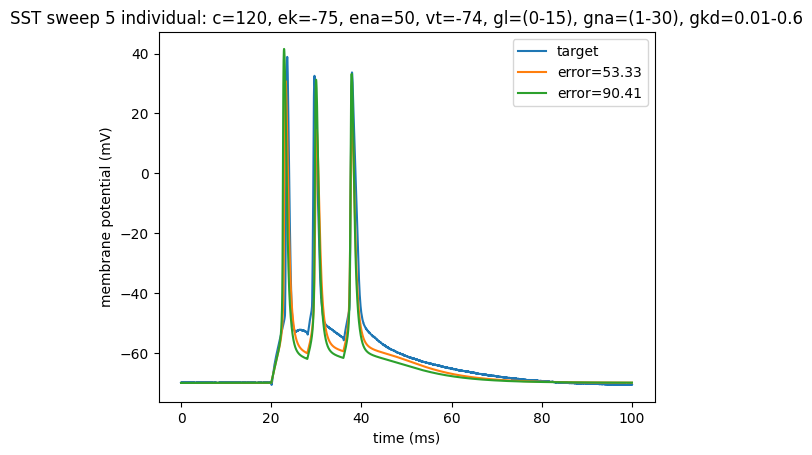

In [362]:
create_comparison_together_three(reshaped_sst_sweep5_out[0], sst_hh_s5_17_3[0]*1000, sst_hh_s5_17_9[0]*1000,\
                                 d2_title='error=53.33', d3_title='error=90.41')
title('SST sweep 5 individual: c=120, ek=-75, ena=50, vt=-74, gl=(0-15), gna=(1-30), gkd=0.01-0.6')

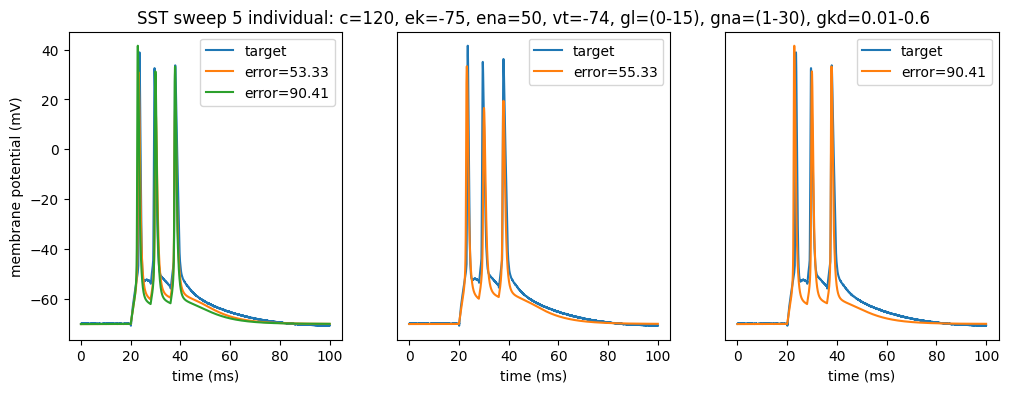

In [367]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together_three(reshaped_sst_sweep5_out[0], sst_hh_s5_17_3[0]*1000, sst_hh_s5_17_9[0]*1000,\
                                 d2_title='error=53.33', d3_title='error=90.41')


subplot(1,3,2)
create_comparison_together(reshaped_sst_sweep5_out[0], sst_hh_s5_17_3[0]*1000, d2_title='error=55.33')
title('SST sweep 5 individual: c=120, ek=-75, ena=50, vt=-74, gl=(0-15), gna=(1-30), gkd=0.01-0.6')
# xlim(0, 100)
ylabel('membrane potential (mV)')
ax = plt.gca()
ax.yaxis.set_visible(False)


subplot(1,3,3)
create_comparison_together(reshaped_sst_sweep5_out[0], sst_hh_s5_17_9[0]*1000, d2_title='error=90.41')

ax = plt.gca()
ax.yaxis.set_visible(False)

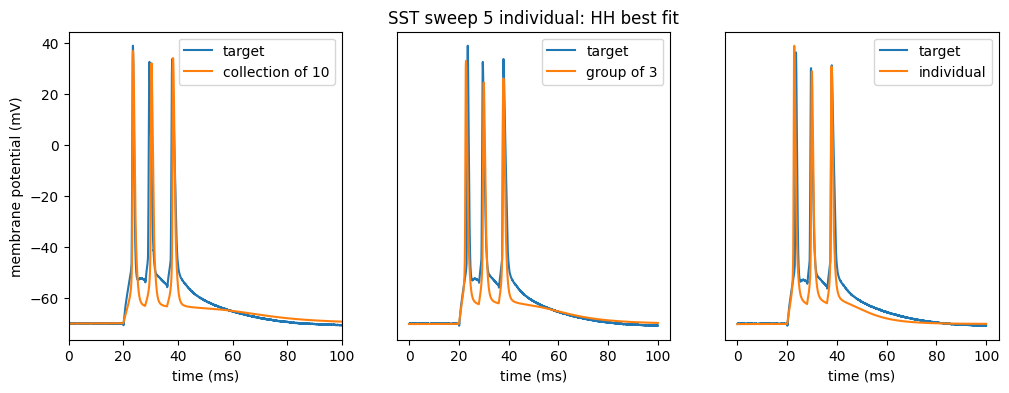

In [ ]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(sliced_output_res[5], hh_sst_starters_3[5]*1000,\
                                 d2_title='collection of 10')
xlim(0, 100)


subplot(1,3,2)
create_comparison_together(fastspikes_output_sliced[2], hh_sst_fast_5_9_30rounds_6[2]*1000, d2_title='group of 3')
title('SST: HH best fit comparison')
ylabel('membrane potential (mV)')
ax = plt.gca()
ax.yaxis.set_visible(False)


subplot(1,3,3)
create_comparison_together(reshaped_sst_sweep5_out[0], sst_hh_s5_17_9[0]*1000, d2_title='individual')

ax = plt.gca()
ax.yaxis.set_visible(False)

Text(0.5, 1.0, 'Individual sweep 5')

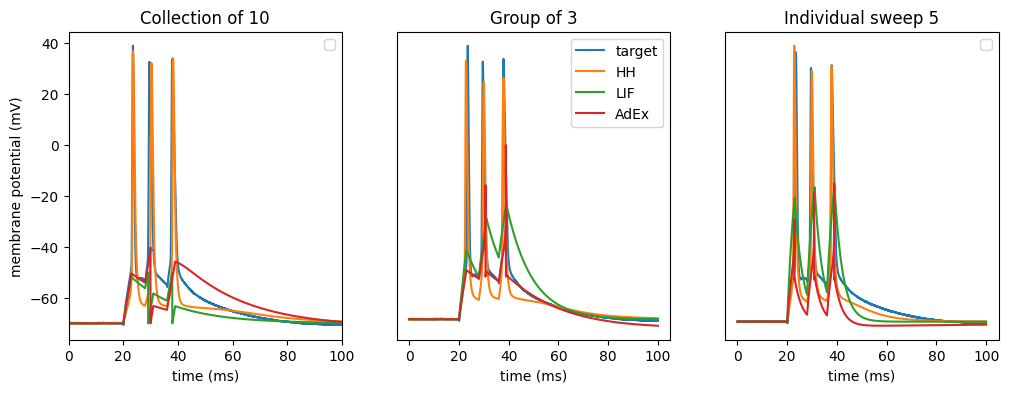

In [374]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together_four(sliced_output_res[5], hh_sst_starters_3[5]*1000, lif_sst_starters_0[5]*1000, adex_sst_starters_1[5]*1000, \
                                d1_title='', d2_title='', d3_title='', d4_title='')
xlim(0, 100)
ylabel('membrane potential (mV)')
title('Collection of 10')

subplot(1,3,2)
create_comparison_together_four(fastspikes_output_sliced[2], hh_sst_fast_5_9_30rounds_6[2]*1000, lif_sst_fast_5[2]*1000, \
                                adex_sst_fast_11[2]*1000,\
                                d2_title='HH', d3_title='LIF', d4_title='AdEx')
ax = plt.gca()
ax.yaxis.set_visible(False)
title('Group of 3')

subplot(1,3,3)
create_comparison_together_four(reshaped_sst_sweep5_out[0], sst_hh_s5_17_9[0]*1000, sst_lif_s5_4_1[0]*1000, sst_adex_s5_37[0]*1000,\
                            d1_title='', d2_title='', d3_title='', d4_title='')
ax = plt.gca()
ax.yaxis.set_visible(False)
title('Individual sweep 5')